# Bibliotecas

In [1364]:
## Pandas 
import pandas as pd
import numpy as np
import seaborn as sns # Alternativa pra gerar gráficos
from sklearn.cluster import KMeans ## Agrupamento pela média das variáveis
import matplotlib.pyplot as plot
from sklearn.preprocessing import OrdinalEncoder # codificar variaveis categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Padronizar dados
from dfply import *
import joblib ## Salvar modelo como pickle
from sklearn.impute import SimpleImputer # imputação simples
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold ### funcionalidadde para separar os dados em treino e teste
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from scipy.stats import skew,randint #randint: sorteio # Assimetria  -- Para os modelos o ideal é ter preditores com pouca assimetria, mas isso não é extremamente importante
from sklearn.feature_selection import VarianceThreshold # Variancia nula -- Verifica se alguma variável tem variancia nula - O ideal é que não tenha esse tipo de variável nas com as preditoras pois elas não representam a variabilidade dos dados
from math import sqrt
import random # semente

#%pip install imbalanced-learn
#superamostragem  e subamostragem
from imblearn.over_sampling import SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler

# modelo LASSO
from sklearn.linear_model  import LassoCV, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold

# modelo de XGBoost
#!pip install xgboost
import xgboost  as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.feature_selection import SequentialFeatureSelector

# modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # ver o resumo do modelo

# modelo de Floresta Aleatória (Ramdon Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# comparação de modelos
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve , auc, mean_squared_error, mean_absolute_error,recall_score,precision_score,classification_report
#%pip install numpy==2.2
#%pip install ipywidgets
import shap #  Análise com SHAP
from scipy.special import expit  # sigmoid

import joblib ## Salvar modelo como pickle

##Visualização data frame pandas sem truncamento
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# permite a vizualição de números flutuantes com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)

np.random.seed(2025)
random.seed(2025)

# Base de Treino

### Análise

In [1365]:
df_train=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Cluster/df_train.csv", sep=",", header=0, index_col=None)

In [1366]:
X_train=df_train.copy()

In [1367]:
X_train.head()

sexo  idade estado_civil nacionalidade  tempo_relacionamento_kredilig_meses  \
0    F     47       CASADO    BRASILEIRO                                33.23   
1    F     42       CASADO    BRASILEIRO                                80.93   
2    F     43       CASADO    BRASILEIRO                                81.83   
3    F     59   DIVORCIADO    BRASILEIRO                                68.37   
4    M     38       CASADO    BRASILEIRO                                20.80   

  canal_origem  media_meses_entre_contratos_combinado  \
0      Digital                                   2.95   
1       Fisico                                   0.00   
2       Fisico                                   0.00   
3       Fisico                                   0.00   
4       Fisico                                   0.93   

   qtd_contratos_fechado_regular  principal_total_fechado  qtd_parcelas_pagas  \
0                              7                  9668.22                  66   
1                              0                 53880.66                 100   
2                              0                     0.00                   7   
3                              0                     0.00                   6   
4                              0                     0.00                   2   

   meses_ultimo_pagamento  meses_entre_primeiro_e_ultimo_pagamento  \
0                    6.77                                    26.43   
1                   10.83                                    29.63   
2                    1.80                                     7.00   
3                   30.17                                     5.73   
4                   19.30                                     1.17   

   meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
0                                     33.20        8737.93   
1                                     40.47        5534.80   
2                                      8.80        2437.35   
3                                     35.90           0.00   
4                                     20.47         261.00   

   valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
0                   8737.93                        0.00           1617.00   
1                   2255.00                        0.00           1940.00   
2                   3487.99                        0.00           5000.00   
3                      0.00                        0.00           1730.00   
4                    480.00                       26.83           3000.00   

                   produtos  qtd_total_fechado_a_vista  \
0  EMPRESTIMO/FINANCIAMENTO                          0   
1                EMPRESTIMO                          0   
2             FINANCIAMENTO                          0   
3                EMPRESTIMO                          0   
4             FINANCIAMENTO                          0   

   mean_dias_maior_atraso  qtd_contratos  limite_total_primeiro_mes  \
0                    8.43              8                    6552.00   
1                   26.23             10                   14000.00   
2                    2.33              1                    9552.00   
3                   31.33              1                    5000.00   
4                    3.61              3                    1000.00   

   limite_total_ultimo_mes                    ocupacao grau_escolaridade_cat  \
0                  6552.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
1                 14000.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
2                 11675.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
3                  5000.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
4                  1000.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   

                 regiao   tipo_cal_entre_contratos possui_contratos_a_vista  \
0  Grande_Florianópolis  Contratos_dias_diferentes                      NAO   
1        Vale

In [1368]:
X_train.describe()

idade  tempo_relacionamento_kredilig_meses  \
count 234006.00                            234006.00   
mean      50.50                                50.30   
std       16.15                                31.53   
min       18.00                                 6.03   
25%       38.00                                22.73   
50%       51.00                                43.70   
75%       63.00                                73.83   
max      100.00                               125.53   

       media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
count                              234006.00                      234006.00   
mean                                    4.02                           2.09   
std                                     5.30                           3.39   
min                                     0.00                           0.00   
25%                                     0.00                           0.00   
50%                                     2.50                           1.00   
75%                                     5.97                           3.00   
max                                    41.47                         126.00   

       principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
count                234006.00           234006.00               234006.00   
mean                   4228.21               38.17                    9.13   
std                    7211.87               52.44                   10.85   
min                       0.00                0.00                   -0.70   
25%                     410.00                9.00                    0.83   
50%                    2153.90               20.00                    3.83   
75%                    5234.24               47.00                   15.13   
max                  310660.49             1410.00                   41.70   

       meses_entre_primeiro_e_ultimo_pagamento  \
count                                234006.00   
mean                                     18.82   
std                                      12.97   
min                                      -0.17   
25%                                       7.63   
50%                                      17.07   
75%                                      30.87   
max                                      42.20   

       meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
count                                 234006.00      234006.00   
mean                                      27.95        5622.29   
std                                       11.26        7566.24   
min                                       -0.63           0.00   
25%                                       18.83        1105.00   
50%                                       31.20        3169.31   
75%                                       38.23        7285.97   
max                                       41.60      310434.77   

       valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
count                 234006.00                   234006.00         234006.00   
mean                    5407.64                       35.84           2094.09   
std                     6615.41                      191.55            796.72   
min                        0.00                        0.00            508.20   
25%                     1449.00                        0.00           1617.00   
50%                     3383.99                        0.00           1888.00   
75%                     6989.87                        0.00           2194.08   
max                   287161.52                    12460.00          23447.00   

       qtd_total_fechado_a_vista  mean_dias_maior_atraso  qtd_contratos  \
count                  234006.00               234006.00      234006.00   
mean                        0.15                    7.82           4.70   
std                         1.46                   10.01           5.64   
min           

In [1369]:
# Porcentagem de valores faltantes
(X_train.isnull().sum()).sort_values(ascending=False)

sexo                                        0
idade                                       0
estado_civil                                0
nacionalidade                               0
tempo_relacionamento_kredilig_meses         0
canal_origem                                0
media_meses_entre_contratos_combinado       0
qtd_contratos_fechado_regular               0
principal_total_fechado                     0
qtd_parcelas_pagas                          0
meses_ultimo_pagamento                      0
meses_entre_primeiro_e_ultimo_pagamento     0
meses_entre_primeiro_e_ultimo_fechamento    0
valor_pago_nr                               0
valor_principal_total_nr                    0
FIN_valor_medio_entrada_nr                  0
renda_valida_new                            0
produtos                                    0
qtd_total_fechado_a_vista                   0
mean_dias_maior_atraso                      0
qtd_contratos                               0
limite_total_primeiro_mes         

In [1370]:
#Tipos
tipos = {
"sexo": "category",
"estado_civil": "category",
"grau_escolaridade_cat": "category",
"ocupacao": "category",
"nacionalidade": "category",
"canal_origem": "category",
"produtos": "category",
"Cluster": "category",
"tipo_cal_entre_contratos": "category",
"possui_contratos_a_vista": "category",
"tipo_valor_entrada": "category",
"mean_atraso_possui_info": "category",
"fx_renda_valida": "category",
"fx_ult_limite": "category",
"regiao": "category",}

# conversão
X_train = X_train.astype({k: v for k, v in tipos.items()})

In [1371]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234006 entries, 0 to 234005
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      234006 non-null  category
 1   idade                                     234006 non-null  int64   
 2   estado_civil                              234006 non-null  category
 3   nacionalidade                             234006 non-null  category
 4   tempo_relacionamento_kredilig_meses       234006 non-null  float64 
 5   canal_origem                              234006 non-null  category
 6   media_meses_entre_contratos_combinado     234006 non-null  float64 
 7   qtd_contratos_fechado_regular             234006 non-null  int64   
 8   principal_total_fechado                   234006 non-null  float64 
 9   qtd_parcelas_pagas                        234006 non-null  int64   
 10  meses_ul

In [1372]:
X_train_FIN=X_train[X_train["produtos"]=="FINANCIAMENTO"].copy()
X_train_EMP_FIN=X_train[~(X_train["produtos"]=="FINANCIAMENTO")].copy()

In [1373]:
X_train_FIN.head()

sexo  idade estado_civil nacionalidade  tempo_relacionamento_kredilig_meses  \
2    F     43       CASADO    BRASILEIRO                                81.83   
4    M     38       CASADO    BRASILEIRO                                20.80   
6    M     77       CASADO    BRASILEIRO                                57.60   
7    M     23     SOLTEIRO    BRASILEIRO                                43.33   
8    M     41     SOLTEIRO    BRASILEIRO                                 7.63   

  canal_origem  media_meses_entre_contratos_combinado  \
2       Fisico                                   0.00   
4       Fisico                                   0.93   
6       Fisico                                  16.20   
7       Fisico                                   0.00   
8       Fisico                                   4.00   

   qtd_contratos_fechado_regular  principal_total_fechado  qtd_parcelas_pagas  \
2                              0                     0.00                   7   
4                              0                     0.00                   2   
6                              3                  3036.08                  23   
7                              1                  1846.99                  14   
8                              0                     0.00                  10   

   meses_ultimo_pagamento  meses_entre_primeiro_e_ultimo_pagamento  \
2                    1.80                                     7.00   
4                   19.30                                     1.17   
6                    2.83                                    35.40   
7                   15.00                                    11.37   
8                   -0.27                                     7.80   

   meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
2                                      8.80        2437.35   
4                                     20.47         261.00   
6                                     38.23        3137.45   
7                                     26.37        2630.90   
8                                      7.53        2148.00   

   valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
2                   3487.99                        0.00           5000.00   
4                    480.00                       26.83           3000.00   
6                   3036.08                        0.00           2378.20   
7                   1846.99                        0.00           1888.00   
8                   5982.40                        0.00           2314.00   

        produtos  qtd_total_fechado_a_vista  mean_dias_maior_atraso  \
2  FINANCIAMENTO                          0                    2.33   
4  FINANCIAMENTO                          0                    3.61   
6  FINANCIAMENTO                          0                    0.59   
7  FINANCIAMENTO                          0                    0.00   
8  FINANCIAMENTO                          0                    0.00   

   qtd_contratos  limite_total_primeiro_mes  limite_total_ultimo_mes  \
2              1                    9552.00                 11675.00   
4              3                    1000.00                  1000.00   
6              3                   10500.00                  9660.00   
7              1                    3000.00                  5520.00   
8              2                    3000.00                  6750.00   

                     ocupacao grau_escolaridade_cat                regiao  \
2  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO       Sul_Catarinense   
4  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO        Vale_do_Itajaí   
6                  APOSENTADO          ENSINO_MEDIO       Sul_Catarinense   
7  EMPREGADO_PRIVADO_AUTONOMO       ATE_FUNDAMENTAL        Vale_do_Itajaí   
8  EMPREGADO_PRIVADO_AUTONOMO       ATE_FUNDAMENTAL  Grande_Florianópolis   

    tipo_cal_entre_contratos possui_contratos_a_vista tipo_valor_entrada  \
2          Apenas_1_contrato 

In [1374]:
X_train_EMP_FIN.head()

sexo  idade estado_civil nacionalidade  tempo_relacionamento_kredilig_meses  \
0    F     47       CASADO    BRASILEIRO                                33.23   
1    F     42       CASADO    BRASILEIRO                                80.93   
3    F     59   DIVORCIADO    BRASILEIRO                                68.37   
5    F     56       CASADO    BRASILEIRO                                44.30   
9    F     35       CASADO    BRASILEIRO                               101.10   

  canal_origem  media_meses_entre_contratos_combinado  \
0      Digital                                   2.95   
1       Fisico                                   0.00   
3       Fisico                                   0.00   
5       Fisico                                   9.07   
9       Fisico                                   0.00   

   qtd_contratos_fechado_regular  principal_total_fechado  qtd_parcelas_pagas  \
0                              7                  9668.22                  66   
1                              0                 53880.66                 100   
3                              0                     0.00                   6   
5                              0                  3412.94                  56   
9                              1                  1160.05                  13   

   meses_ultimo_pagamento  meses_entre_primeiro_e_ultimo_pagamento  \
0                    6.77                                    26.43   
1                   10.83                                    29.63   
3                   30.17                                     5.73   
5                   12.33                                    22.23   
9                    1.47                                    12.97   

   meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
0                                     33.20        8737.93   
1                                     40.47        5534.80   
3                                     35.90           0.00   
5                                     34.57        5084.84   
9                                     14.43        1260.00   

   valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
0                   8737.93                        0.00           1617.00   
1                   2255.00                        0.00           1940.00   
3                      0.00                        0.00           1730.00   
5                   3412.94                        0.00           1828.23   
9                   1050.00                        0.00           1730.00   

                   produtos  qtd_total_fechado_a_vista  \
0  EMPRESTIMO/FINANCIAMENTO                          0   
1                EMPRESTIMO                          0   
3                EMPRESTIMO                          0   
5  EMPRESTIMO/FINANCIAMENTO                          0   
9  EMPRESTIMO/FINANCIAMENTO                          0   

   mean_dias_maior_atraso  qtd_contratos  limite_total_primeiro_mes  \
0                    8.43              8                    6552.00   
1                   26.23             10                   14000.00   
3                   31.33              1                    5000.00   
5                   27.12              4                    6048.00   
9                   29.17              2                    2000.00   

   limite_total_ultimo_mes                    ocupacao grau_escolaridade_cat  \
0                  6552.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
1                 14000.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
3                  5000.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
5                  6048.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   
9                  2200.00  EMPREGADO_PRIVADO_AUTONOMO          ENSINO_MEDIO   

                 regiao   tipo_cal_entre_contratos possui_contratos_a_vista  \
0  Grande_Florianópolis  Contratos_dias_diferentes                      NAO   
1        Vale

### FINANCIAMENTO

In [1375]:
# Frequência da variável target
X_train_FIN.inad_e_reneg.value_counts()

inad_e_reneg
0    95676
1    18943
Name: count, dtype: int64

In [1376]:
# Amostragem
#Variável de interesse
y_train_FIN = X_train_FIN >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_train_FIN.drop(['inad_e_reneg'],axis=1, inplace=True)

In [1377]:
# Frequência da variável target no treino
print(y_train_FIN.value_counts()) #qtd treino

inad_e_reneg
0               95676
1               18943
Name: count, dtype: int64


In [1378]:
ids_train_FIN = X_train_FIN["cpf_cnpj"]  
X_train_FIN = X_train_FIN.drop(columns=["cpf_cnpj"])
#ids_test = X_test["cpf_cnpj"]  
#X_test = X_test.drop(columns=["cpf_cnpj"])

### EMPRESTIMO/FINANCIAMENTO

In [1379]:
# Frequência da variável target
X_train_EMP_FIN.inad_e_reneg.value_counts()

inad_e_reneg
0    68861
1    50526
Name: count, dtype: int64

In [1380]:
# Amostragem
#Variável de interesse
y_train_EMP_FIN = X_train_EMP_FIN >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_train_EMP_FIN.drop(['inad_e_reneg'],axis=1, inplace=True)

In [1381]:
ids_train_EMP_FIN = X_train_EMP_FIN["cpf_cnpj"]  
X_train_EMP_FIN = X_train_EMP_FIN.drop(columns=["cpf_cnpj"])
#ids_test = X_test["cpf_cnpj"]  
#X_test = X_test.drop(columns=["cpf_cnpj"])

### Base de treino - Pré processamento FINANCIAMENTO

In [1382]:
# One hot encoding
X_train_FIN_dummy=pd.get_dummies(X_train_FIN, drop_first=True).astype(int)

In [1383]:
X_train_FIN_dummy.head(10)

idade  tempo_relacionamento_kredilig_meses  \
2      43                                   81   
4      38                                   20   
6      77                                   57   
7      23                                   43   
8      41                                    7   
10     83                                   24   
11     43                                   76   
13     71                                   28   
14     48                                   65   
20     21                                   29   

    media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
2                                       0                              0   
4                                       0                              0   
6                                      16                              3   
7                                       0                              1   
8                                       4                              0   
10                                      0                              2   
11                                     13                              2   
13                                     12                              2   
14                                      0                              0   
20                                      0                              0   

    principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
2                         0                   7                       1   
4                         0                   2                      19   
6                      3036                  23                       2   
7                      1846                  14                      15   
8                         0                  10                       0   
10                     3228                  29                      24   
11                     7462                  37                       0   
13                     5454                  25                       1   
14                        0                   0                      18   
20                        0                   0                      29   

    meses_entre_primeiro_e_ultimo_pagamento  \
2                                         7   
4                                         1   
6                                        35   
7                                        11   
8                                         7   
10                                        0   
11                                       35   
13                                       27   
14                                        0   
20                                        0   

    meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
2                                          8           2437   
4                                         20            261   
6                                         38           3137   
7                                         26           2630   
8                                          7           2148   
10                                        24           4100   
11                                        34           9723   
13                                        28           7066   
14                                        18              0   
20                                        29              0   

    valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
2                       3487                           0              5000   
4                        480                          26              3000   
6                       3036                           0              2378   
7                       1846                           0              1888   
8                       5982                           0              2314   
10                      3228                           0              1865   
11                     10692    

In [1384]:
X_train_FIN_dummy.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',

##### Correlação com a variável target

In [1385]:
# Seleção de variáveis
X_train_FIN_d_select=X_train_FIN_dummy[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_cal_entre_contratos_Contratos_dias_diferentes',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'mean_atraso_possui_info_SIM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil',
 'fx_ult_limite_R$7,5 mil a R$10mil',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']]

In [1386]:
X_train_FIN_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação
                               "FIN_valor_medio_entrada_nr", # alta correlação
                               "principal_total_fechado", # alta correlação e pouca importancia
                               "mean_atraso_possui_info_SIM", # VIF alto e alta assimetria
                               "qtd_parcelas_pagas", # alta correlação
                               'valor_principal_total_nr',# alta correlação
                               "tipo_cal_entre_contratos_Contratos_dias_diferentes", # alta correlação e assimetria
                               "meses_entre_primeiro_e_ultimo_fechamento", # VIF alto
                               "limite_total_primeiro_mes",# alta correlação
                               "tempo_relacionamento_kredilig_meses", #VIF alta e menos importancia que a variável meses_entre_primeiro_e_ultimo_pagamento
                               'qtd_contratos_fechado_regular', #Vazamento de informação IV > 0.50
                               'Cluster_1',
                               'Cluster_2',
                               'Cluster_3',
                               'Cluster_4',
                               'possui_contratos_a_vista_N_base_CARTAO',
                               #'renda_valida_new', # categorização da renda
                               'limite_total_ultimo_mes', # categorização da renda
                               "nacionalidade_ESTRANGEIRO",# assimetria alta
                               'tipo_cal_entre_contratos_Contratos_dias_diferentes',
                               'tipo_cal_entre_contratos_Contratos_mesmo_dia',
                               #'canal_origem_Fisico',# Alto VIF
                               "renda_valida_new",
                               ], inplace=True, errors='ignore')

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_21368\7359321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_FIN_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação


In [1387]:
# Correlação
# Pearson
df_corr = X_train_FIN_d_select.copy()
df_corr['target'] = y_train_FIN

correlacoes = df_corr.corr(numeric_only=True)['target'].drop('target').sort_values(key=abs, ascending=False)
print("Correlação com inad_reneg")
print(correlacoes)

Correlação com inad_reneg
meses_ultimo_pagamento                     0.32
fx_ult_limite_Até R$1 mil                  0.32
meses_entre_primeiro_e_ultimo_pagamento   -0.31
mean_dias_maior_atraso                     0.28
idade                                     -0.26
valor_pago_nr                             -0.24
fx_ult_limite_R$1 mil a R$2,5 mil          0.23
media_meses_entre_contratos_combinado     -0.17
fx_ult_limite_R$10 mil a R$15mil          -0.16
fx_ult_limite_R$7,5 mil a R$10mil         -0.16
canal_origem_Fisico                       -0.15
estado_civil_SOLTEIRO                      0.14
ocupacao_EMPREGADO_PRIVADO_AUTONOMO        0.14
fx_ult_limite_R$5 mil a R$7,5 mil         -0.09
sexo_M                                     0.08
qtd_contratos                             -0.08
fx_ult_limite_R$15 mil a R$20mil          -0.06
fx_ult_limite_R$2,5 mil a R$5 mil          0.05
ocupacao_OUTROS                            0.05
estado_civil_VIUVO                        -0.05
tipo_valor_ent

In [1388]:
# VIF

'''X_train_FIN_d_select=X_train_FIN_d_select[['idade', #
                          'media_meses_entre_contratos_combinado',#
                          'mean_dias_maior_atraso', #
                          'meses_ultimo_pagamento', #
                          #'meses_entre_primeiro_e_ultimo_pagamento',
                          'qtd_contratos',#
                          'valor_pago_nr',#
                          'sexo_M',#
                          'canal_origem_Fisico',#
                          'possui_contratos_a_vista_SIM',#
                          'fx_renda_valida_Até 1 SM',#
                          'fx_renda_valida_De 1 SM a 1,25 SM',
                          'fx_renda_valida_De 1,25 SM a 1,5 SM',#
                          'fx_renda_valida_De 1,5 SM a 2 SM',#
                          'fx_renda_valida_De 2 SM a 3 SM',#
                          'regiao_Norte_Catarinense',#
                          'regiao_Sul_Catarinense',#
                          'regiao_Grande_Florianópolis',#
                          #'regiao_Vale_do_Itajaí',
                          # 'regiao_Oeste_Catarinense',
                          # 'regiao_Serrana',
                           'fx_ult_limite_Até R$1 mil',#
                           'fx_ult_limite_R$1 mil a R$2,5 mil',#
                           'fx_ult_limite_R$10 mil a R$15mil',#
                           'fx_ult_limite_R$15 mil a R$20mil',#
                           'fx_ult_limite_R$2,5 mil a R$5 mil',#
                           'fx_ult_limite_R$5 mil a R$7,5 mil',#
                           #'fx_ult_limite_R$7,5 mil a R$10mil'
                           "tipo_valor_entrada_Paga_entrada",#
                           #'estado_civil_DIVORCIADO',
                            'estado_civil_SOLTEIRO',#
                            'estado_civil_UNIAO ESTAVEL',#
                            #'estado_civil_VIUVO',
                            'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',#
                            #'ocupacao_OUTROS',
                            #'ocupacao_RENDA_PASSIVA_PENSAO',
                            #'ocupacao_SERVIDOR_PUBLICO',
                            'grau_escolaridade_cat_ENSINO_MEDIO',#
                            'grau_escolaridade_cat_TECNICO_SUPERIOR',#
                          ]]'''

pd.set_option('display.max_rows', None)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_FIN_d_select.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_FIN_d_select.values, i)
                          for i in range(len(X_train_FIN_d_select.columns))]
print(vif_data.sort_values(by=['VIF'], ascending=False))

                                    Feature   VIF
19              regiao_Grande_Florianópolis 37.17
12                      canal_origem_Fisico 30.03
24                    regiao_Vale_do_Itajaí 28.28
20                 regiao_Norte_Catarinense 27.12
23                   regiao_Sul_Catarinense 23.80
0                                     idade 22.58
28        fx_renda_valida_De 1 SM a 1,25 SM 20.48
37        fx_ult_limite_R$5 mil a R$7,5 mil 13.88
36        fx_ult_limite_R$2,5 mil a R$5 mil 13.11
29      fx_renda_valida_De 1,25 SM a 1,5 SM 12.63
38        fx_ult_limite_R$7,5 mil a R$10mil 11.15
34         fx_ult_limite_R$10 mil a R$15mil 10.08
33        fx_ult_limite_R$1 mil a R$2,5 mil  9.57
3   meses_entre_primeiro_e_ultimo_pagamento  9.18
30         fx_renda_valida_De 1,5 SM a 2 SM  6.84
17       grau_escolaridade_cat_ENSINO_MEDIO  6.47
13      ocupacao_EMPREGADO_PRIVADO_AUTONOMO  6.30
27                 fx_renda_valida_Até 1 SM  5.45
22                           regiao_Serrana  5.35


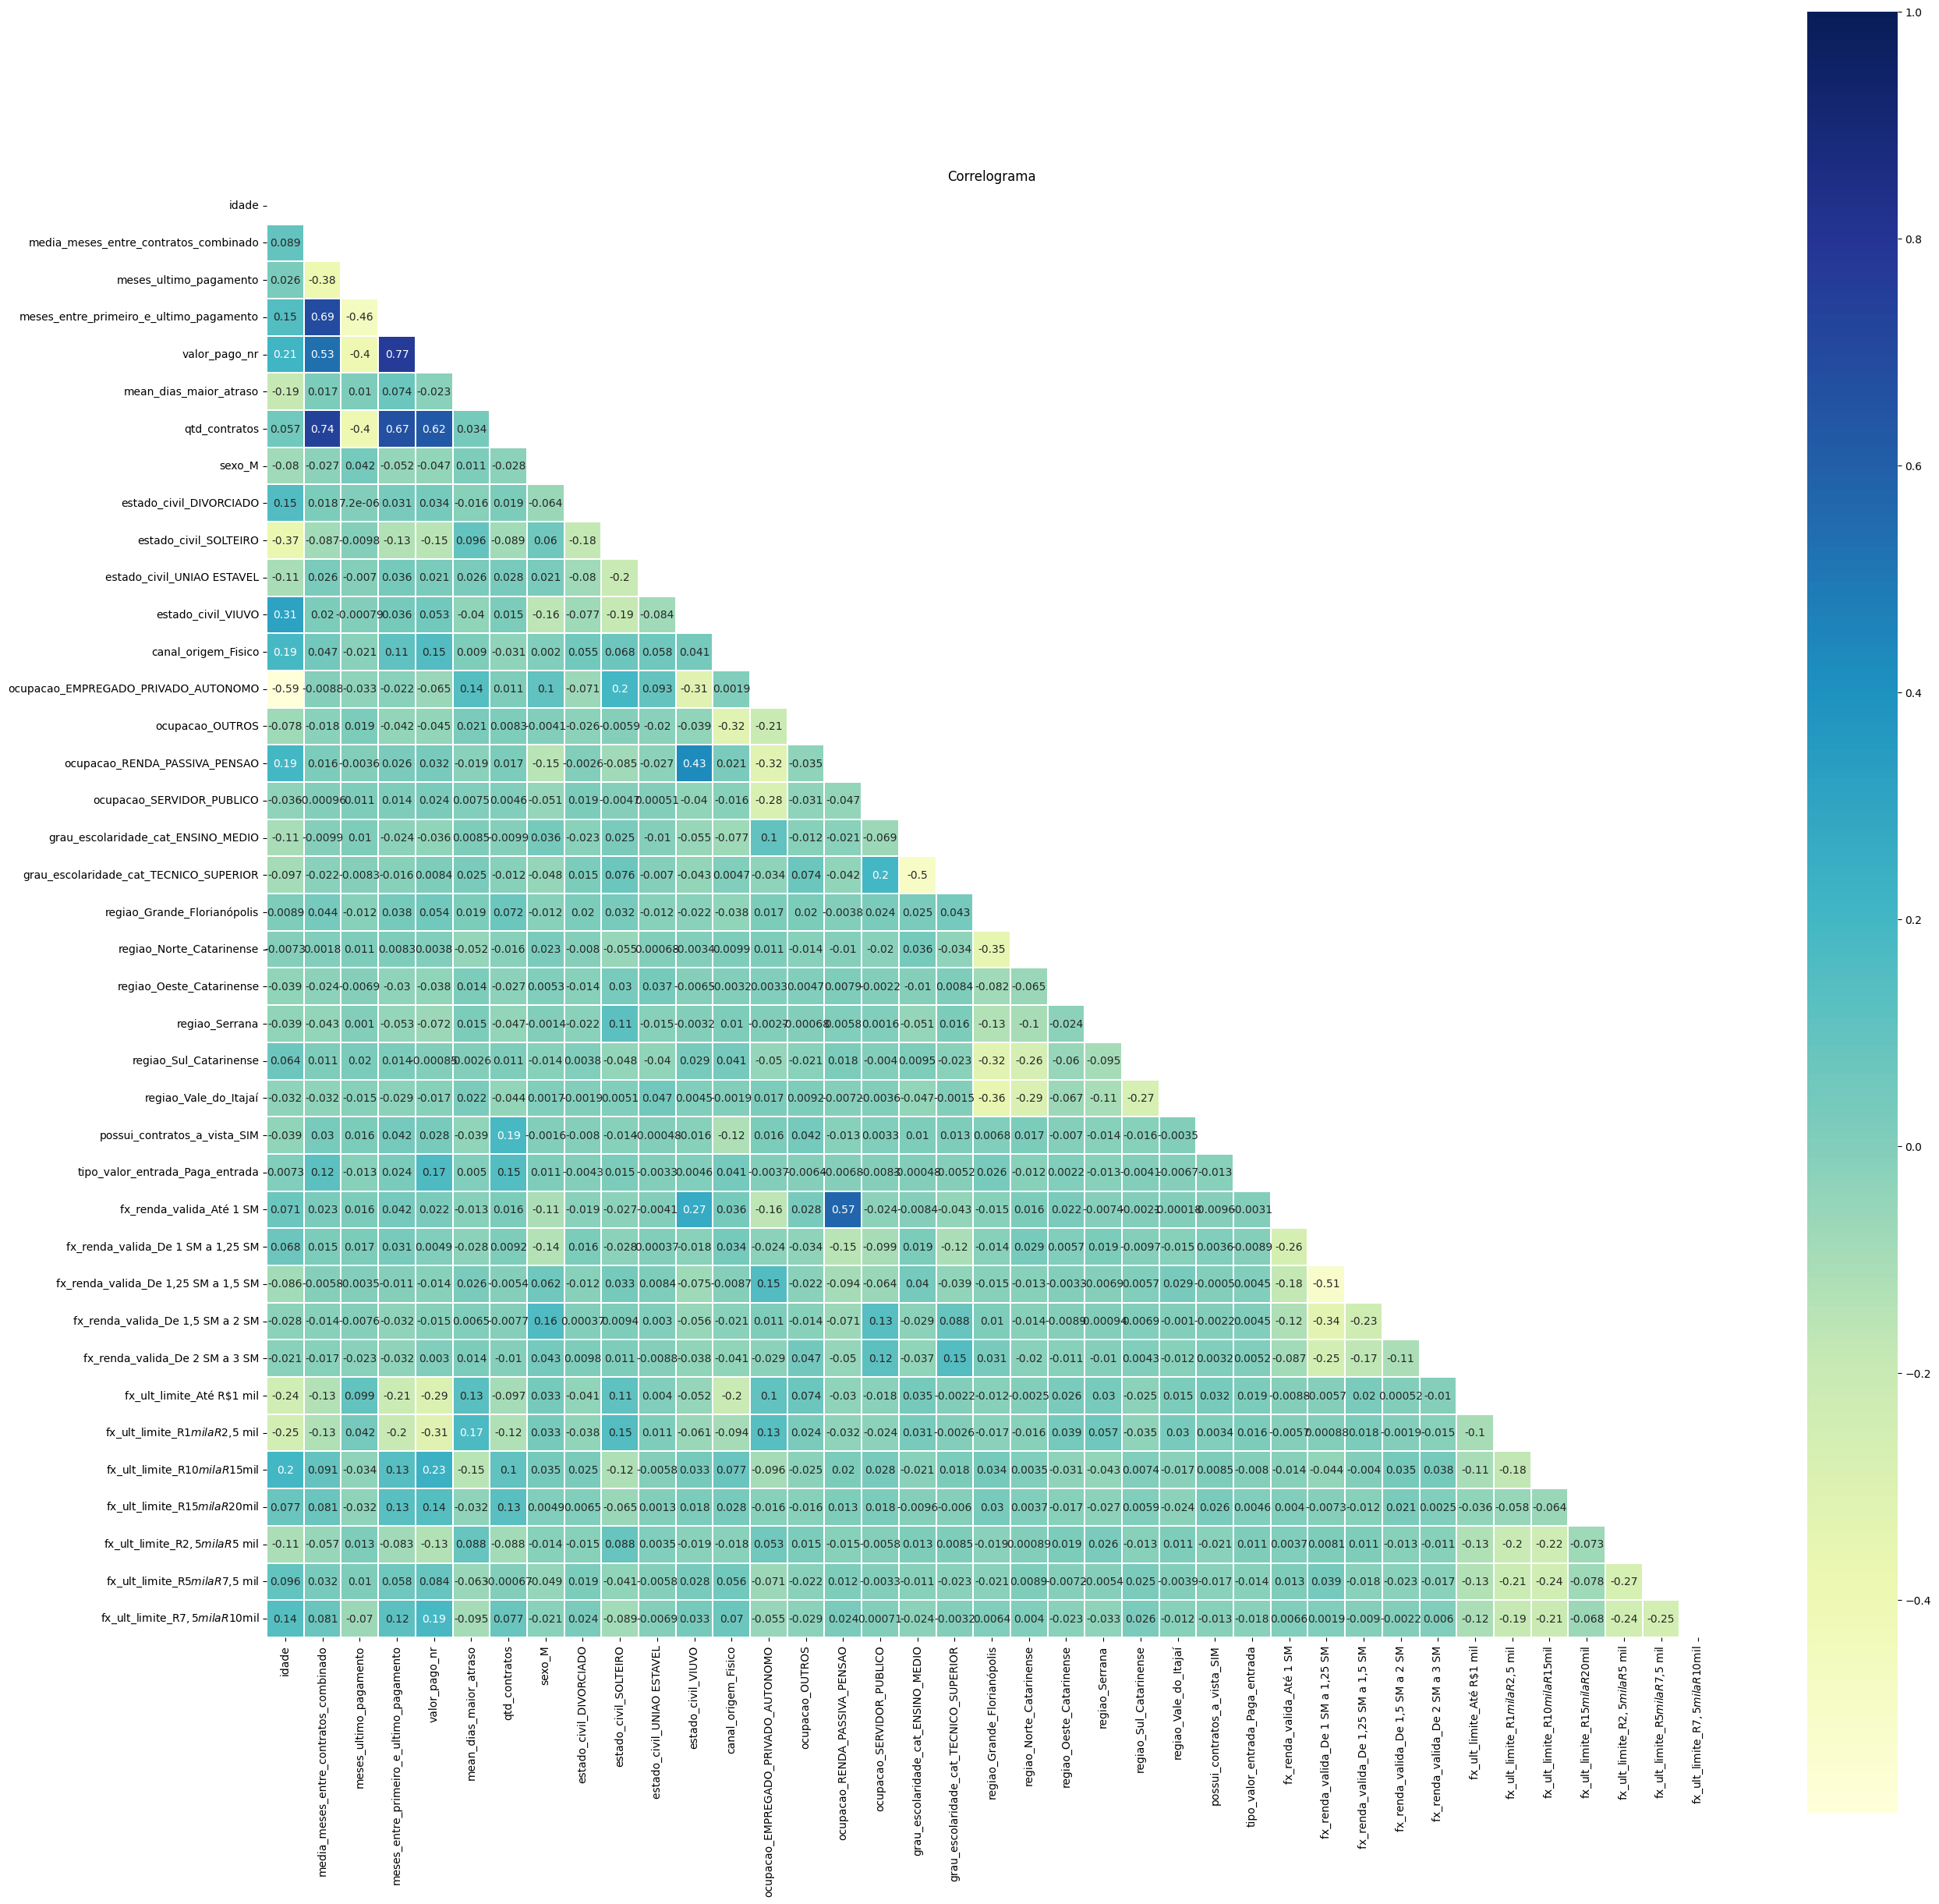

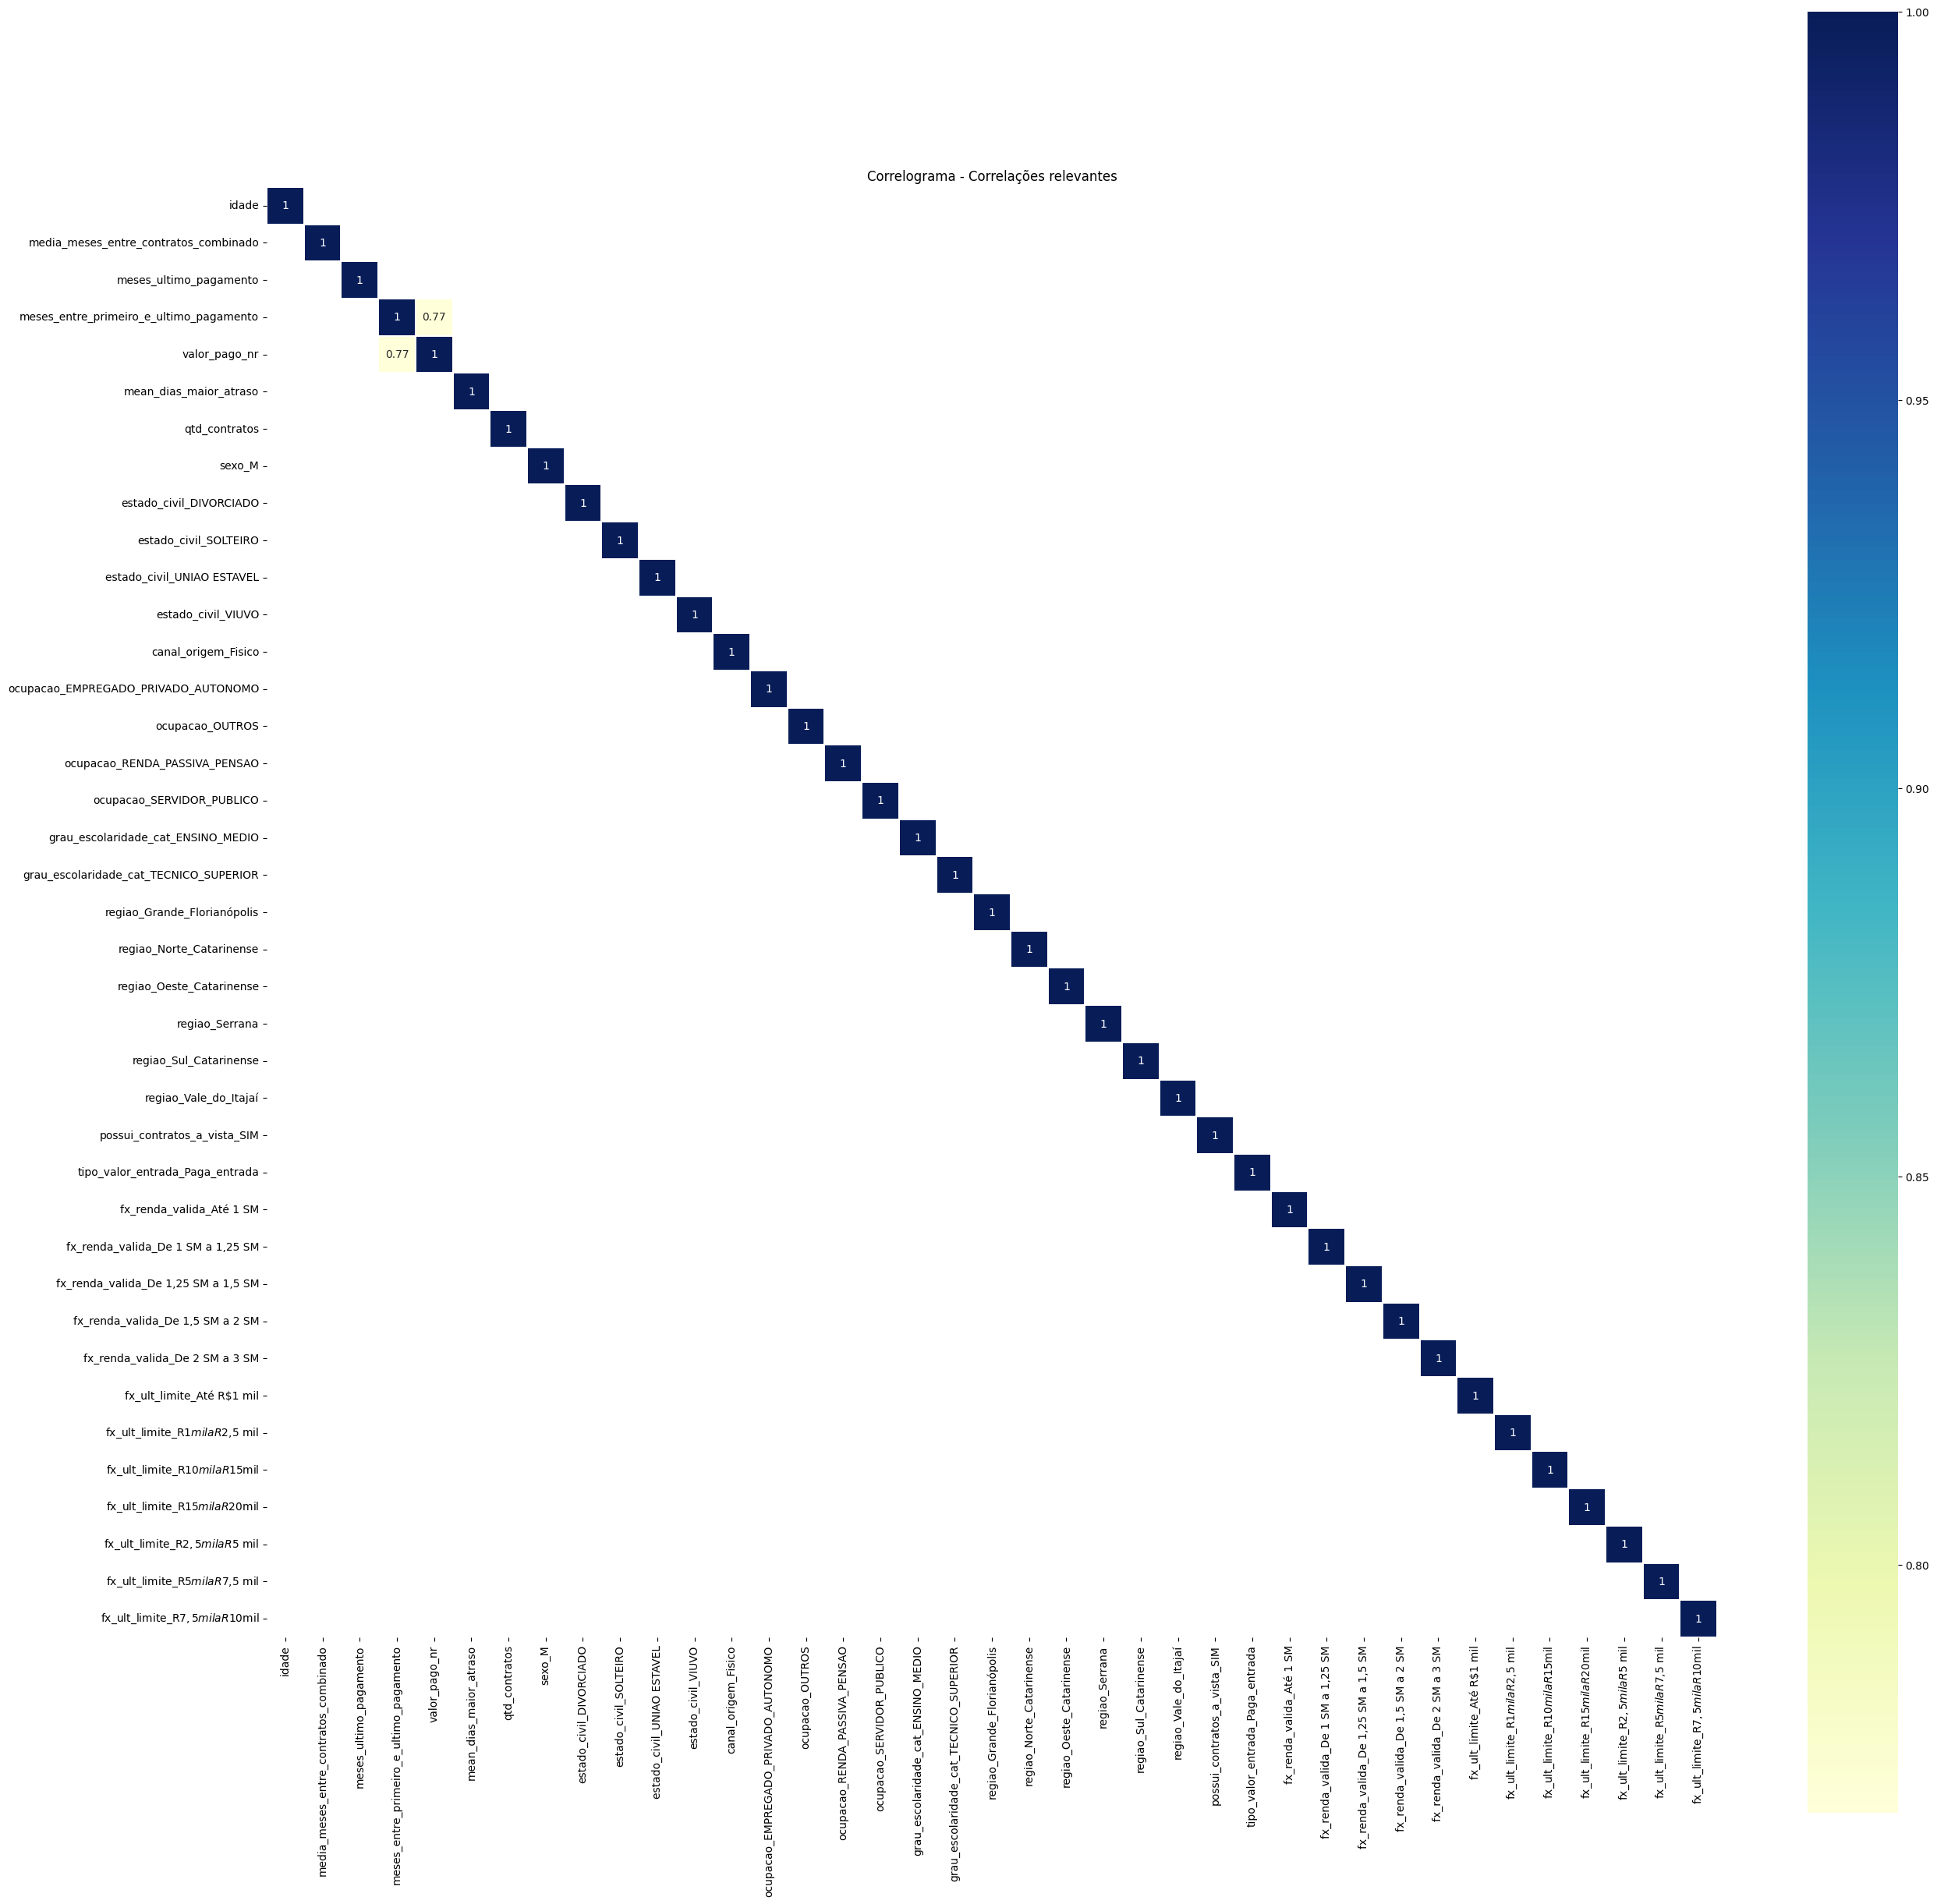

In [1389]:
# Correlação
corr=X_train_FIN_d_select.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
w=h=30
plot.figure(figsize=(h,w))
sns.heatmap(corr,mask=mask,vmax=1.0,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show

# Correlações relevantes
mask = np.abs(corr) >= 0.75
filtro_corr = corr.where(mask)

plot.figure(figsize=(h,w))
sns.heatmap(filtro_corr, vmax=1.0, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plot.title('Correlograma - Correlações relevantes')
plot.show()

In [1390]:
# Assimetria
skewed_feats=X_train_FIN_d_select.apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False))

regiao_Oeste_Catarinense                   7.98
fx_ult_limite_R$15 mil a R$20mil           6.75
ocupacao_OUTROS                            6.47
qtd_contratos                              5.63
valor_pago_nr                              5.48
possui_contratos_a_vista_SIM               5.44
regiao_Serrana                             4.95
ocupacao_SERVIDOR_PUBLICO                  4.69
ocupacao_RENDA_PASSIVA_PENSAO              4.11
fx_ult_limite_Até R$1 mil                  3.77
grau_escolaridade_cat_TECNICO_SUPERIOR     3.65
estado_civil_DIVORCIADO                    3.41
estado_civil_VIUVO                         3.25
fx_renda_valida_De 2 SM a 3 SM             3.23
estado_civil_UNIAO ESTAVEL                 3.08
fx_renda_valida_Até 1 SM                   2.97
fx_renda_valida_De 1,5 SM a 2 SM           2.18
media_meses_entre_contratos_combinado      2.12
fx_ult_limite_R$1 mil a R$2,5 mil          2.10
mean_dias_maior_atraso                     1.92
fx_ult_limite_R$10 mil a R$15mil        

In [1391]:
# Variancia Nula
constant_features=[feat for feat in X_train_FIN_d_select.columns if X_train_FIN_d_select[feat].std()==0]
constant_features

[]

In [1392]:
X_train_FIN_d_select.head(5)

idade  media_meses_entre_contratos_combinado  meses_ultimo_pagamento  \
2     43                                      0                       1   
4     38                                      0                      19   
6     77                                     16                       2   
7     23                                      0                      15   
8     41                                      4                       0   

   meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
2                                        7           2437   
4                                        1            261   
6                                       35           3137   
7                                       11           2630   
8                                        7           2148   

   mean_dias_maior_atraso  qtd_contratos  sexo_M  estado_civil_DIVORCIADO  \
2                       2              1       0                        0   
4                       3              3       1                        0   
6                       0              3       1                        0   
7                       0              1       1                        0   
8                       0              2       1                        0   

   estado_civil_SOLTEIRO  estado_civil_UNIAO ESTAVEL  estado_civil_VIUVO  \
2                      0                           0                   0   
4                      0                           0                   0   
6                      0                           0                   0   
7                      1                           0                   0   
8                      1                           0                   0   

   canal_origem_Fisico  ocupacao_EMPREGADO_PRIVADO_AUTONOMO  ocupacao_OUTROS  \
2                    1                                    1                0   
4                    1                                    1                0   
6                    1                                    0                0   
7                    1                                    1                0   
8                    1                                    1                0   

   ocupacao_RENDA_PASSIVA_PENSAO  ocupacao_SERVIDOR_PUBLICO  \
2                              0                          0   
4                              0                          0   
6                              0                          0   
7                              0                          0   
8                              0                          0   

   grau_escolaridade_cat_ENSINO_MEDIO  grau_escolaridade_cat_TECNICO_SUPERIOR  \
2                                   1                                       0   
4                                   1                                       0   
6                                   1                                       0   
7                                   0                                       0   
8                                   0                                       0   

   regiao_Grande_Florianópolis  regiao_Norte_Catarinense  \
2                            0                         0   
4                            0                         0   
6                            0                         0   
7                            0                         0   
8                            1                         0   

   regiao_Oeste_Catarinense  regiao_Serrana  regiao_Sul_Catarinense  \
2                         0               0                       1   
4                         0               0                       0   
6                         0               0                       1   
7                         0               0                       0   
8                         0               0                       0   

   regiao_Vale_do_Itajaí  possui_contratos_a_vista_SIM  \
2                      0                             0   
4             

In [1393]:
# Normalização
# Padronização dos dados de treino

num_cols = ['idade',
 #'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 #'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
# 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 #"limite_total_ultimo_mes"
 ]

# Inicializa o scaler
scaler_FIN = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_FIN_d_select[num_cols] = pd.DataFrame(
    scaler_FIN.fit_transform(X_train_FIN_d_select[num_cols]),
    columns=num_cols,
    index=X_train_FIN_d_select.index
)
## Valores da padronização são obtidos em relação ao dados de treino

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_21368\2953639030.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_FIN_d_select[num_cols] = pd.DataFrame(


In [1394]:
X_train_FIN_d_select.head(5)

idade  media_meses_entre_contratos_combinado  meses_ultimo_pagamento  \
2  -0.48                                  -0.67                   -0.75   
4  -0.78                                  -0.67                    0.97   
6   1.54                                   2.13                   -0.66   
7  -1.67                                  -0.67                    0.59   
8  -0.60                                   0.03                   -0.85   

   meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
2                                    -0.65          -0.30   
4                                    -1.19          -0.80   
6                                     1.87          -0.14   
7                                    -0.29          -0.26   
8                                    -0.65          -0.37   

   mean_dias_maior_atraso  qtd_contratos  sexo_M  estado_civil_DIVORCIADO  \
2                   -0.47          -0.60       0                        0   
4                   -0.36           0.20       1                        0   
6                   -0.69           0.20       1                        0   
7                   -0.69          -0.60       1                        0   
8                   -0.69          -0.20       1                        0   

   estado_civil_SOLTEIRO  estado_civil_UNIAO ESTAVEL  estado_civil_VIUVO  \
2                      0                           0                   0   
4                      0                           0                   0   
6                      0                           0                   0   
7                      1                           0                   0   
8                      1                           0                   0   

   canal_origem_Fisico  ocupacao_EMPREGADO_PRIVADO_AUTONOMO  ocupacao_OUTROS  \
2                    1                                    1                0   
4                    1                                    1                0   
6                    1                                    0                0   
7                    1                                    1                0   
8                    1                                    1                0   

   ocupacao_RENDA_PASSIVA_PENSAO  ocupacao_SERVIDOR_PUBLICO  \
2                              0                          0   
4                              0                          0   
6                              0                          0   
7                              0                          0   
8                              0                          0   

   grau_escolaridade_cat_ENSINO_MEDIO  grau_escolaridade_cat_TECNICO_SUPERIOR  \
2                                   1                                       0   
4                                   1                                       0   
6                                   1                                       0   
7                                   0                                       0   
8                                   0                                       0   

   regiao_Grande_Florianópolis  regiao_Norte_Catarinense  \
2                            0                         0   
4                            0                         0   
6                            0                         0   
7                            0                         0   
8                            1                         0   

   regiao_Oeste_Catarinense  regiao_Serrana  regiao_Sul_Catarinense  \
2                         0               0                       1   
4                         0               0                       0   
6                         0               0                       1   
7                         0               0                       0   
8                         0               0                       0   

   regiao_Vale_do_Itajaí  possui_contratos_a_vista_SIM  \
2                      0                             0   
4             

In [1395]:
# LASSO
# Hiperparêmetros
param_grid = {'alpha': [0.0001,0.001]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv)
grid.fit(X_train_FIN_d_select, y_train_FIN)

# Melhor modelo
melhor_modelo_lasso = grid.best_estimator_

In [1396]:
grid.best_estimator_

Lasso(alpha=0.0001, max_iter=10000)

Importância das variáveis no treino:
fx_ult_limite_Até R$1 mil                 0.39
fx_ult_limite_R$1 mil a R$2,5 mil         0.20
possui_contratos_a_vista_SIM              0.12
meses_ultimo_pagamento                    0.10
meses_entre_primeiro_e_ultimo_pagamento   0.08
fx_ult_limite_R$2,5 mil a R$5 mil         0.08
qtd_contratos                             0.08
canal_origem_Fisico                       0.08
mean_dias_maior_atraso                    0.07
tipo_valor_entrada_Paga_entrada           0.05
grau_escolaridade_cat_TECNICO_SUPERIOR    0.05
estado_civil_VIUVO                        0.04
idade                                     0.03
sexo_M                                    0.03
estado_civil_SOLTEIRO                     0.03
ocupacao_SERVIDOR_PUBLICO                 0.03
estado_civil_DIVORCIADO                   0.03
media_meses_entre_contratos_combinado     0.03
fx_ult_limite_R$5 mil a R$7,5 mil         0.03
estado_civil_UNIAO ESTAVEL                0.02
fx_renda_valida_De 1,5 

<Axes: title={'center': 'Importancia das variáveis no modelo LASSO'}>

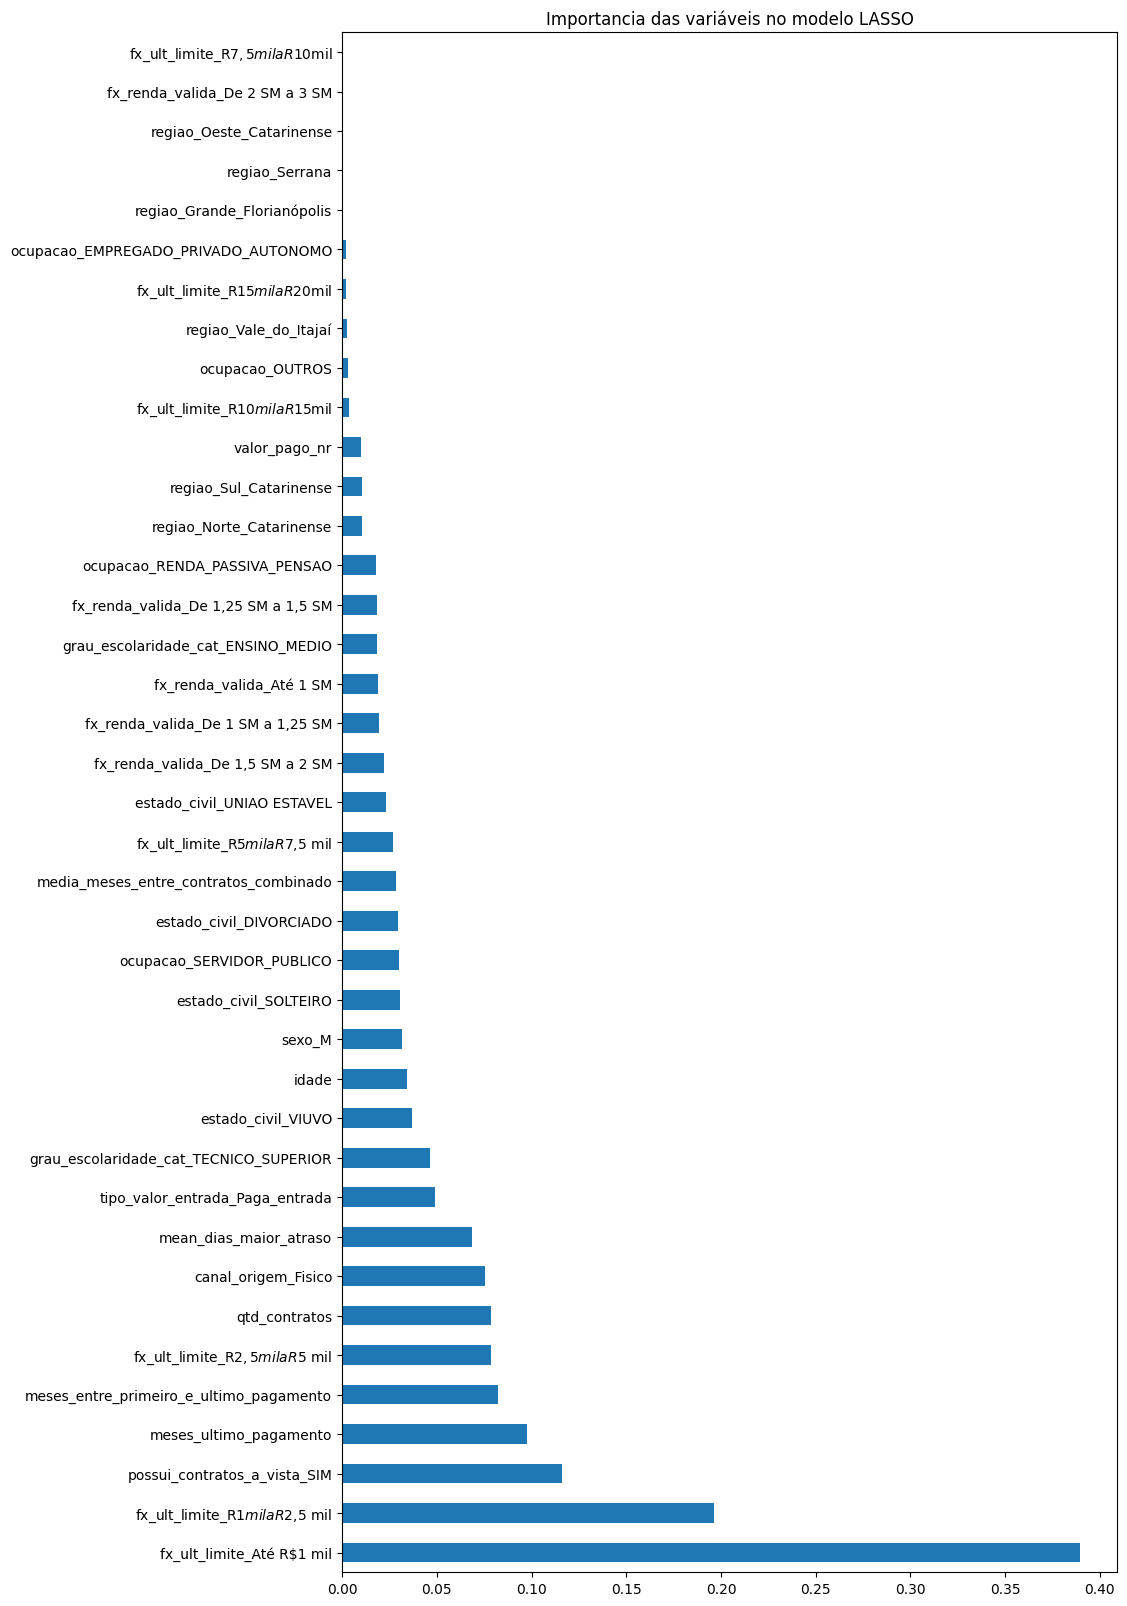

In [1397]:
lasso_coef = pd.Series(melhor_modelo_lasso.coef_, index=X_train_FIN_d_select.columns)
importancia = lasso_coef.abs().sort_values(ascending=False)
print("Importância das variáveis no treino:")
print(importancia)
importancia.head(68).plot(kind='barh', figsize=(10, 20), title="Importancia das variáveis no modelo LASSO")


In [1398]:
''''# Balanceamento dos dados

# Superamostragem da minoria
over = SVMSMOTE(sampling_strategy=0.5, random_state=2025)
X_over, y_over = over.fit_resample(X_train_d_select, y_train)

# Subamostragem da maioria
under = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)
X_final, y_final = under.fit_resample(X_over, y_over)'''

"'# Balanceamento dos dados\n\n# Superamostragem da minoria\nover = SVMSMOTE(sampling_strategy=0.5, random_state=2025)\nX_over, y_over = over.fit_resample(X_train_d_select, y_train)\n\n# Subamostragem da maioria\nunder = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)\nX_final, y_final = under.fit_resample(X_over, y_over)"

In [1399]:
'''# Verificando a distribuição das classes após o balanceamento
print("Antes do balanceamento:", y_train.value_counts())
print("Após Superamostragem:", y_over.value_counts())
print("Após Subamostragem:", y_final.value_counts())'''
X_final_FIN, y_final_FIN=X_train_FIN_d_select, y_train_FIN

In [1400]:
X_final_FIN.columns.to_list()

['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a

### Base de treino - Pré processamento EMPRESTIMO/FINANCIAMENTO

In [1401]:
# One hot encoding
X_train_EMP_FIN_dummy=pd.get_dummies(X_train_EMP_FIN, drop_first=True).astype(int)

In [1402]:
X_train_EMP_FIN_dummy.head(10)

idade  tempo_relacionamento_kredilig_meses  \
0      47                                   33   
1      42                                   80   
3      59                                   68   
5      56                                   44   
9      35                                  101   
12     46                                   74   
15     48                                   27   
16     54                                   38   
17     35                                   95   
18     41                                   60   

    media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
0                                       2                              7   
1                                       0                              0   
3                                       0                              0   
5                                       9                              0   
9                                       0                              1   
12                                      3                              3   
15                                      5                              0   
16                                      3                              5   
17                                      7                              3   
18                                      5                              6   

    principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
0                      9668                  66                       6   
1                     53880                 100                      10   
3                         0                   6                      30   
5                      3412                  56                      12   
9                      1160                  13                       1   
12                    10056                  56                       0   
15                     2801                  44                       0   
16                     9505                 132                       0   
17                     9801                 115                      12   
18                     5064                  93                       0   

    meses_entre_primeiro_e_ultimo_pagamento  \
0                                        26   
1                                        29   
3                                         5   
5                                        22   
9                                        12   
12                                       37   
15                                       27   
16                                       37   
17                                       28   
18                                       35   

    meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
0                                         33           8737   
1                                         40           5534   
3                                         35              0   
5                                         34           5084   
9                                         14           1260   
12                                        37          12707   
15                                        27           3638   
16                                        38          18261   
17                                        41           7556   
18                                        35          13664   

    valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
0                       8737                           0              1617   
1                       2255                           0              1940   
3                          0                           0              1730   
5                       3412                           0              1828   
9                       1050                           0              1730   
12                     10771                           0              1828   
15                      2801    

In [1403]:
X_train_EMP_FIN_dummy.columns.to_list()

['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',

##### Correlação com a variável target

In [1404]:
# Seleção de variáveis
X_train_EMP_FIN_d_select=X_train_EMP_FIN_dummy[['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'renda_valida_new',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_primeiro_mes',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'tipo_cal_entre_contratos_Contratos_dias_diferentes',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'mean_atraso_possui_info_SIM',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil',
 'fx_ult_limite_R$7,5 mil a R$10mil',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']]

In [1405]:
X_train_EMP_FIN_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação
                               "FIN_valor_medio_entrada_nr", # alta correlação
                               "principal_total_fechado", # alta correlação e pouca importancia
                               "mean_atraso_possui_info_SIM", # VIF alto e alta assimetria
                               "qtd_parcelas_pagas", # alta correlação
                               'valor_principal_total_nr',# alta correlação
                               "tipo_cal_entre_contratos_Contratos_dias_diferentes", # alta correlação e assimetria
                               "meses_entre_primeiro_e_ultimo_fechamento", # VIF alto
                               "limite_total_primeiro_mes",# alta correlação
                               "tempo_relacionamento_kredilig_meses", #VIF alta e menos importancia que a variável meses_entre_primeiro_e_ultimo_pagamento
                               'qtd_contratos_fechado_regular', #Vazamento de informação IV > 0.50
                               #'produtos_EMPRESTIMO/FINANCIAMENTO', 
                               'Cluster_1',
                               'Cluster_2',
                               'Cluster_3',
                               'Cluster_4',
                               'possui_contratos_a_vista_N_base_CARTAO',
                               'renda_valida_new', # categorização da renda
                               'limite_total_ultimo_mes', # categorização da renda
                               "nacionalidade_ESTRANGEIRO",# assimetria alta
                               'tipo_cal_entre_contratos_Contratos_dias_diferentes',
                               'tipo_cal_entre_contratos_Contratos_mesmo_dia',
                               #'canal_origem_Fisico',# Alto VIF
                               ], inplace=True, errors='ignore')

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_21368\1285534814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_EMP_FIN_d_select.drop(columns=['qtd_total_fechado_a_vista', # alta correlação


In [1406]:
# Correlação
# Pearson
df_corr = X_train_EMP_FIN_d_select.copy()
df_corr['target'] = y_train_EMP_FIN

correlacoes = df_corr.corr(numeric_only=True)['target'].drop('target').sort_values(key=abs, ascending=False)
print("Correlação com inad_reneg")
print(correlacoes)

Correlação com inad_reneg
meses_ultimo_pagamento                     0.29
media_meses_entre_contratos_combinado     -0.21
meses_entre_primeiro_e_ultimo_pagamento   -0.20
mean_dias_maior_atraso                     0.18
valor_pago_nr                             -0.16
idade                                     -0.15
canal_origem_Fisico                       -0.14
fx_ult_limite_R$2,5 mil a R$5 mil          0.10
fx_ult_limite_R$1 mil a R$2,5 mil          0.10
produtos_EMPRESTIMO/FINANCIAMENTO         -0.09
fx_ult_limite_R$7,5 mil a R$10mil         -0.08
fx_ult_limite_R$10 mil a R$15mil          -0.08
tipo_valor_entrada_Paga_entrada           -0.06
fx_ult_limite_R$15 mil a R$20mil          -0.06
ocupacao_OUTROS                            0.06
ocupacao_EMPREGADO_PRIVADO_AUTONOMO        0.06
possui_contratos_a_vista_SIM               0.04
qtd_contratos                              0.04
estado_civil_VIUVO                        -0.04
fx_ult_limite_Até R$1 mil                  0.03
estado_civil_S

In [1407]:
'''X_train_EMP_FIN_d_select=X_train_EMP_FIN_d_select[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
# 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
# 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 #'ocupacao_RENDA_PASSIVA_PENSAO',
 #'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 #'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 #'fx_renda_valida_De 2 SM a 3 SM',
 #'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 #'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil'
 ]]'''

# VIF
pd.set_option('display.max_rows', None)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_EMP_FIN_d_select.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_EMP_FIN_d_select.values, i)
                          for i in range(len(X_train_EMP_FIN_d_select.columns))]
print(vif_data.sort_values(by=['VIF'], ascending=False))

                                    Feature   VIF
12                      canal_origem_Fisico 19.77
0                                     idade 18.90
29        fx_renda_valida_De 1 SM a 1,25 SM 17.63
20              regiao_Grande_Florianópolis 15.11
21                 regiao_Norte_Catarinense 12.79
25                    regiao_Vale_do_Itajaí 11.97
3   meses_entre_primeiro_e_ultimo_pagamento 11.62
30      fx_renda_valida_De 1,25 SM a 1,5 SM 11.00
24                   regiao_Sul_Catarinense  8.71
14      ocupacao_EMPREGADO_PRIVADO_AUTONOMO  6.98
18       grau_escolaridade_cat_ENSINO_MEDIO  6.25
37        fx_ult_limite_R$2,5 mil a R$5 mil  6.24
31         fx_renda_valida_De 1,5 SM a 2 SM  6.18
38        fx_ult_limite_R$5 mil a R$7,5 mil  6.01
28                 fx_renda_valida_Até 1 SM  5.07
39        fx_ult_limite_R$7,5 mil a R$10mil  4.82
13        produtos_EMPRESTIMO/FINANCIAMENTO  4.68
35         fx_ult_limite_R$10 mil a R$15mil  4.63
4                             valor_pago_nr  4.47


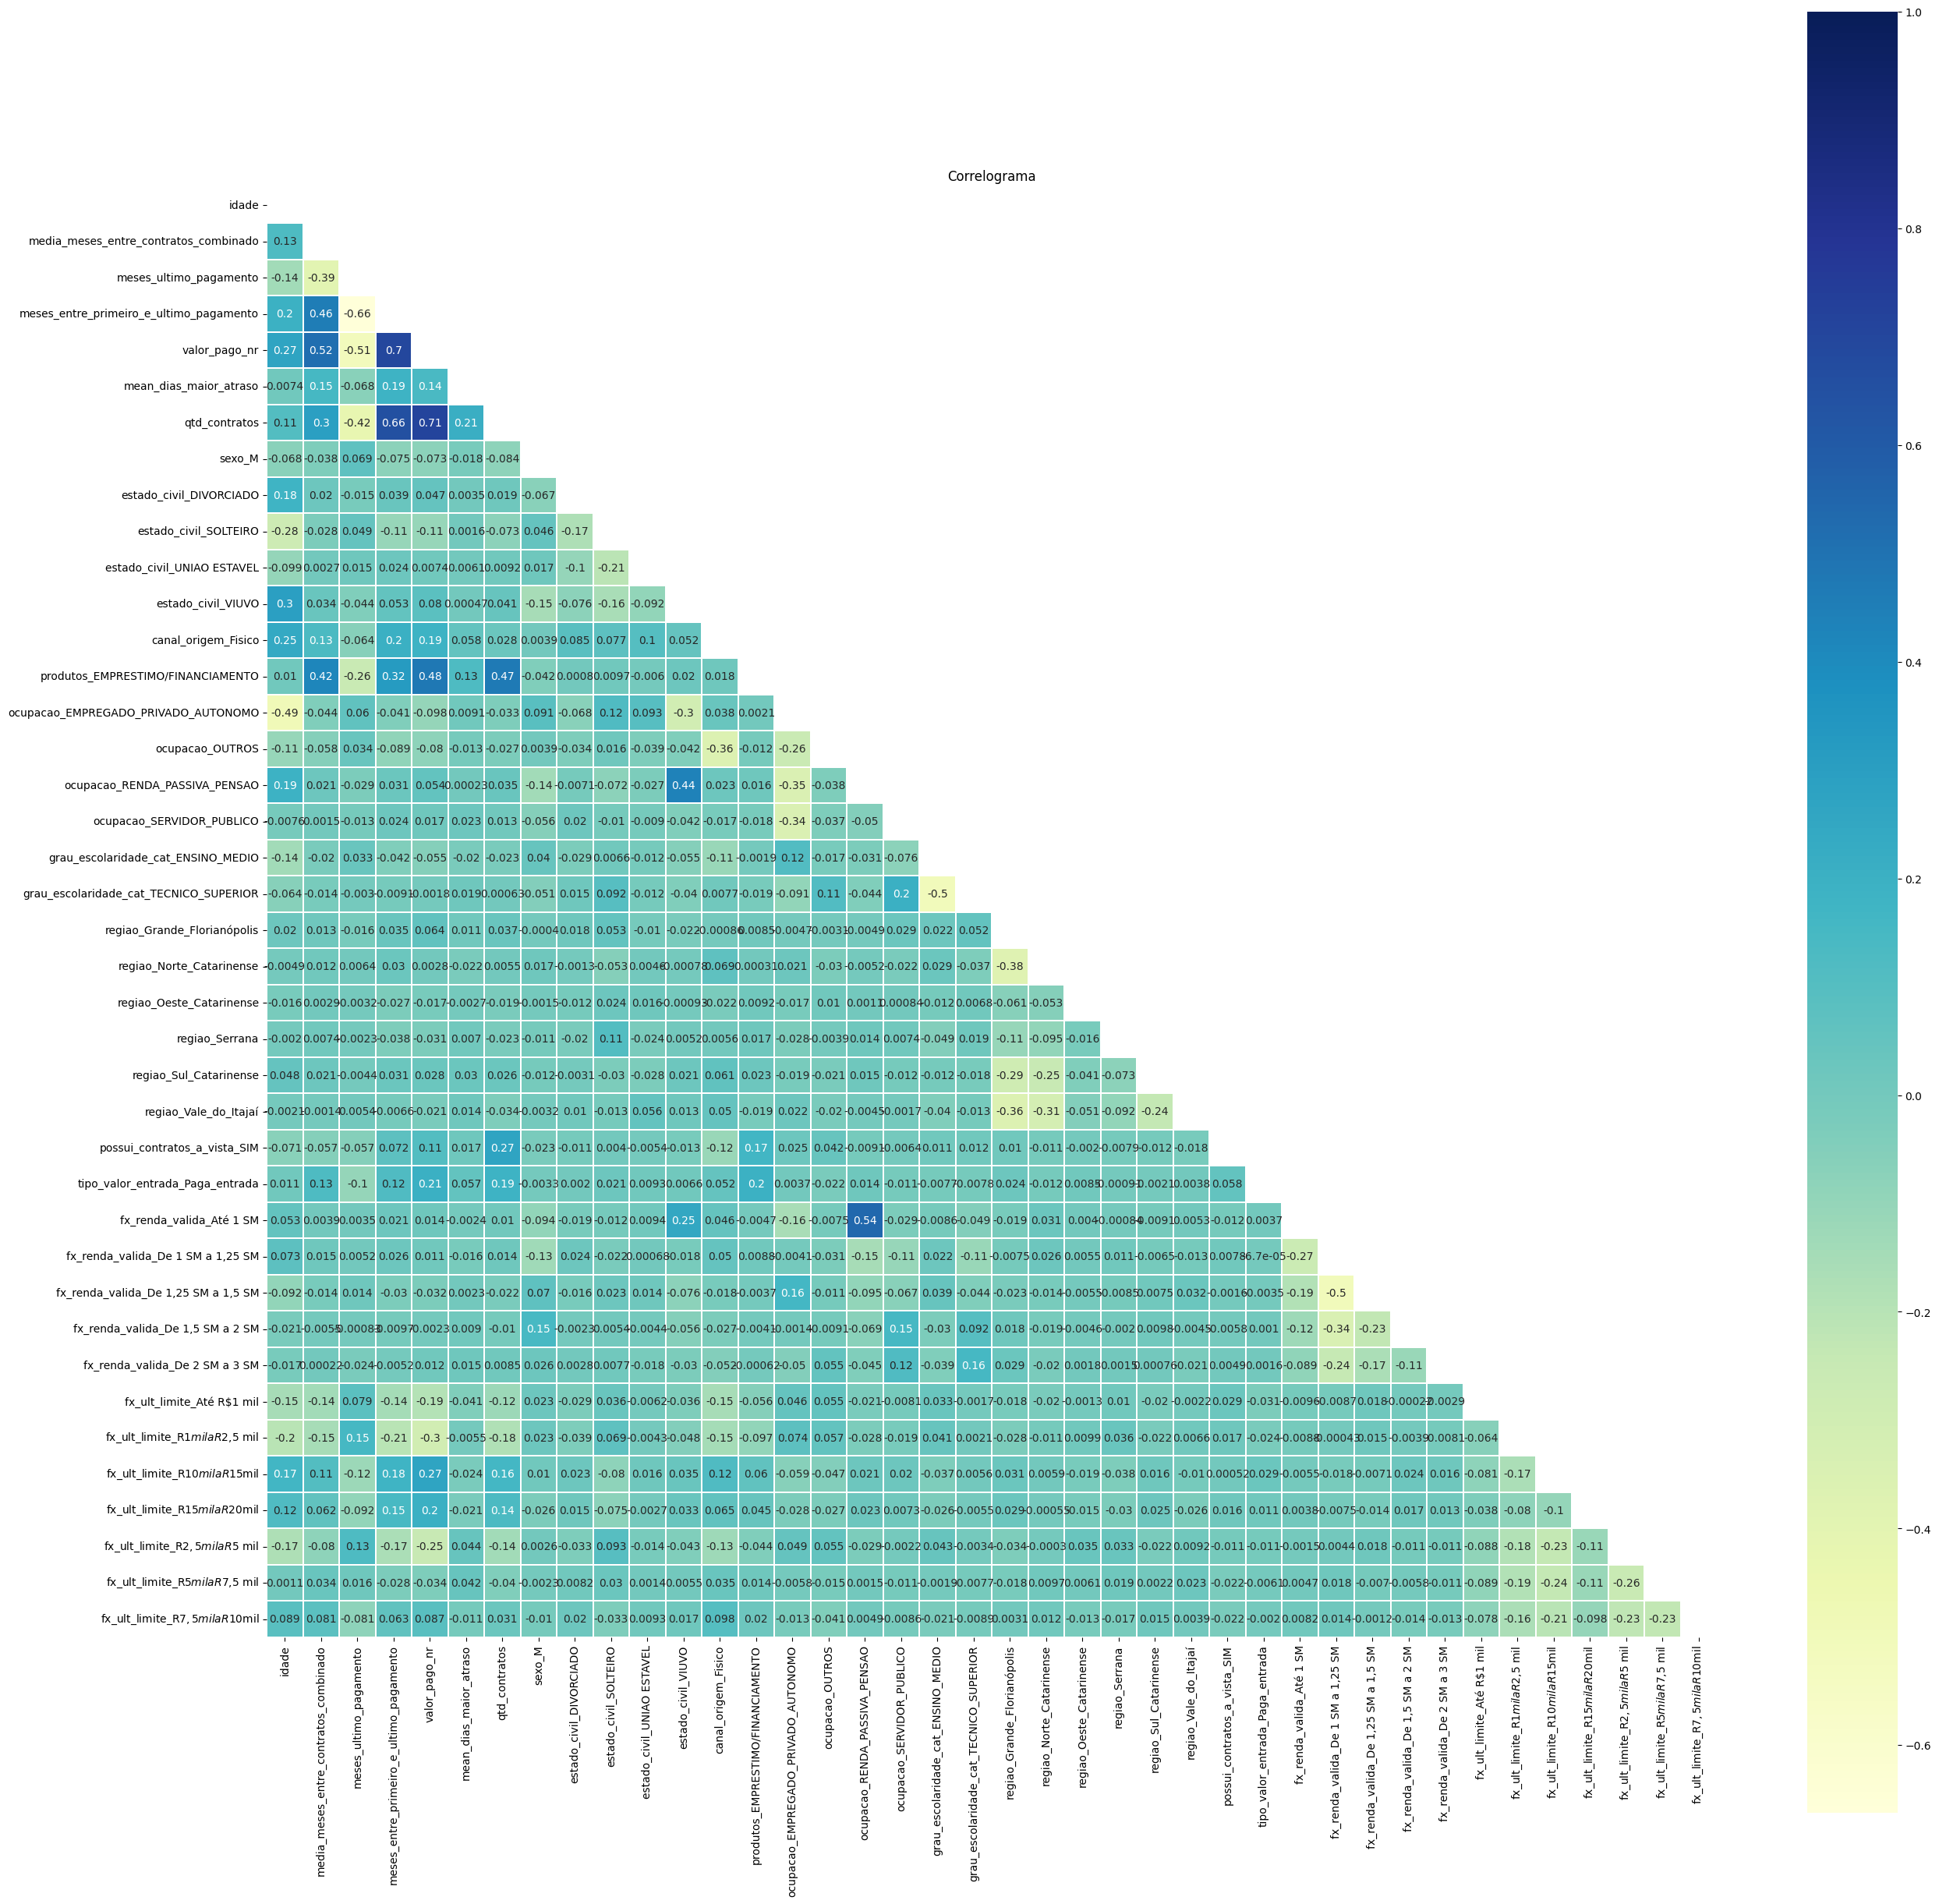

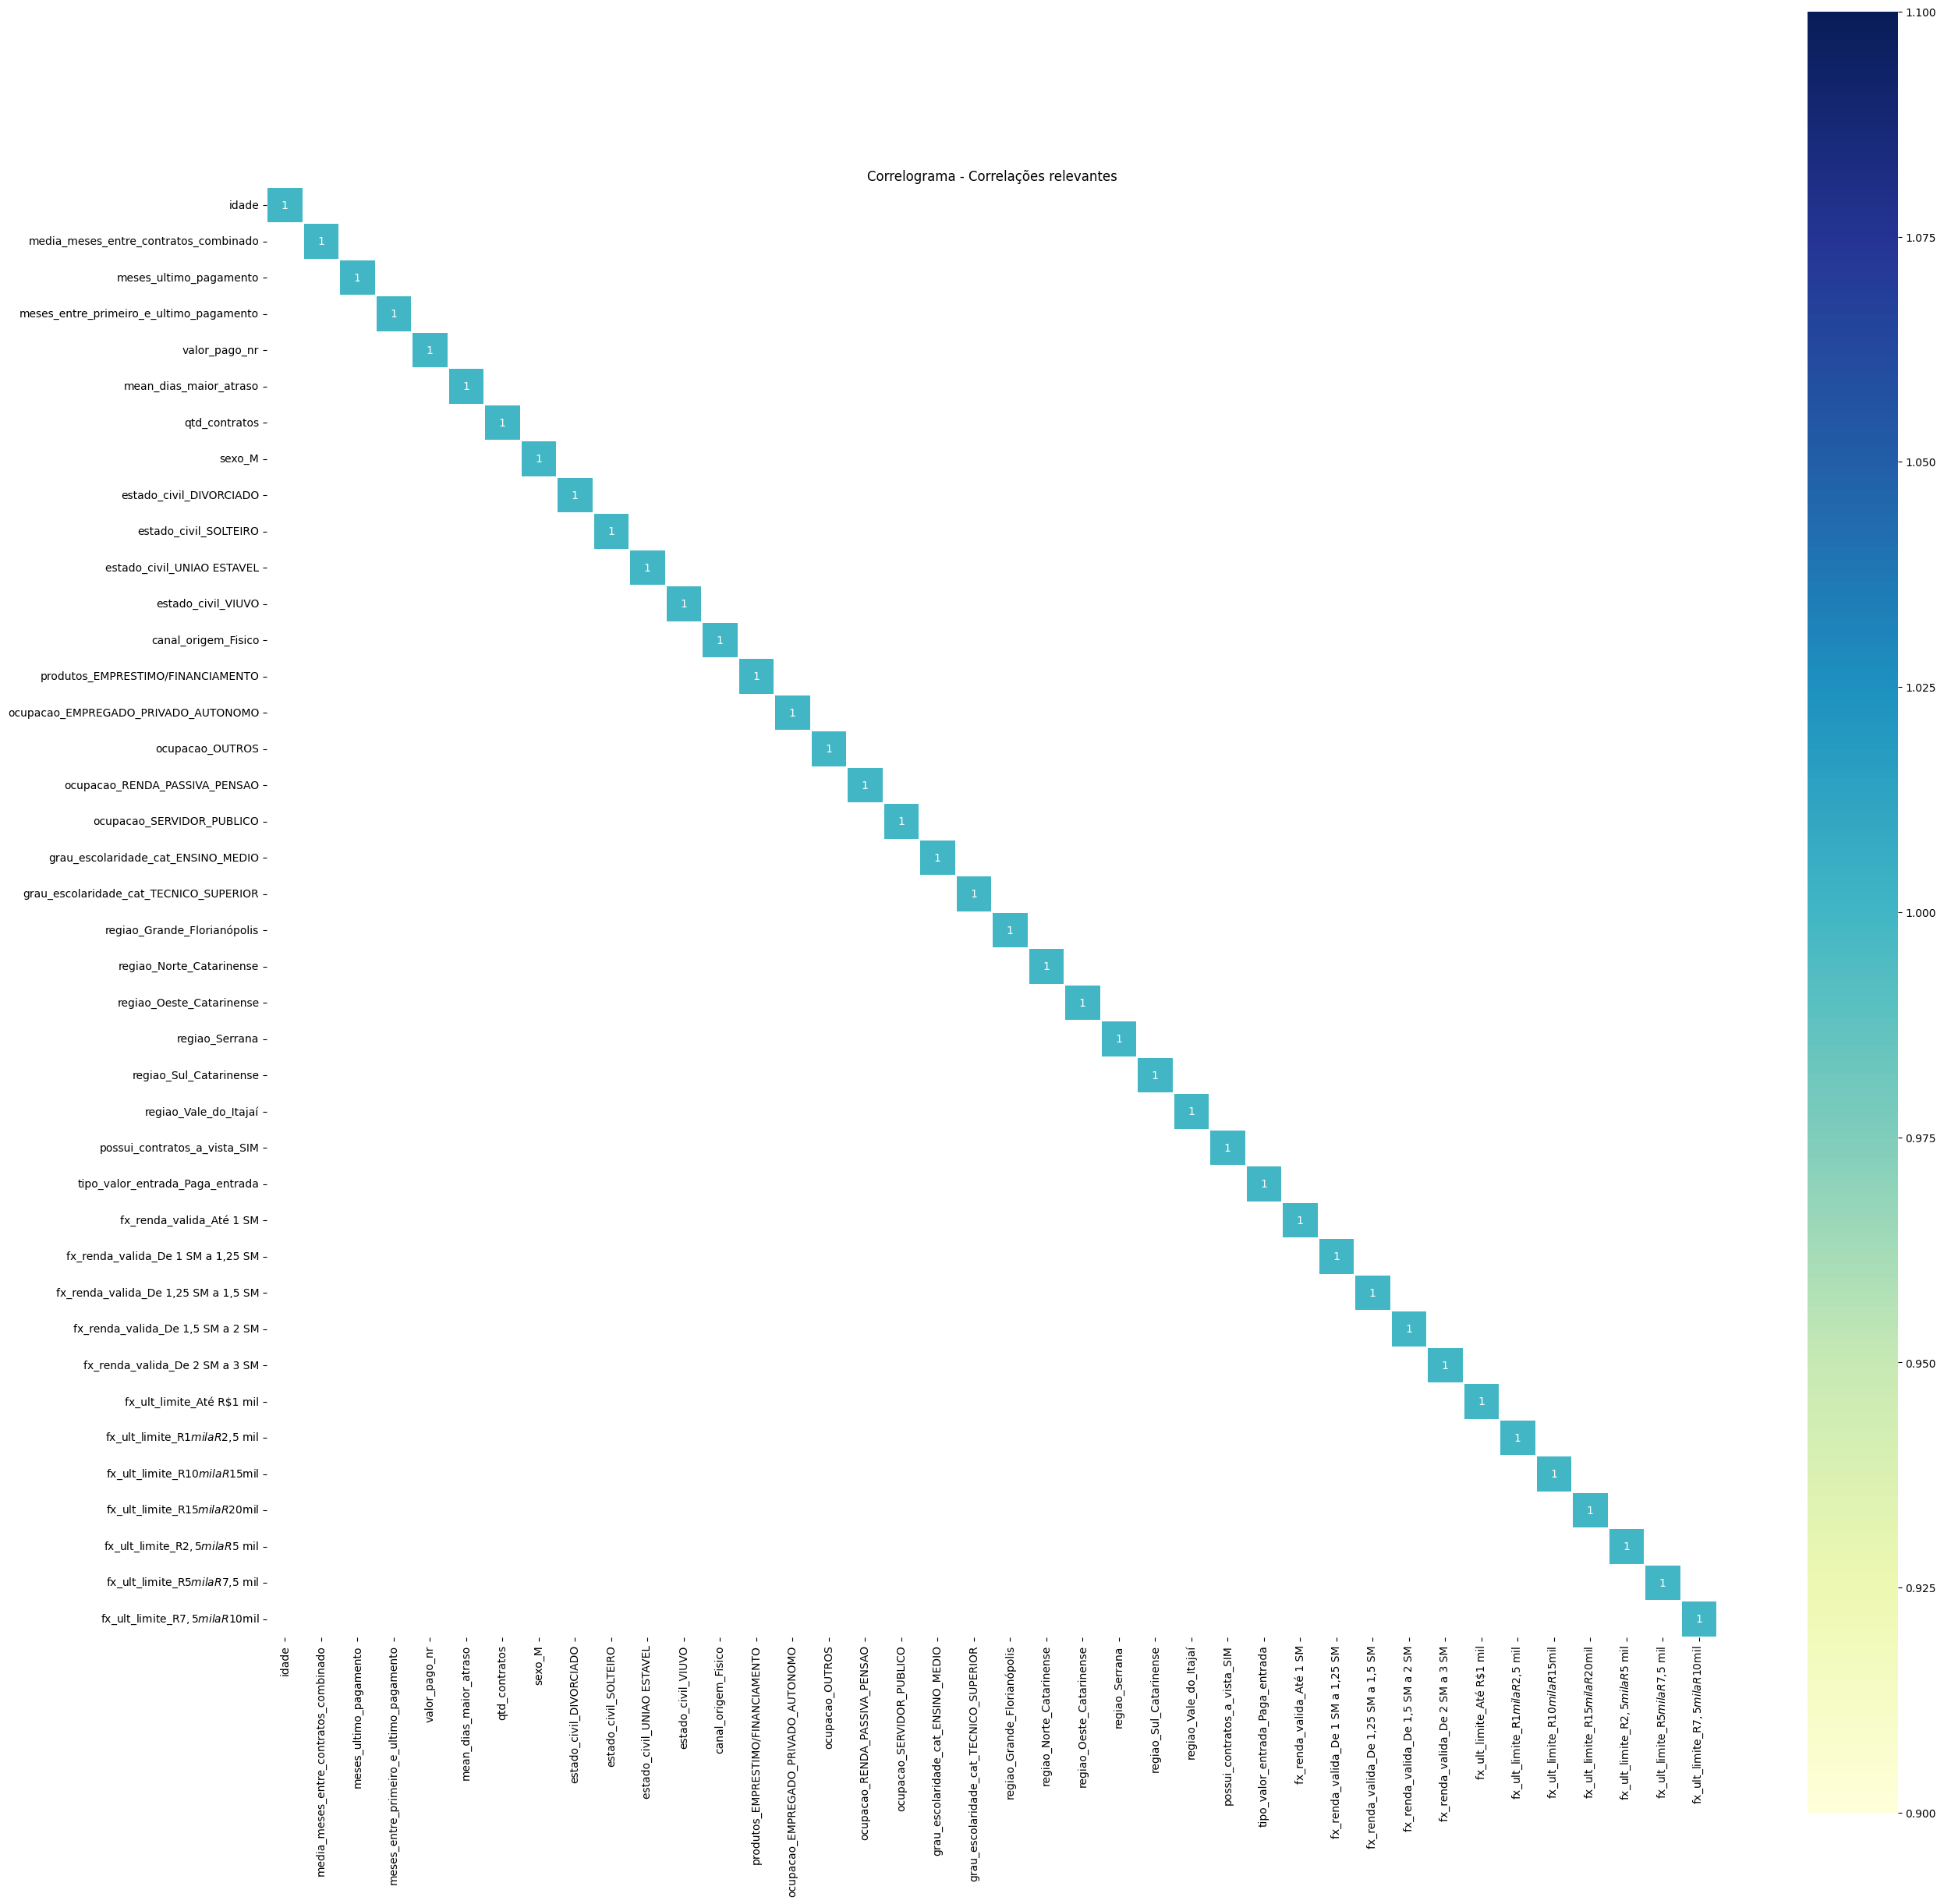

In [1408]:
# Correlação
corr=X_train_EMP_FIN_d_select.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
w=h=30
plot.figure(figsize=(h,w))
sns.heatmap(corr,mask=mask,vmax=1.0,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show

# Correlações relevantes
mask = np.abs(corr) >= 0.75
filtro_corr = corr.where(mask)

plot.figure(figsize=(h,w))
sns.heatmap(filtro_corr, vmax=1.0, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plot.title('Correlograma - Correlações relevantes')
plot.show()

In [1409]:
# Assimetria
skewed_feats=X_train_EMP_FIN_d_select.apply(lambda x: skew(x.dropna()))
print(skewed_feats.sort_values(ascending=False))

regiao_Oeste_Catarinense                  10.65
regiao_Serrana                             5.82
ocupacao_OUTROS                            5.76
fx_ult_limite_Até R$1 mil                  5.55
fx_ult_limite_R$15 mil a R$20mil           4.34
ocupacao_SERVIDOR_PUBLICO                  4.29
ocupacao_RENDA_PASSIVA_PENSAO              4.22
grau_escolaridade_cat_TECNICO_SUPERIOR     3.59
estado_civil_VIUVO                         3.50
valor_pago_nr                              3.47
possui_contratos_a_vista_SIM               3.41
fx_renda_valida_De 2 SM a 3 SM             3.26
qtd_contratos                              3.23
estado_civil_DIVORCIADO                    3.20
fx_renda_valida_Até 1 SM                   2.84
tipo_valor_entrada_Paga_entrada            2.78
media_meses_entre_contratos_combinado      2.52
estado_civil_UNIAO ESTAVEL                 2.52
fx_ult_limite_R$1 mil a R$2,5 mil          2.38
fx_renda_valida_De 1,5 SM a 2 SM           2.15
regiao_Sul_Catarinense                  

In [1410]:
# Variancia Nula
constant_features=[feat for feat in X_train_EMP_FIN_d_select.columns if X_train_EMP_FIN_d_select[feat].std()==0]
constant_features

[]

In [1411]:
X_train_EMP_FIN_d_select.head(5)

idade  media_meses_entre_contratos_combinado  meses_ultimo_pagamento  \
0     47                                      2                       6   
1     42                                      0                      10   
3     59                                      0                      30   
5     56                                      9                      12   
9     35                                      0                       1   

   meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
0                                       26           8737   
1                                       29           5534   
3                                        5              0   
5                                       22           5084   
9                                       12           1260   

   mean_dias_maior_atraso  qtd_contratos  sexo_M  estado_civil_DIVORCIADO  \
0                       8              8       0                        0   
1                      26             10       0                        0   
3                      31              1       0                        1   
5                      27              4       0                        0   
9                      29              2       0                        0   

   estado_civil_SOLTEIRO  estado_civil_UNIAO ESTAVEL  estado_civil_VIUVO  \
0                      0                           0                   0   
1                      0                           0                   0   
3                      0                           0                   0   
5                      0                           0                   0   
9                      0                           0                   0   

   canal_origem_Fisico  produtos_EMPRESTIMO/FINANCIAMENTO  \
0                    0                                  1   
1                    1                                  0   
3                    1                                  0   
5                    1                                  1   
9                    1                                  1   

   ocupacao_EMPREGADO_PRIVADO_AUTONOMO  ocupacao_OUTROS  \
0                                    1                0   
1                                    1                0   
3                                    1                0   
5                                    1                0   
9                                    1                0   

   ocupacao_RENDA_PASSIVA_PENSAO  ocupacao_SERVIDOR_PUBLICO  \
0                              0                          0   
1                              0                          0   
3                              0                          0   
5                              0                          0   
9                              0                          0   

   grau_escolaridade_cat_ENSINO_MEDIO  grau_escolaridade_cat_TECNICO_SUPERIOR  \
0                                   1                                       0   
1                                   1                                       0   
3                                   1                                       0   
5                                   1                                       0   
9                                   1                                       0   

   regiao_Grande_Florianópolis  regiao_Norte_Catarinense  \
0                            1                         0   
1                            0                         0   
3                            0                         0   
5                            1                         0   
9                            0                         0   

   regiao_Oeste_Catarinense  regiao_Serrana  regiao_Sul_Catarinense  \
0                         0               0                       0   
1                         0               0                       0   
3                         0               0                       0   
5                         0     

In [1412]:
# Normalização
# Padronização dos dados de treino

num_cols = ['idade',
 #'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 #'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
# 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 #"limite_total_ultimo_mes"
 ]

# Inicializa o scaler
scaler_EMP_FIN = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_EMP_FIN_d_select[num_cols] = pd.DataFrame(
    scaler_EMP_FIN.fit_transform(X_train_EMP_FIN_d_select[num_cols]),
    columns=num_cols,
    index=X_train_EMP_FIN_d_select.index
)
## Valores da padronização são obtidos em relação ao dados de treino

C:\Users\fernando.monteiro\AppData\Local\Temp\ipykernel_21368\3720369972.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_EMP_FIN_d_select[num_cols] = pd.DataFrame(


In [1413]:
X_train_EMP_FIN_d_select.head(5)

idade  media_meses_entre_contratos_combinado  meses_ultimo_pagamento  \
0  -0.19                                  -0.35                   -0.22   
1  -0.52                                  -0.79                    0.13   
3   0.59                                  -0.79                    1.92   
5   0.39                                   1.18                    0.31   
9  -0.97                                  -0.79                   -0.67   

   meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
0                                     0.28           0.14   
1                                     0.50          -0.20   
3                                    -1.30          -0.79   
5                                    -0.03          -0.25   
9                                    -0.78          -0.66   

   mean_dias_maior_atraso  qtd_contratos  sexo_M  estado_civil_DIVORCIADO  \
0                   -0.05           0.17       0                        0   
1                    1.68           0.46       0                        0   
3                    2.17          -0.85       0                        1   
5                    1.78          -0.41       0                        0   
9                    1.97          -0.70       0                        0   

   estado_civil_SOLTEIRO  estado_civil_UNIAO ESTAVEL  estado_civil_VIUVO  \
0                      0                           0                   0   
1                      0                           0                   0   
3                      0                           0                   0   
5                      0                           0                   0   
9                      0                           0                   0   

   canal_origem_Fisico  produtos_EMPRESTIMO/FINANCIAMENTO  \
0                    0                                  1   
1                    1                                  0   
3                    1                                  0   
5                    1                                  1   
9                    1                                  1   

   ocupacao_EMPREGADO_PRIVADO_AUTONOMO  ocupacao_OUTROS  \
0                                    1                0   
1                                    1                0   
3                                    1                0   
5                                    1                0   
9                                    1                0   

   ocupacao_RENDA_PASSIVA_PENSAO  ocupacao_SERVIDOR_PUBLICO  \
0                              0                          0   
1                              0                          0   
3                              0                          0   
5                              0                          0   
9                              0                          0   

   grau_escolaridade_cat_ENSINO_MEDIO  grau_escolaridade_cat_TECNICO_SUPERIOR  \
0                                   1                                       0   
1                                   1                                       0   
3                                   1                                       0   
5                                   1                                       0   
9                                   1                                       0   

   regiao_Grande_Florianópolis  regiao_Norte_Catarinense  \
0                            1                         0   
1                            0                         0   
3                            0                         0   
5                            1                         0   
9                            0                         0   

   regiao_Oeste_Catarinense  regiao_Serrana  regiao_Sul_Catarinense  \
0                         0               0                       0   
1                         0               0                       0   
3                         0               0                       0   
5                         0     

In [1414]:
# LASSO
# Hiperparêmetros
param_grid = {'alpha': [0.0001,0.001]}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
lasso = Lasso(max_iter=10000)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv)
grid.fit(X_train_EMP_FIN_d_select, y_train_EMP_FIN)

# Melhor modelo
melhor_modelo_lasso = grid.best_estimator_

In [1415]:
grid.best_estimator_

Lasso(alpha=0.0001, max_iter=10000)

Importância das variáveis no treino:
regiao_Oeste_Catarinense                  0.18
regiao_Norte_Catarinense                  0.17
regiao_Grande_Florianópolis               0.17
regiao_Vale_do_Itajaí                     0.16
regiao_Sul_Catarinense                    0.16
meses_ultimo_pagamento                    0.14
regiao_Serrana                            0.14
canal_origem_Fisico                       0.12
qtd_contratos                             0.10
mean_dias_maior_atraso                    0.09
valor_pago_nr                             0.06
media_meses_entre_contratos_combinado     0.05
tipo_valor_entrada_Paga_entrada           0.05
fx_ult_limite_R$2,5 mil a R$5 mil         0.05
fx_ult_limite_R$1 mil a R$2,5 mil         0.05
fx_ult_limite_R$5 mil a R$7,5 mil         0.05
possui_contratos_a_vista_SIM              0.04
fx_renda_valida_Até 1 SM                  0.03
fx_ult_limite_R$15 mil a R$20mil          0.03
fx_renda_valida_De 1,25 SM a 1,5 SM       0.03
idade                  

<Axes: title={'center': 'Importancia das variáveis no modelo LASSO'}>

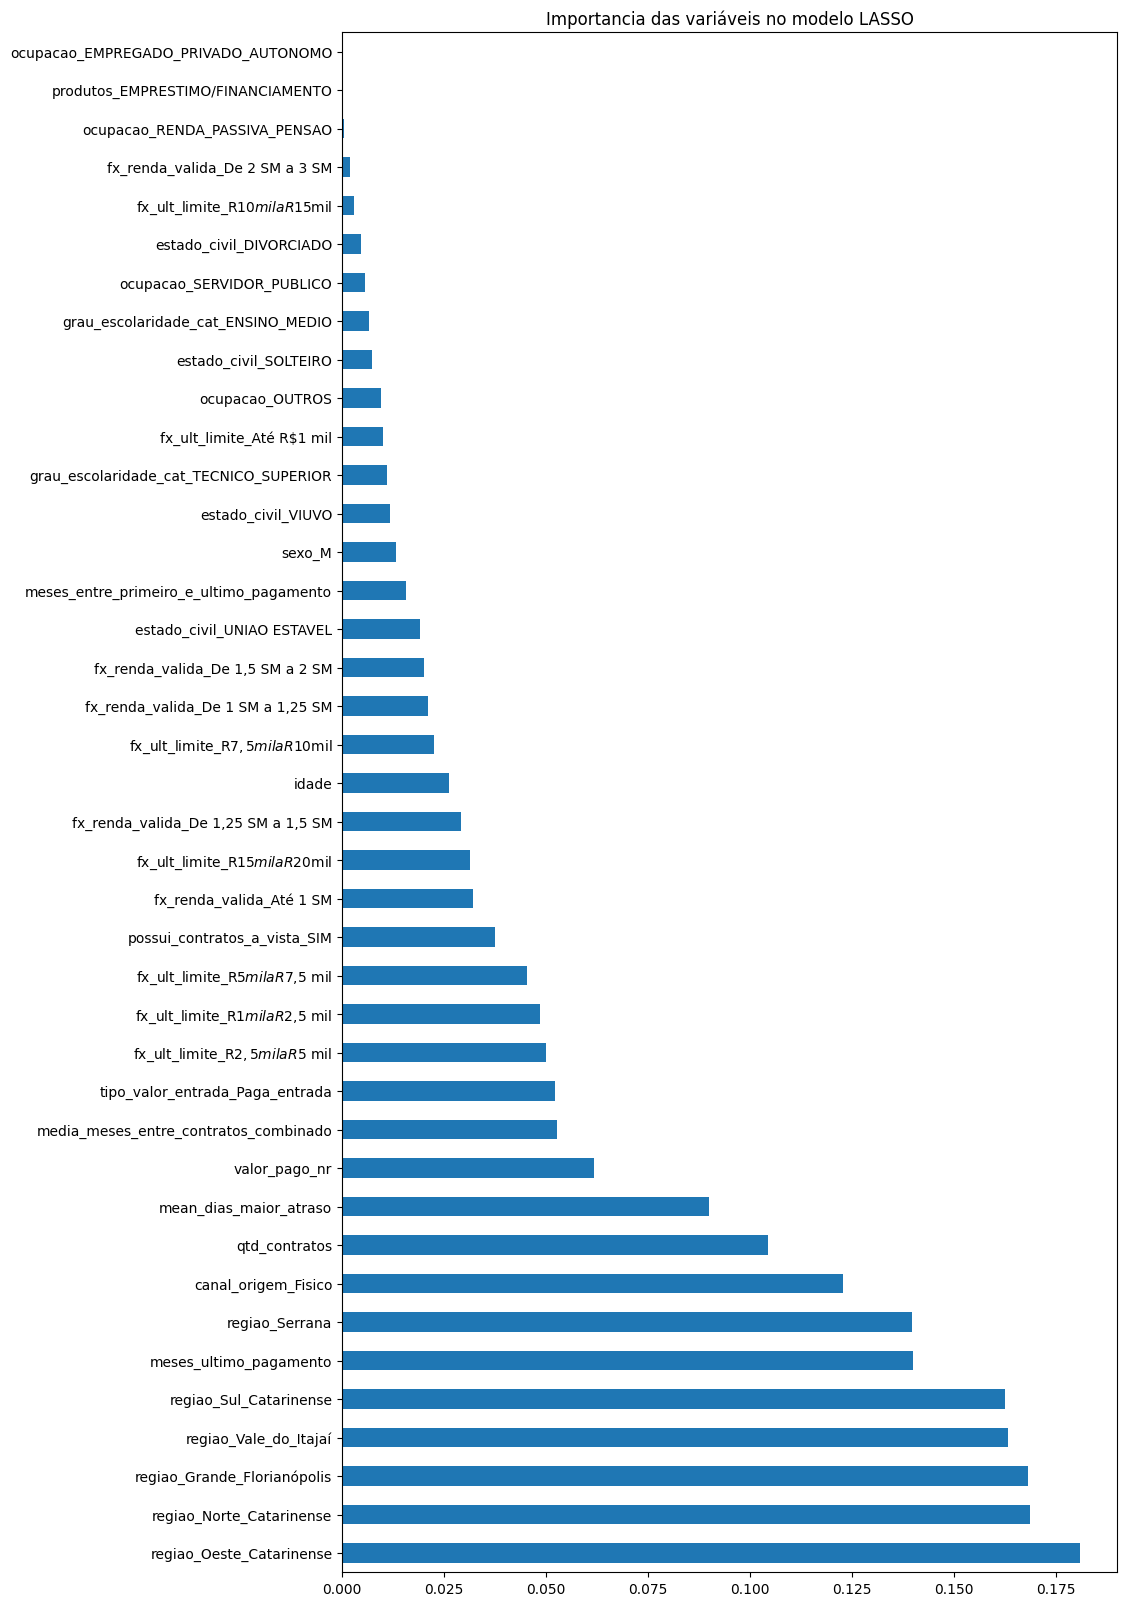

In [1416]:
lasso_coef = pd.Series(melhor_modelo_lasso.coef_, index=X_train_EMP_FIN_d_select.columns)
importancia = lasso_coef.abs().sort_values(ascending=False)
print("Importância das variáveis no treino:")
print(importancia)
importancia.head(68).plot(kind='barh', figsize=(10, 20), title="Importancia das variáveis no modelo LASSO")


In [1417]:
''''# Balanceamento dos dados

# Superamostragem da minoria
over = SVMSMOTE(sampling_strategy=0.5, random_state=2025)
X_over, y_over = over.fit_resample(X_train_d_select, y_train)

# Subamostragem da maioria
under = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)
X_final, y_final = under.fit_resample(X_over, y_over)'''

"'# Balanceamento dos dados\n\n# Superamostragem da minoria\nover = SVMSMOTE(sampling_strategy=0.5, random_state=2025)\nX_over, y_over = over.fit_resample(X_train_d_select, y_train)\n\n# Subamostragem da maioria\nunder = RandomUnderSampler(sampling_strategy=0.6, random_state=2025)\nX_final, y_final = under.fit_resample(X_over, y_over)"

In [1418]:
'''# Verificando a distribuição das classes após o balanceamento
print("Antes do balanceamento:", y_train.value_counts())
print("Após Superamostragem:", y_over.value_counts())
print("Após Subamostragem:", y_final.value_counts())'''
X_final_EMP_FIN, y_final_EMP_FIN=X_train_EMP_FIN_d_select, y_train_EMP_FIN

In [1419]:
X_final_EMP_FIN.columns.to_list()

['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_A

### Base de teste - Pré processamento

In [1420]:
df_test=pd.read_csv("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Cluster/df_test.csv", sep=",", header=0, index_col=None)
X_test=df_test.copy()

In [1421]:
X_test_FIN=X_test[X_test["produtos"]=="FINANCIAMENTO"].copy()
X_test_EMP_FIN=X_test[~(X_test["produtos"]=="FINANCIAMENTO")].copy()

#### FINANCIAMENTO

In [1422]:
# Amostragem
#Variável de interesse
y_test_FIN = X_test_FIN >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_test_FIN.drop(['inad_e_reneg'],axis=1, inplace=True)
# Frequência da variável target no treino
print(y_test_FIN.value_counts()) #qtd treino

inad_e_reneg
0               40787
1                8128
Name: count, dtype: int64


In [1423]:
ids_test_FIN = X_test_FIN["cpf_cnpj"]  
X_test_FIN = X_test_FIN.drop(columns=["cpf_cnpj"])

In [1424]:
# one hot encoding 
X_test_FIN_dummy = pd.get_dummies(X_test_FIN, drop_first=True).astype(int)
X_test_FIN_dummy = X_test_FIN_dummy.reindex(columns=X_train_FIN_dummy.columns, fill_value=0)

In [1425]:
# Seleção de variáveis
X_test_FIN_d_select = X_test_FIN_dummy.reindex(columns=X_train_FIN_d_select.columns, fill_value=0)

In [1426]:
## conjunto de teste - precisa ser o modelo que treinado para evitar vazamento de informação
X_test_FIN_d_select[num_cols] = pd.DataFrame(
    scaler_FIN.transform(X_test_FIN_d_select[num_cols]),
    columns=num_cols,
    index=X_test_FIN_d_select.index
)

#### EMPRESTIMO/FINANCIAMENTO

In [1427]:
# Amostragem
#Variável de interesse
y_test_EMP_FIN = X_test_EMP_FIN >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
X_test_EMP_FIN.drop(['inad_e_reneg'],axis=1, inplace=True)
# Frequência da variável target no treino
print(y_test_EMP_FIN.value_counts()) #qtd treino

inad_e_reneg
0               29919
1               21455
Name: count, dtype: int64


In [1428]:
ids_test_EMP_FIN = X_test_EMP_FIN["cpf_cnpj"]  
X_test_EMP_FIN = X_test_EMP_FIN.drop(columns=["cpf_cnpj"])

In [1429]:
# one hot encoding 
X_test_EMP_FIN_dummy = pd.get_dummies(X_test_EMP_FIN, drop_first=True).astype(int)
X_test_EMP_FIN_dummy = X_test_EMP_FIN_dummy.reindex(columns=X_train_EMP_FIN_dummy.columns, fill_value=0)

In [1430]:
# Seleção de variáveis
X_test_EMP_FIN_d_select = X_test_EMP_FIN_dummy.reindex(columns=X_train_EMP_FIN_d_select.columns, fill_value=0)

In [1431]:
## conjunto de teste - precisa ser o modelo que treinado para evitar vazamento de informação
X_test_EMP_FIN_d_select[num_cols] = pd.DataFrame(
    scaler_EMP_FIN.transform(X_test_EMP_FIN_d_select[num_cols]),
    columns=num_cols,
    index=X_test_EMP_FIN_d_select.index
)

# Modelos de Machine Learning

In [805]:
X_final_FIN.columns.to_list()

['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a

In [806]:
X_final_EMP_FIN.columns.to_list()

['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_A

## FINANCIAMENTO

In [949]:
# Selecionando variáveis
X_final_FIN=X_final_FIN[['idade', #
                          'media_meses_entre_contratos_combinado',#
                          'mean_dias_maior_atraso', #
                          'meses_ultimo_pagamento', #
                          #'meses_entre_primeiro_e_ultimo_pagamento',
                          'qtd_contratos',#
                          'valor_pago_nr',#
                          'sexo_M',#
                          'canal_origem_Fisico',#
                          'possui_contratos_a_vista_SIM',#
                          'fx_renda_valida_Até 1 SM',#
                          'fx_renda_valida_De 1 SM a 1,25 SM',
                          'fx_renda_valida_De 1,25 SM a 1,5 SM',#
                          'fx_renda_valida_De 1,5 SM a 2 SM',#
                          'fx_renda_valida_De 2 SM a 3 SM',#
                          'regiao_Norte_Catarinense',#
                          'regiao_Sul_Catarinense',#
                          'regiao_Grande_Florianópolis',#
                          #'regiao_Vale_do_Itajaí',
                          # 'regiao_Oeste_Catarinense',
                          # 'regiao_Serrana',
                          # 'fx_ult_limite_Até R$1 mil',#
                          # 'fx_ult_limite_R$1 mil a R$2,5 mil',#
                          # 'fx_ult_limite_R$10 mil a R$15mil',#
                          # 'fx_ult_limite_R$15 mil a R$20mil',#
                          # 'fx_ult_limite_R$2,5 mil a R$5 mil',#
                          # 'fx_ult_limite_R$5 mil a R$7,5 mil',#
                           #'fx_ult_limite_R$7,5 mil a R$10mil'
                           "tipo_valor_entrada_Paga_entrada",#
                           #'estado_civil_DIVORCIADO',
                            'estado_civil_SOLTEIRO',#
                            'estado_civil_UNIAO ESTAVEL',#
                            #'estado_civil_VIUVO',
                            'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',#
                            #'ocupacao_OUTROS',
                            #'ocupacao_RENDA_PASSIVA_PENSAO',
                            #'ocupacao_SERVIDOR_PUBLICO',
                            'grau_escolaridade_cat_ENSINO_MEDIO',#
                            'grau_escolaridade_cat_TECNICO_SUPERIOR',#
                          ]]

#### XGBoost

In [950]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def xgb_cv(learning_rate, max_depth, min_child_weight, gamma,
           subsample, colsample_bytree, n_estimators,reg_alpha,reg_lambda):

    # modelo base
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),  # precisa ser int
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=int(n_estimators),
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective="binary:logistic",
        n_jobs=5,
        random_state=2025,
        eval_metric="auc"
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_FIN, y_final_FIN,
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca
pbounds = {
    'learning_rate': (0.05, 0.2),
    'max_depth': (2,5),
    'min_child_weight': (1,20),
    "gamma": (0.5,5),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.6, 0.9),
    'n_estimators': (100,300),
    "reg_alpha": (0,10),
    "reg_lambda": (0,20)
}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | learni... | max_depth | min_ch... |   gamma   | subsample | colsam... | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9538971 | 0.0703232 | 4.6635551 | 18.719507 | 2.5050567 | 0.7164706 | 0.6772789 | 231.47351 | 4.9261693 | 19.284768 |
| 2         | 0.9528015 | 0.1701476 | 3.3656158 | 16.220103 | 0.6877308 | 0.8308373 | 0.6009513 | 158.56187 | 6.1091433 | 18.260547 |
| 3         | 0.9491882 | 0.0950172 | 2.7457959 | 13.661449 | 4.9438980 | 0.7404811 | 0.6369862 | 283.20627 | 9.4614353 | 5.5539474 |
| 4         | 0.9505784 | 0.1279480 | 2.4642349 | 1.2779197 | 1.9590944 | 0.8972695 | 0.7539423 | 275.29912 | 0.6739574 | 5.6830747 |
| 5         | 0.9544361 | 0.1203348 | 4.2853195 | 18.529623 | 2.2686069 | 0.8787263 | 0.7498836 | 260.40993 | 8.9658011 | 9.6425815 |
| 6         | 0.9546798 | 0.0813949 | 4.6491752 | 18.730757 | 

In [951]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])
xgb_FIN = XGBClassifier(
    objective="binary:logistic",
    n_jobs=5,
    random_state=2025,
    eval_metric="auc",
    **best_params
)
xgb_FIN.fit(X_final_FIN, y_final_FIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.88647077634813), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=np.float64(0.5), grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.2),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=234, n_jobs=5,
              num_parallel_tree=None, ...)

In [952]:
joblib.dump(xgb_FIN, "xgb_FIN_4.pkl")

['xgb_FIN_4.pkl']

In [953]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias = xgb_FIN.feature_importances_
nomes_variaveis = X_final_FIN.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                  Variável  Importância
5                            valor_pago_nr         0.23
3                   meses_ultimo_pagamento         0.14
2                   mean_dias_maior_atraso         0.12
4                            qtd_contratos         0.09
0                                    idade         0.07
7                      canal_origem_Fisico         0.06
8             possui_contratos_a_vista_SIM         0.05
1    media_meses_entre_contratos_combinado         0.04
18                   estado_civil_SOLTEIRO         0.04
17         tipo_valor_entrada_Paga_entrada         0.02
6                                   sexo_M         0.02
22  grau_escolaridade_cat_TECNICO_SUPERIOR         0.02
15                  regiao_Sul_Catarinense         0.02
12        fx_renda_valida_De 1,5 SM a 2 SM         0.01
16             regiao_Grande_Florianópolis         0.01
9                 fx_renda_valida_Até 1 SM         0.01
21      grau_escolaridade_cat_ENSINO_MEDIO      

#### Regressão Logística

In [954]:
# StepWise

log_reg_FIN = LogisticRegression(max_iter=1000,class_weight ='balanced', solver='liblinear',random_state=2025)

# stepwise forward selection
sfs = SequentialFeatureSelector(
    log_reg_FIN,
    n_features_to_select="auto",   # ou um número fixo
    direction="forward",           
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_final_FIN, y_final_FIN)

SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=1000,
                                                       random_state=2025,
                                                       solver='liblinear'),
                          n_jobs=-1, scoring='roc_auc')

In [955]:
# variáveis escolhidas
selected_features = X_final_FIN.columns[sfs.get_support()]
print("Variáveis selecionadas:", list(selected_features))

Variáveis selecionadas: ['idade', 'media_meses_entre_contratos_combinado', 'mean_dias_maior_atraso', 'meses_ultimo_pagamento', 'qtd_contratos', 'valor_pago_nr', 'sexo_M', 'canal_origem_Fisico', 'possui_contratos_a_vista_SIM', 'estado_civil_SOLTEIRO', 'grau_escolaridade_cat_TECNICO_SUPERIOR']


In [956]:
# reduzindo X_train e X_test
X_train_selected_FIN = X_final_FIN[selected_features]

'''selected_features=['idade', 
'media_meses_entre_contratos_combinado',
'mean_dias_maior_atraso', 
'meses_ultimo_pagamento', 
#'meses_entre_primeiro_e_ultimo_pagamento',
'qtd_contratos',
'valor_pago_nr',
'sexo_M',
'canal_origem_Fisico',
'possui_contratos_a_vista_SIM',
'fx_renda_valida_Até 1 SM',
'fx_renda_valida_De 1 SM a 1,25 SM',
'fx_renda_valida_De 1,25 SM a 1,5 SM',
'fx_renda_valida_De 1,5 SM a 2 SM',
'fx_renda_valida_De 2 SM a 3 SM',
'regiao_Norte_Catarinense',
'regiao_Sul_Catarinense',
'regiao_Grande_Florianópolis',
#'regiao_Vale_do_Itajaí',
# 'regiao_Oeste_Catarinense',
# 'regiao_Serrana',
'fx_ult_limite_Até R$1 mil',
'fx_ult_limite_R$1 mil a R$2,5 mil',
'fx_ult_limite_R$10 mil a R$15mil',
'fx_ult_limite_R$15 mil a R$20mil',
'fx_ult_limite_R$2,5 mil a R$5 mil',
'fx_ult_limite_R$5 mil a R$7,5 mil',
#'fx_ult_limite_R$7,5 mil a R$10mil'
"tipo_valor_entrada_Paga_entrada",
#'estado_civil_DIVORCIADO',
'estado_civil_SOLTEIRO',
'estado_civil_UNIAO ESTAVEL',
#'estado_civil_VIUVO',
'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
#'ocupacao_OUTROS',
#'ocupacao_RENDA_PASSIVA_PENSAO',
#'ocupacao_SERVIDOR_PUBLICO',
'grau_escolaridade_cat_ENSINO_MEDIO',
'grau_escolaridade_cat_TECNICO_SUPERIOR']
X_train_selected_FIN = X_final_FIN[selected_features]'''


# ajusta o modelo final
log_reg_FIN.fit(X_train_selected_FIN, y_final_FIN)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=2025,
                   solver='liblinear')

In [957]:
joblib.dump(log_reg_FIN, "log_FIN_4.pkl")

['log_FIN_4.pkl']

In [958]:
# Qual o efeito das caracteristicas sobre a inadimplência?
coef_df = pd.DataFrame({
    'Variável': X_train_selected_FIN.columns,
    'Coeficiente': log_reg_FIN.coef_[0],
    'Odds Ratio': np.exp(log_reg_FIN.coef_[0])
}).sort_values(by='Coeficiente', ascending=False)
print(coef_df)

                                  Variável  Coeficiente  Odds Ratio      %
4                            qtd_contratos         0.97        2.64 163.99
2                   mean_dias_maior_atraso         0.85        2.34 134.38
3                   meses_ultimo_pagamento         0.84        2.31 131.40
9                    estado_civil_SOLTEIRO         0.35        1.42  41.54
6                                   sexo_M         0.24        1.27  26.73
1    media_meses_entre_contratos_combinado        -0.33        0.72 -27.82
10  grau_escolaridade_cat_TECNICO_SUPERIOR        -0.38        0.68 -31.59
0                                    idade        -0.52        0.60 -40.25
7                      canal_origem_Fisico        -0.94        0.39 -60.87
5                            valor_pago_nr        -1.25        0.29 -71.28
8             possui_contratos_a_vista_SIM        -1.29        0.28 -72.42


In [959]:
'''selected_features=['idade', 'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M', 'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO', 'canal_origem_Fisico', 'grau_escolaridade_cat_TECNICO_SUPERIOR', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_ult_limite_Até R$1 mil', 'fx_ult_limite_R$1 mil a R$2,5 mil', 'fx_ult_limite_R$2,5 mil a R$5 mil', 'fx_ult_limite_R$5 mil a R$7,5 mil', 'fx_ult_limite_R$7,5 mil a R$10mil']
X_train_selected_FIN = X_final_FIN[selected_features]'''

"selected_features=['idade', 'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M', 'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO', 'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO', 'canal_origem_Fisico', 'grau_escolaridade_cat_TECNICO_SUPERIOR', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_ult_limite_Até R$1 mil', 'fx_ult_limite_R$1 mil a R$2,5 mil', 'fx_ult_limite_R$2,5 mil a R$5 mil', 'fx_ult_limite_R$5 mil a R$7,5 mil', 'fx_ult_limite_R$7,5 mil a R$10mil']\nX_train_selected_FIN = X_final_FIN[selected_features]"

In [960]:
'''#Back
['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Norte_Catarinense',
 'regiao_Sul_Catarinense',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 'fx_renda_valida_De 2 SM a 3 SM',
 'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 'fx_ult_limite_R$2,5 mil a R$5 mil',
 'fx_ult_limite_R$5 mil a R$7,5 mil',
 'fx_ult_limite_R$7,5 mil a R$10mil']

#For
['idade', 
'media_meses_entre_contratos_combinado',
'mean_dias_maior_atraso', 
'meses_ultimo_pagamento', 
#'meses_entre_primeiro_e_ultimo_pagamento',
'qtd_contratos',
'valor_pago_nr',
'sexo_M',
'canal_origem_Fisico',
'possui_contratos_a_vista_SIM',
'fx_renda_valida_Até 1 SM',
'fx_renda_valida_De 1 SM a 1,25 SM',
'fx_renda_valida_De 1,25 SM a 1,5 SM',
'fx_renda_valida_De 1,5 SM a 2 SM',
'fx_renda_valida_De 2 SM a 3 SM',
'regiao_Norte_Catarinense',
'regiao_Sul_Catarinense',
'regiao_Grande_Florianópolis',
#'regiao_Vale_do_Itajaí',
# 'regiao_Oeste_Catarinense',
# 'regiao_Serrana',
'fx_ult_limite_Até R$1 mil',
'fx_ult_limite_R$1 mil a R$2,5 mil',
'fx_ult_limite_R$10 mil a R$15mil',
'fx_ult_limite_R$15 mil a R$20mil',
'fx_ult_limite_R$2,5 mil a R$5 mil',
'fx_ult_limite_R$5 mil a R$7,5 mil',
#'fx_ult_limite_R$7,5 mil a R$10mil'
"tipo_valor_entrada_Paga_entrada",
#'estado_civil_DIVORCIADO',
'estado_civil_SOLTEIRO',
'estado_civil_UNIAO ESTAVEL',
#'estado_civil_VIUVO',
'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
#'ocupacao_OUTROS',
#'ocupacao_RENDA_PASSIVA_PENSAO',
#'ocupacao_SERVIDOR_PUBLICO',
'grau_escolaridade_cat_ENSINO_MEDIO',
'grau_escolaridade_cat_TECNICO_SUPERIOR']'''

'#Back\n[\'idade\',\n \'media_meses_entre_contratos_combinado\',\n \'meses_ultimo_pagamento\',\n \'meses_entre_primeiro_e_ultimo_pagamento\',\n \'valor_pago_nr\',\n \'mean_dias_maior_atraso\',\n \'qtd_contratos\',\n \'sexo_M\',\n \'estado_civil_DIVORCIADO\',\n \'estado_civil_SOLTEIRO\',\n \'estado_civil_UNIAO ESTAVEL\',\n \'estado_civil_VIUVO\',\n \'canal_origem_Fisico\',\n \'ocupacao_EMPREGADO_PRIVADO_AUTONOMO\',\n \'ocupacao_OUTROS\',\n \'ocupacao_RENDA_PASSIVA_PENSAO\',\n \'ocupacao_SERVIDOR_PUBLICO\',\n \'grau_escolaridade_cat_ENSINO_MEDIO\',\n \'grau_escolaridade_cat_TECNICO_SUPERIOR\',\n \'regiao_Norte_Catarinense\',\n \'regiao_Sul_Catarinense\',\n \'possui_contratos_a_vista_SIM\',\n \'tipo_valor_entrada_Paga_entrada\',\n \'fx_renda_valida_Até 1 SM\',\n \'fx_renda_valida_De 1 SM a 1,25 SM\',\n \'fx_renda_valida_De 1,25 SM a 1,5 SM\',\n \'fx_renda_valida_De 1,5 SM a 2 SM\',\n \'fx_renda_valida_De 2 SM a 3 SM\',\n \'fx_ult_limite_Até R$1 mil\',\n \'fx_ult_limite_R$1 mil a R$2,5 mil

In [961]:
''' #X_final_FIN=X_final_FIN.drop(columns=["regiao_Grande_Florianópolis"])
X_final_FIN2=X_final_FIN[['idade', 
                          'media_meses_entre_contratos_combinado',
                          'mean_dias_maior_atraso', 
                          'meses_ultimo_pagamento', 
                          #'meses_entre_primeiro_e_ultimo_pagamento',
                          'qtd_contratos',
                          'valor_pago_nr',
                          'sexo_M',
                          'canal_origem_Fisico',
                          'possui_contratos_a_vista_SIM',
                          'fx_renda_valida_Até 1 SM',
                          'fx_renda_valida_De 1 SM a 1,25 SM',
                          'fx_renda_valida_De 1,25 SM a 1,5 SM',
                          'fx_renda_valida_De 1,5 SM a 2 SM',
                          'fx_renda_valida_De 2 SM a 3 SM',
                          'regiao_Norte_Catarinense',
                          'regiao_Sul_Catarinense',
                          'regiao_Grande_Florianópolis',
                          #'regiao_Vale_do_Itajaí',
                          # 'regiao_Oeste_Catarinense',
                          # 'regiao_Serrana',
                           'fx_ult_limite_Até R$1 mil',
                           'fx_ult_limite_R$1 mil a R$2,5 mil',
                           'fx_ult_limite_R$10 mil a R$15mil',
                           'fx_ult_limite_R$15 mil a R$20mil',
                           'fx_ult_limite_R$2,5 mil a R$5 mil',
                           'fx_ult_limite_R$5 mil a R$7,5 mil',
                           #'fx_ult_limite_R$7,5 mil a R$10mil'
                           "tipo_valor_entrada_Paga_entrada",
                           #'estado_civil_DIVORCIADO',
                           'estado_civil_SOLTEIRO',
                           'estado_civil_UNIAO ESTAVEL',
                           #'estado_civil_VIUVO',
                           'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
                           #'ocupacao_OUTROS',
                           #'ocupacao_RENDA_PASSIVA_PENSAO',
                           #'ocupacao_SERVIDOR_PUBLICO',
                           'grau_escolaridade_cat_ENSINO_MEDIO',
                           'grau_escolaridade_cat_TECNICO_SUPERIOR',                      
                          ]]'''
X_const = sm.add_constant(X_train_selected_FIN)
modelo_logit = sm.Logit(y_final_FIN, X_const)
resultado = modelo_logit.fit()
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.300532
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           inad_e_reneg   No. Observations:               114619
Model:                          Logit   Df Residuals:                   114607
Method:                           MLE   Df Model:                           11
Date:                Tue, 09 Sep 2025   Pseudo R-squ.:                  0.3296
Time:                        12:28:54   Log-Likelihood:                -34447.
converged:                       True   LL-Null:                       -51384.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.9772   

#### Floresta Aleatória

In [962]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def fa_cv(max_depth, n_estimators,max_samples,min_samples_split):

    # modelo base
    model = RandomForestClassifier(
        max_depth=int(max_depth),  # precisa ser int
        n_estimators=int(n_estimators),
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        max_samples=max_samples,
        min_samples_split=int(min_samples_split),
        random_state=2025,
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_FIN, y_final_FIN.values.ravel(),
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca (equivalente ao param_dists)
pbounds = {
    'max_depth': (2,10),
    'min_samples_split': (2, 20),     
    'max_samples': (0.6, 0.9),
    'n_estimators': (100,300),

}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=fa_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | max_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.9147338 | 3.0839053 | 17.981330 | 0.8797816 | 189.11363 |
| 2         | 0.9289615 | 5.1058843 | 6.6367358 | 0.7972102 | 198.52338 |
| 3         | 0.9460045 | 9.7139073 | 16.417720 | 0.7365615 | 260.21161 |
| 4         | 0.9037269 | 2.3337437 | 15.850241 | 0.6009513 | 158.56187 |
| 5         | 0.9356073 | 6.8873146 | 18.434493 | 0.6900345 | 149.71972 |
| 6         | 0.9459111 | 9.5691482 | 18.814969 | 0.6573733 | 189.96246 |
| 7         | 0.9397949 | 7.6303798 | 17.249353 | 0.6363271 | 280.59800 |
| 8         | 0.9354405 | 6.8676039 | 5.2248841 | 0.8111047 | 250.82349 |
| 9         | 0.9354689 | 6.5253258 | 11.008191 | 0.8351562 | 269.21478 |
| 10        | 0.9457878 | 9.6450755 | 16.823661 | 0.7121594 | 260.02420 |
| 11        | 0.9459203 | 9.9747252 | 18.221448 | 0.7015476 | 264.80787 |
| 12        | 0.9144155 | 3.8329780 | 

In [963]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['n_estimators'] = int(best_params['n_estimators'])
floresta_FIN = RandomForestClassifier(
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        random_state=2025,
        **best_params

    )
floresta_FIN.fit(X_final_FIN, y_final_FIN)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_samples=np.float64(0.9),
                       min_samples_split=20, n_estimators=206, n_jobs=5,
                       random_state=2025)

In [964]:
joblib.dump(floresta_FIN, "fa_FIN_4.pkl")

['fa_FIN_4.pkl']

In [965]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias_floresta = floresta_FIN.feature_importances_
nomes_variaveis = X_final_FIN.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias_floresta
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                  Variável  Importância
5                            valor_pago_nr         0.30
3                   meses_ultimo_pagamento         0.25
2                   mean_dias_maior_atraso         0.19
0                                    idade         0.08
1    media_meses_entre_contratos_combinado         0.05
4                            qtd_contratos         0.04
20     ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.02
7                      canal_origem_Fisico         0.02
18                   estado_civil_SOLTEIRO         0.02
17         tipo_valor_entrada_Paga_entrada         0.01
6                                   sexo_M         0.00
8             possui_contratos_a_vista_SIM         0.00
15                  regiao_Sul_Catarinense         0.00
19              estado_civil_UNIAO ESTAVEL         0.00
22  grau_escolaridade_cat_TECNICO_SUPERIOR         0.00
16             regiao_Grande_Florianópolis         0.00
21      grau_escolaridade_cat_ENSINO_MEDIO      

## EMPRESTIMO/FINANCIAMENTO

In [1432]:
# Selecionando variáveis
X_final_EMP_FIN=X_final_EMP_FIN[[
                          'produtos_EMPRESTIMO/FINANCIAMENTO',
                          'idade', #
                          'media_meses_entre_contratos_combinado',#
                          'mean_dias_maior_atraso', #
                          'meses_ultimo_pagamento', #
                          #'meses_entre_primeiro_e_ultimo_pagamento',
                          'qtd_contratos',#
                          'valor_pago_nr',#
                          'sexo_M',#
                          'canal_origem_Fisico',#
                          'possui_contratos_a_vista_SIM',#
                          'fx_renda_valida_Até 1 SM',#
                          'fx_renda_valida_De 1 SM a 1,25 SM',
                          'fx_renda_valida_De 1,25 SM a 1,5 SM',#
                          'fx_renda_valida_De 1,5 SM a 2 SM',#
                          'fx_renda_valida_De 2 SM a 3 SM',#
                          'regiao_Norte_Catarinense',#
                          'regiao_Sul_Catarinense',#
                          'regiao_Grande_Florianópolis',#
                          #'regiao_Vale_do_Itajaí',
                          # 'regiao_Oeste_Catarinense',
                          # 'regiao_Serrana',
                          # 'fx_ult_limite_Até R$1 mil',#
                          # 'fx_ult_limite_R$1 mil a R$2,5 mil',#
                          # 'fx_ult_limite_R$10 mil a R$15mil',#
                          # 'fx_ult_limite_R$15 mil a R$20mil',#
                          # 'fx_ult_limite_R$2,5 mil a R$5 mil',#
                          # 'fx_ult_limite_R$5 mil a R$7,5 mil',#
                           #'fx_ult_limite_R$7,5 mil a R$10mil'
                           "tipo_valor_entrada_Paga_entrada",#
                           #'estado_civil_DIVORCIADO',
                            'estado_civil_SOLTEIRO',#
                            'estado_civil_UNIAO ESTAVEL',#
                            #'estado_civil_VIUVO',
                            'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',#
                            #'ocupacao_OUTROS',
                            #'ocupacao_RENDA_PASSIVA_PENSAO',
                            #'ocupacao_SERVIDOR_PUBLICO',
                            'grau_escolaridade_cat_ENSINO_MEDIO',#
                            'grau_escolaridade_cat_TECNICO_SUPERIOR',#
]]

#### XGBoost

In [1433]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def xgb_cv(learning_rate, max_depth, min_child_weight, gamma,
           subsample, colsample_bytree, n_estimators,reg_alpha,reg_lambda):

    # modelo base
    model = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=int(max_depth),  # precisa ser int
        min_child_weight=int(min_child_weight),
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=int(n_estimators),
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective="binary:logistic",
        n_jobs=5,
        random_state=2025,
        eval_metric="auc"
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_EMP_FIN, y_final_EMP_FIN,
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca
pbounds = {
    'learning_rate': (0.05, 0.2),
    'max_depth': (2,5),
    'min_child_weight': (1,20),
    "gamma": (0.5,5),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.6, 0.9),
    'n_estimators': (100,300),
    "reg_alpha": (0,10),
    "reg_lambda": (0,20)
}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)


|   iter    |  target   | learni... | max_depth | min_ch... |   gamma   | subsample | colsam... | n_esti... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.8347400 | 0.0703232 | 4.6635551 | 18.719507 | 2.5050567 | 0.7164706 | 0.6772789 | 231.47351 | 4.9261693 | 19.284768 |
| 2         | 0.8305654 | 0.1701476 | 3.3656158 | 16.220103 | 0.6877308 | 0.8308373 | 0.6009513 | 158.56187 | 6.1091433 | 18.260547 |
| 3         | 0.8183660 | 0.0950172 | 2.7457959 | 13.661449 | 4.9438980 | 0.7404811 | 0.6369862 | 283.20627 | 9.4614353 | 5.5539474 |
| 4         | 0.8223604 | 0.1279480 | 2.4642349 | 1.2779197 | 1.9590944 | 0.8972695 | 0.7539423 | 275.29912 | 0.6739574 | 5.6830747 |
| 5         | 0.8353332 | 0.1203348 | 4.2853195 | 18.529623 | 2.2686069 | 0.8787263 | 0.7498836 | 260.40993 | 8.9658011 | 9.6425815 |
| 6         | 0.8366762 | 0.0812430 | 4.6324578 | 18.704712 | 

In [1434]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['n_estimators'] = int(best_params['n_estimators'])
xgb_EMP_FIN = XGBClassifier(
    objective="binary:logistic",
    n_jobs=5,
    random_state=2025,
    eval_metric="auc",
    **best_params
)
xgb_EMP_FIN.fit(X_final_EMP_FIN, y_final_EMP_FIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.8417825482759349), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=np.float64(0.5), grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.2),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=244, n_jobs=5,
              num_parallel_tree=None, ...)

In [1435]:
joblib.dump(xgb_EMP_FIN, "xgb_EMP_FIN_4.pkl")

['xgb_EMP_FIN_4.pkl']

In [1436]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias = xgb_EMP_FIN.feature_importances_
nomes_variaveis = X_final_EMP_FIN.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                  Variável  Importância
8                      canal_origem_Fisico         0.17
4                   meses_ultimo_pagamento         0.17
2    media_meses_entre_contratos_combinado         0.12
3                   mean_dias_maior_atraso         0.10
5                            qtd_contratos         0.09
0        produtos_EMPRESTIMO/FINANCIAMENTO         0.07
6                            valor_pago_nr         0.06
18         tipo_valor_entrada_Paga_entrada         0.03
1                                    idade         0.02
9             possui_contratos_a_vista_SIM         0.02
23  grau_escolaridade_cat_TECNICO_SUPERIOR         0.02
19                   estado_civil_SOLTEIRO         0.01
7                                   sexo_M         0.01
14          fx_renda_valida_De 2 SM a 3 SM         0.01
21     ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.01
17             regiao_Grande_Florianópolis         0.01
20              estado_civil_UNIAO ESTAVEL      

#### Regressão Logística

In [1437]:
# StepWise

log_reg_EMP_FIN = LogisticRegression(max_iter=1000, solver='liblinear',random_state=2025)

# stepwise forward selection
sfs = SequentialFeatureSelector(
    log_reg_EMP_FIN,
    n_features_to_select="auto",   # ou um número fixo
    direction="backward",           
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_final_EMP_FIN, y_final_EMP_FIN)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=2025,
                                                       solver='liblinear'),
                          n_jobs=-1, scoring='roc_auc')

In [1438]:
# variáveis escolhidas
selected_features = X_final_EMP_FIN.columns[sfs.get_support()]
print("Variáveis selecionadas:", list(selected_features))

Variáveis selecionadas: ['idade', 'media_meses_entre_contratos_combinado', 'mean_dias_maior_atraso', 'meses_ultimo_pagamento', 'qtd_contratos', 'valor_pago_nr', 'sexo_M', 'canal_origem_Fisico', 'possui_contratos_a_vista_SIM', 'fx_renda_valida_Até 1 SM', 'fx_renda_valida_De 1,25 SM a 1,5 SM', 'tipo_valor_entrada_Paga_entrada']


In [1439]:
# reduzindo X_train e X_test
X_train_selected_EMP_FIN = X_final_EMP_FIN[selected_features]

# ajusta o modelo final
log_reg_EMP_FIN.fit(X_train_selected_EMP_FIN, y_final_EMP_FIN)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=2025, solver='liblinear')

In [1440]:
joblib.dump(log_reg_EMP_FIN, "log_EMP_FIN_4.pkl")

['log_EMP_FIN_4.pkl']

In [1441]:
# Qual o efeito das caracteristicas sobre a inadimplência?
coef_df = pd.DataFrame({
    'Variável': X_train_selected_EMP_FIN.columns,
    'Coeficiente': log_reg_EMP_FIN.coef_[0],
    'Odds Ratio': np.exp(log_reg_EMP_FIN.coef_[0])
}).sort_values(by='Coeficiente', ascending=False)
print(coef_df)

                                 Variável  Coeficiente  Odds Ratio
3                  meses_ultimo_pagamento         0.60        1.83
4                           qtd_contratos         0.56        1.75
2                  mean_dias_maior_atraso         0.45        1.57
9                fx_renda_valida_Até 1 SM         0.10        1.11
6                                  sexo_M         0.06        1.06
10    fx_renda_valida_De 1,25 SM a 1,5 SM         0.06        1.06
0                                   idade        -0.16        0.86
8            possui_contratos_a_vista_SIM        -0.20        0.82
11        tipo_valor_entrada_Paga_entrada        -0.24        0.79
1   media_meses_entre_contratos_combinado        -0.29        0.75
5                           valor_pago_nr        -0.38        0.68
7                     canal_origem_Fisico        -0.75        0.47


In [1442]:
'''selected_features=['idade', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'canal_origem_Fisico', 'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense', 'regiao_Oeste_Catarinense', 'regiao_Serrana', 'regiao_Sul_Catarinense', 'regiao_Vale_do_Itajaí', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_ult_limite_Até R$1 mil', 'fx_ult_limite_R$10 mil a R$15mil', 'fx_ult_limite_R$15 mil a R$20mil', 'fx_ult_limite_R$7,5 mil a R$10mil']
X_train_selected_EMP_FIN = X_final_EMP_FIN[selected_features]'''

"selected_features=['idade', 'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento', 'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'canal_origem_Fisico', 'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense', 'regiao_Oeste_Catarinense', 'regiao_Serrana', 'regiao_Sul_Catarinense', 'regiao_Vale_do_Itajaí', 'possui_contratos_a_vista_SIM', 'tipo_valor_entrada_Paga_entrada', 'fx_ult_limite_Até R$1 mil', 'fx_ult_limite_R$10 mil a R$15mil', 'fx_ult_limite_R$15 mil a R$20mil', 'fx_ult_limite_R$7,5 mil a R$10mil']\nX_train_selected_EMP_FIN = X_final_EMP_FIN[selected_features]"

In [1443]:
'''X_final_EMP_FIN2=X_final_EMP_FIN[['idade',
 'media_meses_entre_contratos_combinado',
 'meses_ultimo_pagamento',
 #'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'sexo_M',
# 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
# 'estado_civil_VIUVO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 #'ocupacao_OUTROS',
 #'ocupacao_RENDA_PASSIVA_PENSAO',
 #'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'regiao_Grande_Florianópolis',
 'regiao_Norte_Catarinense',
 'regiao_Oeste_Catarinense',
 #'regiao_Serrana',
 'regiao_Sul_Catarinense',
 'regiao_Vale_do_Itajaí',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'fx_renda_valida_Até 1 SM',
 'fx_renda_valida_De 1 SM a 1,25 SM',
 'fx_renda_valida_De 1,25 SM a 1,5 SM',
 'fx_renda_valida_De 1,5 SM a 2 SM',
 #'fx_renda_valida_De 2 SM a 3 SM',
 #'fx_ult_limite_Até R$1 mil',
 'fx_ult_limite_R$1 mil a R$2,5 mil',
 'fx_ult_limite_R$10 mil a R$15mil',
 'fx_ult_limite_R$15 mil a R$20mil',
 #'fx_ult_limite_R$2,5 mil a R$5 mil',
 #'fx_ult_limite_R$5 mil a R$7,5 mil',
 #'fx_ult_limite_R$7,5 mil a R$10mil'
 ]]
X_const = sm.add_constant(X_final_EMP_FIN2)
modelo_logit = sm.Logit(y_final_EMP_FIN, X_const)
resultado = modelo_logit.fit()
print(resultado.summary())'''

"X_final_EMP_FIN2=X_final_EMP_FIN[['idade',\n 'media_meses_entre_contratos_combinado',\n 'meses_ultimo_pagamento',\n #'meses_entre_primeiro_e_ultimo_pagamento',\n 'valor_pago_nr',\n 'mean_dias_maior_atraso',\n 'qtd_contratos',\n 'sexo_M',\n# 'estado_civil_DIVORCIADO',\n 'estado_civil_SOLTEIRO',\n 'estado_civil_UNIAO ESTAVEL',\n# 'estado_civil_VIUVO',\n 'canal_origem_Fisico',\n 'produtos_EMPRESTIMO/FINANCIAMENTO',\n #'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',\n #'ocupacao_OUTROS',\n #'ocupacao_RENDA_PASSIVA_PENSAO',\n #'ocupacao_SERVIDOR_PUBLICO',\n 'grau_escolaridade_cat_ENSINO_MEDIO',\n 'grau_escolaridade_cat_TECNICO_SUPERIOR',\n 'regiao_Grande_Florianópolis',\n 'regiao_Norte_Catarinense',\n 'regiao_Oeste_Catarinense',\n #'regiao_Serrana',\n 'regiao_Sul_Catarinense',\n 'regiao_Vale_do_Itajaí',\n 'possui_contratos_a_vista_SIM',\n 'tipo_valor_entrada_Paga_entrada',\n 'fx_renda_valida_Até 1 SM',\n 'fx_renda_valida_De 1 SM a 1,25 SM',\n 'fx_renda_valida_De 1,25 SM a 1,5 SM',\n 'fx_renda_valid

#### Floresta Aleatória

In [1444]:
#########################
# Bayesian Optimization #
#########################
# 1. Função objetivo
def fa_cv(max_depth, n_estimators,max_samples,min_samples_split):

    # modelo base
    model = RandomForestClassifier(
        max_depth=int(max_depth),  # precisa ser int
        n_estimators=int(n_estimators),
        criterion="log_loss",       
        n_jobs=5,
        max_samples=max_samples,
        min_samples_split=int(min_samples_split),
        random_state=2025,
    )
    
    # validação cruzada
    auc = cross_val_score(model, X_final_EMP_FIN, y_final_EMP_FIN.values.ravel(),
                          scoring="roc_auc", cv=5).mean()
    return auc

# 2. Espaço de busca (equivalente ao param_dists)
pbounds = {
    'max_depth': (2,10),
    'min_samples_split': (2, 20),     
    'max_samples': (0.6, 0.9),
    'n_estimators': (100,300),

}

# 3. Rodando o Bayesian Optimization
optimizer = BayesianOptimization(
    f=fa_cv,
    pbounds=pbounds,
    random_state=2025,
    verbose=2
)

optimizer.maximize(init_points=5, n_iter=15)

|   iter    |  target   | max_depth | min_sa... | max_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.7617141 | 3.0839053 | 17.981330 | 0.8797816 | 189.11363 |
| 2         | 0.7885944 | 5.1058843 | 6.6367358 | 0.7972102 | 198.52338 |
| 3         | 0.8201922 | 9.7139073 | 16.417720 | 0.7365615 | 260.21161 |
| 4         | 0.7448176 | 2.3337437 | 15.850241 | 0.6009513 | 158.56187 |
| 5         | 0.7993167 | 6.8873146 | 18.434493 | 0.6900345 | 149.71972 |
| 6         | 0.8196660 | 9.5691482 | 18.814969 | 0.6573733 | 189.96246 |
| 7         | 0.8081537 | 7.6303798 | 17.249353 | 0.6363271 | 280.59800 |
| 8         | 0.7993965 | 6.8676039 | 5.2248841 | 0.8111047 | 250.82349 |
| 9         | 0.7996466 | 6.5253258 | 11.008191 | 0.8351562 | 269.21478 |
| 10        | 0.8242386 | 10.0      | 16.719906 | 0.7725867 | 260.06532 |
| 11        | 0.8243400 | 10.0      | 19.995051 | 0.9       | 259.77930 |
| 12        | 0.8240424 | 10.0      | 

In [1445]:
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['n_estimators'] = int(best_params['n_estimators'])
floresta_EMP_FIN = RandomForestClassifier(
        criterion="log_loss",       
        class_weight= 'balanced',
        n_jobs=5,
        random_state=2025,
        **best_params

    )
floresta_EMP_FIN.fit(X_final_EMP_FIN, y_final_EMP_FIN)

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=10, max_samples=np.float64(0.6),
                       min_samples_split=20, n_estimators=248, n_jobs=5,
                       random_state=2025)

In [1446]:
joblib.dump(floresta_EMP_FIN, "fa_EMP_FIN_4.pkl")

['fa_EMP_FIN_4.pkl']

In [1447]:
# quais as caracteristicas mais importantes para definir a inadimplência?
importancias_floresta = floresta_EMP_FIN.feature_importances_
nomes_variaveis = X_final_EMP_FIN.columns

df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias_floresta
})

# Ordenar por importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)
print(df_importancia)

                                  Variável  Importância
4                   meses_ultimo_pagamento         0.29
2    media_meses_entre_contratos_combinado         0.16
3                   mean_dias_maior_atraso         0.15
6                            valor_pago_nr         0.14
5                            qtd_contratos         0.10
1                                    idade         0.05
8                      canal_origem_Fisico         0.04
0        produtos_EMPRESTIMO/FINANCIAMENTO         0.02
18         tipo_valor_entrada_Paga_entrada         0.01
21     ocupacao_EMPREGADO_PRIVADO_AUTONOMO         0.01
9             possui_contratos_a_vista_SIM         0.00
19                   estado_civil_SOLTEIRO         0.00
7                                   sexo_M         0.00
17             regiao_Grande_Florianópolis         0.00
23  grau_escolaridade_cat_TECNICO_SUPERIOR         0.00
14          fx_renda_valida_De 2 SM a 3 SM         0.00
22      grau_escolaridade_cat_ENSINO_MEDIO      

# Comparação de modelos

## FINANCIAMENTO

In [968]:
X_test_xgb_FIN=X_test_FIN_d_select[X_final_FIN.columns]
X_test_rl_FIN=X_test_FIN_d_select[X_train_selected_FIN.columns]
X_test_fa_FIN=X_test_FIN_d_select[X_final_FIN.columns]

In [969]:
xgb_FIN = joblib.load("xgb_FIN_4.pkl")
logistico_model_FIN = joblib.load("log_FIN_4.pkl")
floresta_FIN = joblib.load("fa_FIN_4.pkl")
previsao_xgb = xgb_FIN.predict(X_test_xgb_FIN)
previsao_logistico = logistico_model_FIN.predict(X_test_rl_FIN)
previsao_floresta= floresta_FIN.predict(X_test_fa_FIN)

In [970]:
# Matriz de confusão
# Rótulos das classes
labels = [0, 1]
cm_xgb = confusion_matrix(y_test_FIN, previsao_xgb,labels=labels)
cm_logistico = confusion_matrix(y_test_FIN, previsao_logistico,labels=labels)
cm_floresta = confusion_matrix(y_test_FIN, previsao_floresta,labels=labels)
y_test=y_test_FIN

In [971]:
# Matriz de confusão bonitinha
# Minimizar o Erro do tipo I: Classificar um cliente bom como ruim é maximizar a especificidade
# Minimizar o Erro do tipo II: Classificar um cliente ruim como bom é maximizar o recall/Sensibilidade

# XGB
cm_xgb_df = pd.DataFrame(cm_xgb, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_xgb_df['Total Linha'] = cm_xgb_df.sum(axis=1)
cm_xgb_df.loc['Total Coluna'] = cm_xgb_df.sum()

# Cálculo de métricas
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
especificidade_xgb = tn_xgb / (tn_xgb + fp_xgb)
vpn_xgb = tn_xgb / (tn_xgb + fn_xgb)
recall_xgb = recall_score(y_test, previsao_xgb)
media_rec_spec_xgb = np.sqrt(recall_xgb * especificidade_xgb)

# Logistica
cm_logistico_df = pd.DataFrame(cm_logistico, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_logistico_df['Total Linha'] = cm_logistico_df.sum(axis=1)
cm_logistico_df.loc['Total Coluna'] = cm_logistico_df.sum()

# Cálculo de métricas
tn_log, fp_log, fn_log, tp_log = cm_logistico.ravel()
especificidade_log = tn_log / (tn_log + fp_log)
vpn_log = tn_log / (tn_log + fn_log)
recall_log = recall_score(y_test, previsao_logistico)
media_rec_spec_log = np.sqrt(recall_log * especificidade_log)

# Floresta Aleatória
cm_floresta_df = pd.DataFrame(cm_floresta, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_floresta_df['Total Linha'] = cm_floresta_df.sum(axis=1)
cm_floresta_df.loc['Total Coluna'] = cm_floresta_df.sum()

# Cálculo de métricas
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
vpn_fa = tn_fa / (tn_fa + fn_fa)
recall_fa = recall_score(y_test, previsao_floresta)
media_rec_spec_fa = np.sqrt(recall_fa * especificidade_fa)

print("Matriz de Confusão XGB:\n", cm_xgb_df)
print("Matriz de Confusão Logística:\n", cm_logistico_df)
print("Matriz de Confusão Floresta Aleatória:\n", cm_floresta_df)

Matriz de Confusão XGB:
               Previsto 0  Previsto 1  Total Linha
Real 0             39738        1049        40787
Real 1              2593        5535         8128
Total Coluna       42331        6584        48915
Matriz de Confusão Logística:
               Previsto 0  Previsto 1  Total Linha
Real 0             33001        7786        40787
Real 1              1461        6667         8128
Total Coluna       34462       14453        48915
Matriz de Confusão Floresta Aleatória:
               Previsto 0  Previsto 1  Total Linha
Real 0             36303        4484        40787
Real 1              1183        6945         8128
Total Coluna       37486       11429        48915


In [972]:
#print(classification_report(previsao_xgb, y_test))

In [973]:
#print(classification_report(previsao_logistico, y_test))

In [974]:
#print(classification_report(previsao_floresta, y_test))

In [975]:
import builtins

# Montar um dicionário com os resultados
resultados = {
    "Modelo": ["XGB", "Logística", "Floresta"],
    "VN": [
        tn_xgb,
        tn_log,
        tn_fa
    ],
    "FP": [
        fp_xgb,
        fp_log,
        fp_fa
    ],
    "FN": [
        fn_xgb,
        fn_log,
        fn_fa
    ],
    "VP": [
        tp_xgb,
        tp_log,
        tp_fa
    ],
    "Acurácia": [
        builtins.round(accuracy_score(y_test, previsao_xgb), 4),
        builtins.round(accuracy_score(y_test, previsao_logistico), 4),
        builtins.round(accuracy_score(y_test, previsao_floresta), 4)
    ],
    "AUC": [
        builtins.round(roc_auc_score(y_test, previsao_xgb), 4),
        builtins.round(roc_auc_score(y_test, previsao_logistico), 4),
        builtins.round(roc_auc_score(y_test, previsao_floresta), 4)
    ],
    "F1-Score": [
        builtins.round(f1_score(y_test, previsao_xgb), 4),
        builtins.round(f1_score(y_test, previsao_logistico), 4),
        builtins.round(f1_score(y_test, previsao_floresta), 4)
    ],
    "Recall": [
        builtins.round(recall_xgb, 4),
        builtins.round(recall_log, 4),
        builtins.round(recall_fa, 4)
    ],
    "Especificidade": [
        builtins.round(especificidade_xgb, 4),
        builtins.round(especificidade_log, 4),
        builtins.round(especificidade_fa, 4)
    ],
    "Precisão": [
        builtins.round(precision_score(y_test, previsao_xgb), 4),
        builtins.round(precision_score(y_test, previsao_logistico), 4),
        builtins.round(precision_score(y_test, previsao_floresta), 4)
    ],
    "VPN": [
        builtins.round(vpn_xgb, 4),
        builtins.round(vpn_log, 4),
        builtins.round(vpn_fa, 4)
    ],
    "Média Recall+Especificidade": [
        builtins.round(media_rec_spec_xgb, 4),
        builtins.round(media_rec_spec_log, 4),
        builtins.round(media_rec_spec_fa, 4)
    ]
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

Modelo     VN    FP    FN    VP  Acurácia  AUC  F1-Score  Recall  \
0        XGB  39738  1049  2593  5535      0.93 0.83      0.75    0.68   
1  Logística  33001  7786  1461  6667      0.81 0.81      0.59    0.82   
2   Floresta  36303  4484  1183  6945      0.88 0.87      0.71    0.85   

   Especificidade  Precisão  VPN  Média Recall+Especificidade  
0            0.97      0.84 0.94                         0.81  
1            0.81      0.46 0.96                         0.81  
2            0.89      0.61 0.97                         0.87

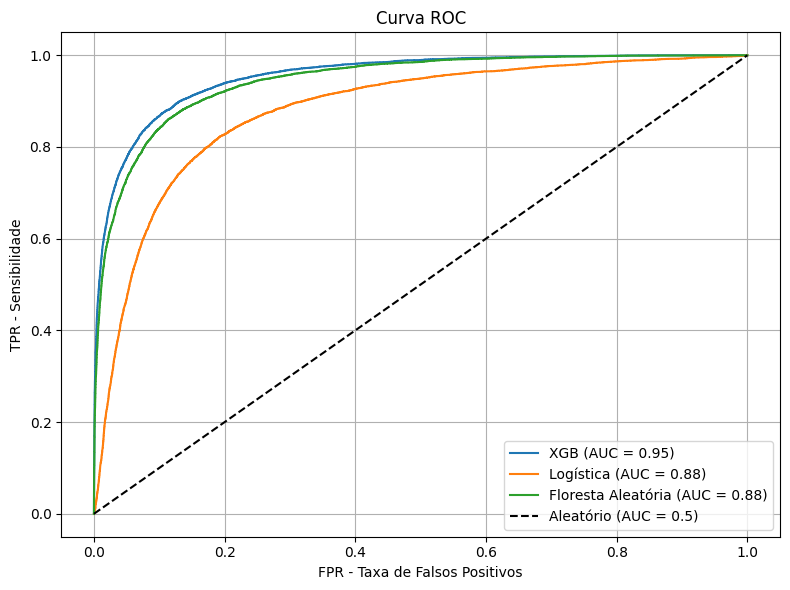

KS_XGB: 0.7693
KS_Logística: 0.6302
KS_Floresta: 0.7466


In [976]:
## Curva ROC

# Probabilidades da classe positiva (geralmente a segunda coluna [:,1])
prob_xgb = xgb_FIN.predict_proba(X_test_xgb_FIN)[:, 1]
prob_log = logistico_model_FIN.predict_proba(X_test_rl_FIN)[:, 1]
prob_fa = floresta_FIN.predict_proba(X_test_fa_FIN)[:, 1]

# Calcular pontos da curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, prob_xgb)
fpr_log, tpr_log, _ = roc_curve(y_test, prob_log)
fpr_fa, tpr_fa, _ = roc_curve(y_test, prob_fa)

# Calcular AUC
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_log = auc(fpr_log, tpr_log)
auc_fa = auc(fpr_fa, tpr_fa)

# Plot da curva ROC
plot.figure(figsize=(8, 6))
plot.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {auc_xgb:.2f})')
plot.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plot.plot(fpr_fa, tpr_fa, label=f'Floresta Aleatória (AUC = {auc_log:.2f})')
plot.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
plot.xlabel('FPR - Taxa de Falsos Positivos')
plot.ylabel('TPR - Sensibilidade')
plot.title('Curva ROC')
plot.legend(loc='lower right')
plot.grid()
plot.tight_layout()
plot.show()

# KS
ks_xgb=max(tpr_xgb-fpr_xgb)
ks_log=max(tpr_log-fpr_log)
ks_fa=max(tpr_fa-fpr_fa)
print('KS_XGB:', builtins.round(ks_xgb, 4))
print('KS_Logística:', builtins.round(ks_log, 4))
print('KS_Floresta:', builtins.round(ks_fa, 4))

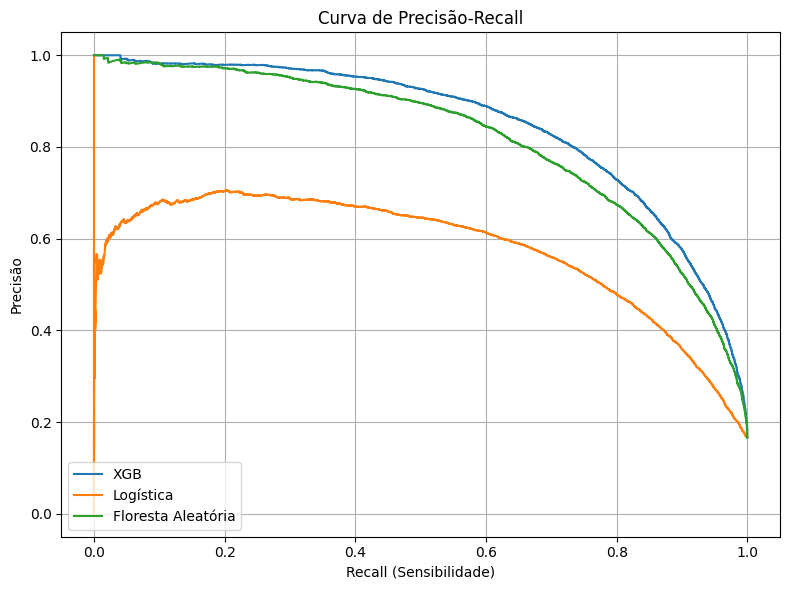

In [977]:
# Calcular pontos da curva Precision-Recall
prec_xgb, rec_xgb, ths_xgb = precision_recall_curve(y_test, prob_xgb)
prec_log, rec_log, ths_log = precision_recall_curve(y_test, prob_log)
prec_fa, rec_fa, ths_fa= precision_recall_curve(y_test, prob_fa)

# Plot da curva Precision-Recall
plot.figure(figsize=(8, 6))
plot.plot(rec_xgb, prec_xgb, label='XGB')
plot.plot(rec_log, prec_log, label='Logística')
plot.plot(rec_fa, prec_fa, label='Floresta Aleatória')
plot.xlabel('Recall (Sensibilidade)')
plot.ylabel('Precisão')
plot.title('Curva de Precisão-Recall')
plot.legend(loc='lower left')
plot.grid()
plot.tight_layout()
plot.show()

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


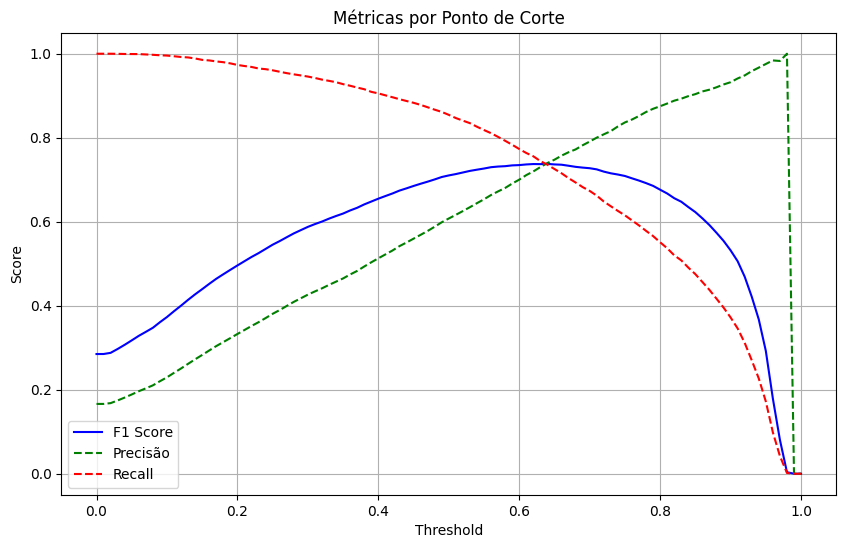

In [978]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = (prob_fa >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    
plot.figure(figsize=(10, 6))
plot.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plot.plot(thresholds, precisions, label='Precisão', linestyle='--', color='green')
plot.plot(thresholds, recalls, label='Recall', linestyle='--', color='red')
plot.xlabel('Threshold')
plot.ylabel('Score')
plot.title('Métricas por Ponto de Corte')
plot.legend()
plot.grid(True)
plot.show()

In [979]:
# Melhor threshold pelo maior F1-score
melhor_f1 = thresholds[np.argmax(f1_scores)]
print(f"Melhor ponto de corte pelo F1-score: {melhor_f1:.2f}")

Melhor ponto de corte pelo F1-score: 0.64


In [980]:
# Converter listas para arrays
thresholds = np.array(thresholds)
f1_scores = np.array(f1_scores)
recalls = np.array(recalls)

# 1. Filtrar onde recall >= 0.80
idxs_validos = np.where(recalls >= 0.80)[0]

if len(idxs_validos) > 0:
    # 2. Pegar o índice do maior F1-score entre os válidos
    idx_melhor = idxs_validos[np.argmax(f1_scores[idxs_validos])]
    melhor_threshold_recall80_FIN = thresholds[idx_melhor]
    melhor_f1 = f1_scores[idx_melhor]
    melhor_recall = recalls[idx_melhor]

    print(f"Melhor threshold com recall ≥ 80%: {melhor_threshold_recall80_FIN:.2f}")
    print(f"F1-score nesse threshold: {melhor_f1:.4f}")
    print(f"Recall nesse threshold: {melhor_recall:.4f}")
else:
    print("Nenhum threshold atinge recall ≥ 80%.") # trazer precisão

Melhor threshold com recall ≥ 80%: 0.57
F1-score nesse threshold: 0.7314
Recall nesse threshold: 0.8019


## EMPRESTIMO/FINANCIAMENTO

In [1448]:
X_test_xgb_EMP_FIN=X_test_EMP_FIN_d_select[X_final_EMP_FIN.columns]
X_test_rl_EMP_FIN=X_test_EMP_FIN_d_select[X_train_selected_EMP_FIN.columns]
X_test_fa_EMP_FIN=X_test_EMP_FIN_d_select[X_final_EMP_FIN.columns]

In [1449]:
xgb_EMP_FIN = joblib.load("xgb_EMP_FIN_4.pkl")
logistico_model_EMP_FIN = joblib.load("log_EMP_FIN_4.pkl")
floresta_EMP_FIN = joblib.load("fa_EMP_FIN_4.pkl")
previsao_xgb = xgb_EMP_FIN.predict(X_test_xgb_EMP_FIN)
previsao_logistico = logistico_model_EMP_FIN.predict(X_test_rl_EMP_FIN)
previsao_floresta= floresta_EMP_FIN.predict(X_test_fa_EMP_FIN)

In [1450]:
# Matriz de confusão
# Rótulos das classes
labels = [0, 1]
cm_xgb = confusion_matrix(y_test_EMP_FIN, previsao_xgb,labels=labels)
cm_logistico = confusion_matrix(y_test_EMP_FIN, previsao_logistico,labels=labels)
cm_floresta = confusion_matrix(y_test_EMP_FIN, previsao_floresta,labels=labels)
y_test=y_test_EMP_FIN

In [1451]:
# Matriz de confusão bonitinha
# Minimizar o Erro do tipo I: Classificar um cliente bom como ruim é maximizar a especificidade
# Minimizar o Erro do tipo II: Classificar um cliente ruim como bom é maximizar o recall/Sensibilidade

# XGB
cm_xgb_df = pd.DataFrame(cm_xgb, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_xgb_df['Total Linha'] = cm_xgb_df.sum(axis=1)
cm_xgb_df.loc['Total Coluna'] = cm_xgb_df.sum()

# Cálculo de métricas
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
especificidade_xgb = tn_xgb / (tn_xgb + fp_xgb)
vpn_xgb = tn_xgb / (tn_xgb + fn_xgb)
recall_xgb = recall_score(y_test, previsao_xgb)
media_rec_spec_xgb = np.sqrt(recall_xgb * especificidade_xgb)

# Logistica
cm_logistico_df = pd.DataFrame(cm_logistico, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_logistico_df['Total Linha'] = cm_logistico_df.sum(axis=1)
cm_logistico_df.loc['Total Coluna'] = cm_logistico_df.sum()

# Cálculo de métricas
tn_log, fp_log, fn_log, tp_log = cm_logistico.ravel()
especificidade_log = tn_log / (tn_log + fp_log)
vpn_log = tn_log / (tn_log + fn_log)
recall_log = recall_score(y_test, previsao_logistico)
media_rec_spec_log = np.sqrt(recall_log * especificidade_log)

# Floresta Aleatória
cm_floresta_df = pd.DataFrame(cm_floresta, index=[f'Real {label}' for label in labels],
                        columns=[f'Previsto {label}' for label in labels])
cm_floresta_df['Total Linha'] = cm_floresta_df.sum(axis=1)
cm_floresta_df.loc['Total Coluna'] = cm_floresta_df.sum()

# Cálculo de métricas
tn_fa, fp_fa, fn_fa, tp_fa = cm_floresta.ravel()
especificidade_fa = tn_fa / (tn_fa + fp_fa)
vpn_fa = tn_fa / (tn_fa + fn_fa)
recall_fa = recall_score(y_test, previsao_floresta)
media_rec_spec_fa = np.sqrt(recall_fa * especificidade_fa)

print("Matriz de Confusão XGB:\n", cm_xgb_df)
print("Matriz de Confusão Logística:\n", cm_logistico_df)
print("Matriz de Confusão Floresta Aleatória:\n", cm_floresta_df)

Matriz de Confusão XGB:
               Previsto 0  Previsto 1  Total Linha
Real 0             24865        5054        29919
Real 1              7138       14317        21455
Total Coluna       32003       19371        51374
Matriz de Confusão Logística:
               Previsto 0  Previsto 1  Total Linha
Real 0             23896        6023        29919
Real 1              9688       11767        21455
Total Coluna       33584       17790        51374
Matriz de Confusão Floresta Aleatória:
               Previsto 0  Previsto 1  Total Linha
Real 0             22032        7887        29919
Real 1              5405       16050        21455
Total Coluna       27437       23937        51374


In [1452]:
#print(classification_report(previsao_xgb, y_test))

In [1453]:
#print(classification_report(previsao_logistico, y_test))

In [1454]:
#print(classification_report(previsao_floresta, y_test))

In [1455]:
import builtins

# Montar um dicionário com os resultados
resultados = {
    "Modelo": ["XGB", "Logística", "Floresta"],
    "VN": [
        tn_xgb,
        tn_log,
        tn_fa
    ],
    "FP": [
        fp_xgb,
        fp_log,
        fp_fa
    ],
    "FN": [
        fn_xgb,
        fn_log,
        fn_fa
    ],
    "VP": [
        tp_xgb,
        tp_log,
        tp_fa
    ],
    "Acurácia": [
        builtins.round(accuracy_score(y_test, previsao_xgb), 4),
        builtins.round(accuracy_score(y_test, previsao_logistico), 4),
        builtins.round(accuracy_score(y_test, previsao_floresta), 4)
    ],
    "AUC": [
        builtins.round(roc_auc_score(y_test, previsao_xgb), 4),
        builtins.round(roc_auc_score(y_test, previsao_logistico), 4),
        builtins.round(roc_auc_score(y_test, previsao_floresta), 4)
    ],
    "F1-Score": [
        builtins.round(f1_score(y_test, previsao_xgb), 4),
        builtins.round(f1_score(y_test, previsao_logistico), 4),
        builtins.round(f1_score(y_test, previsao_floresta), 4)
    ],
    "Recall": [
        builtins.round(recall_xgb, 4),
        builtins.round(recall_log, 4),
        builtins.round(recall_fa, 4)
    ],
    "Especificidade": [
        builtins.round(especificidade_xgb, 4),
        builtins.round(especificidade_log, 4),
        builtins.round(especificidade_fa, 4)
    ],
    "Precisão": [
        builtins.round(precision_score(y_test, previsao_xgb), 4),
        builtins.round(precision_score(y_test, previsao_logistico), 4),
        builtins.round(precision_score(y_test, previsao_floresta), 4)
    ],
    "VPN": [
        builtins.round(vpn_xgb, 4),
        builtins.round(vpn_log, 4),
        builtins.round(vpn_fa, 4)
    ],
    "Média Recall+Especificidade": [
        builtins.round(media_rec_spec_xgb, 4),
        builtins.round(media_rec_spec_log, 4),
        builtins.round(media_rec_spec_fa, 4)
    ]
}

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar como tabela
df_resultados

Modelo     VN    FP    FN     VP  Acurácia  AUC  F1-Score  Recall  \
0        XGB  24865  5054  7138  14317      0.76 0.75      0.70    0.67   
1  Logística  23896  6023  9688  11767      0.69 0.67      0.60    0.55   
2   Floresta  22032  7887  5405  16050      0.74 0.74      0.71    0.75   

   Especificidade  Precisão  VPN  Média Recall+Especificidade  
0            0.83      0.74 0.78                         0.74  
1            0.80      0.66 0.71                         0.66  
2            0.74      0.67 0.80                         0.74

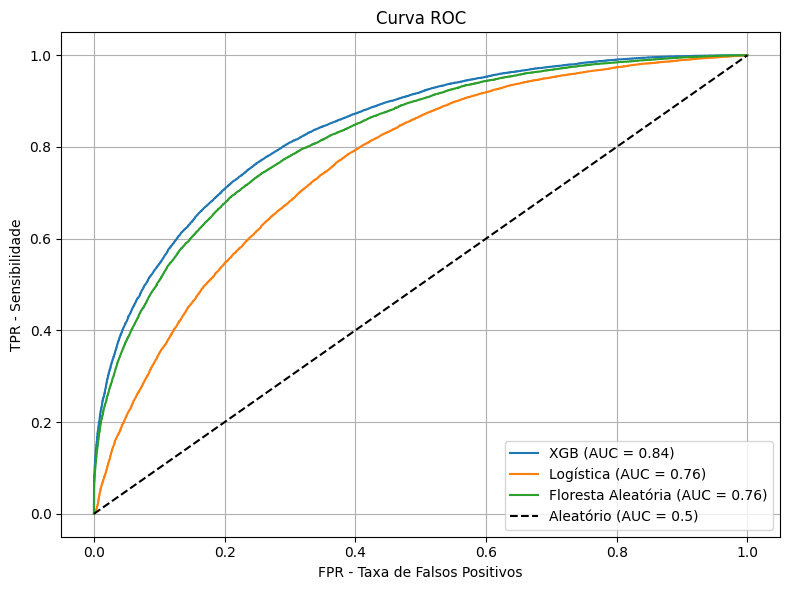

KS_XGB: 0.5156
KS_Logística: 0.3955
KS_Floresta: 0.486


In [1456]:
## Curva ROC

# Probabilidades da classe positiva (geralmente a segunda coluna [:,1])
prob_xgb = xgb_EMP_FIN.predict_proba(X_test_xgb_EMP_FIN)[:, 1]
prob_log = logistico_model_EMP_FIN.predict_proba(X_test_rl_EMP_FIN)[:, 1]
prob_fa = floresta_EMP_FIN.predict_proba(X_test_fa_EMP_FIN)[:, 1]

# Calcular pontos da curva ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, prob_xgb)
fpr_log, tpr_log, _ = roc_curve(y_test, prob_log)
fpr_fa, tpr_fa, _ = roc_curve(y_test, prob_fa)

# Calcular AUC
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_log = auc(fpr_log, tpr_log)
auc_fa = auc(fpr_fa, tpr_fa)

# Plot da curva ROC
plot.figure(figsize=(8, 6))
plot.plot(fpr_xgb, tpr_xgb, label=f'XGB (AUC = {auc_xgb:.2f})')
plot.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')
plot.plot(fpr_fa, tpr_fa, label=f'Floresta Aleatória (AUC = {auc_log:.2f})')
plot.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)')
plot.xlabel('FPR - Taxa de Falsos Positivos')
plot.ylabel('TPR - Sensibilidade')
plot.title('Curva ROC')
plot.legend(loc='lower right')
plot.grid()
plot.tight_layout()
plot.show()

# KS
ks_xgb=max(tpr_xgb-fpr_xgb)
ks_log=max(tpr_log-fpr_log)
ks_fa=max(tpr_fa-fpr_fa)
print('KS_XGB:', builtins.round(ks_xgb, 4))
print('KS_Logística:', builtins.round(ks_log, 4))
print('KS_Floresta:', builtins.round(ks_fa, 4))

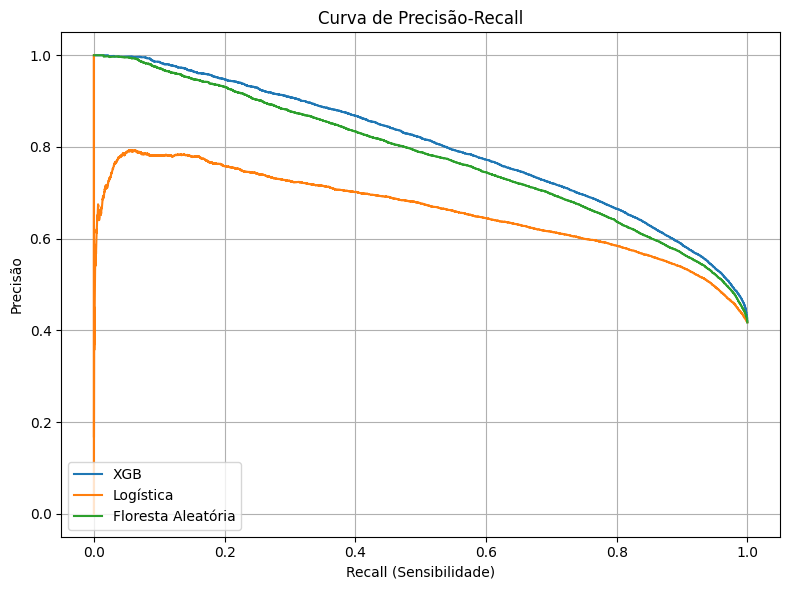

In [1457]:
# Calcular pontos da curva Precision-Recall
prec_xgb, rec_xgb, ths_xgb = precision_recall_curve(y_test, prob_xgb)
prec_log, rec_log, ths_log = precision_recall_curve(y_test, prob_log)
prec_fa, rec_fa, ths_fa= precision_recall_curve(y_test, prob_fa)

# Plot da curva Precision-Recall
plot.figure(figsize=(8, 6))
plot.plot(rec_xgb, prec_xgb, label='XGB')
plot.plot(rec_log, prec_log, label='Logística')
plot.plot(rec_fa, prec_fa, label='Floresta Aleatória')
plot.xlabel('Recall (Sensibilidade)')
plot.ylabel('Precisão')
plot.title('Curva de Precisão-Recall')
plot.legend(loc='lower left')
plot.grid()
plot.tight_layout()
plot.show()

c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\fernando.monteiro\deep-torch-example\KAB\Behavior_KAB\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

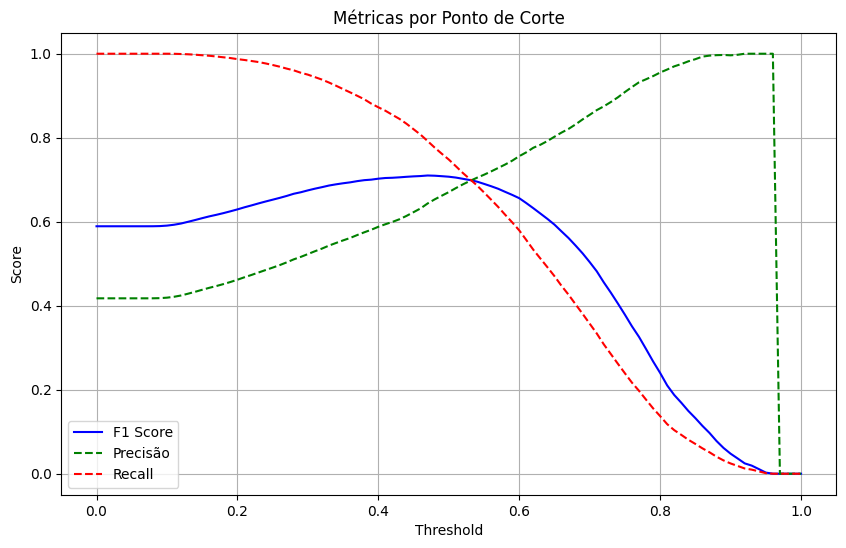

In [1458]:
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []

for t in thresholds:
    preds = (prob_fa >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))
    
plot.figure(figsize=(10, 6))
plot.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plot.plot(thresholds, precisions, label='Precisão', linestyle='--', color='green')
plot.plot(thresholds, recalls, label='Recall', linestyle='--', color='red')
plot.xlabel('Threshold')
plot.ylabel('Score')
plot.title('Métricas por Ponto de Corte')
plot.legend()
plot.grid(True)
plot.show()

In [1459]:
# Melhor threshold pelo maior F1-score
melhor_f1 = thresholds[np.argmax(f1_scores)]
print(f"Melhor ponto de corte pelo F1-score: {melhor_f1:.2f}")

Melhor ponto de corte pelo F1-score: 0.47


In [1460]:
# Converter listas para arrays
thresholds = np.array(thresholds)
f1_scores = np.array(f1_scores)
recalls = np.array(recalls)

# 1. Filtrar onde recall >= 0.80
idxs_validos = np.where(recalls >= 0.80)[0]

if len(idxs_validos) > 0:
    # 2. Pegar o índice do maior F1-score entre os válidos
    idx_melhor = idxs_validos[np.argmax(f1_scores[idxs_validos])]
    melhor_threshold_recall80_EMP_FIN = thresholds[idx_melhor]
    melhor_f1 = f1_scores[idx_melhor]
    melhor_recall = recalls[idx_melhor]

    print(f"Melhor threshold com recall ≥ 80%: {melhor_threshold_recall80_EMP_FIN:.2f}")
    print(f"F1-score nesse threshold: {melhor_f1:.4f}")
    print(f"Recall nesse threshold: {melhor_recall:.4f}")
else:
    print("Nenhum threshold atinge recall ≥ 80%.") # trazer precisão

Melhor threshold com recall ≥ 80%: 0.46
F1-score nesse threshold: 0.7088
Recall nesse threshold: 0.8072


# Pontuação Treino 

In [ ]:
# FINANCIAMENTO
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob_FIN = floresta_FIN.predict_proba(X_final_FIN)[:, 1]
X_train_comp_FIN = pd.DataFrame()
X_train_comp_FIN["id_cliente"] = ids_train_FIN.values
X_train_comp_FIN["PD"] = prob_FIN
X_train_comp_FIN["inad_e_reneg_prev"] = np.where(
    (X_train_comp_FIN["PD"] > melhor_threshold_recall80_FIN),
    1, 0
)
X_train_comp_FIN["Modelo"] = "FIN_Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_train_comp_FIN['rotulo_predito_base'] = floresta_FIN.predict(X_final_FIN)

# EMPRESTIMO E FINANCIAMENTO
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob_EMP_FIN = floresta_EMP_FIN.predict_proba(X_final_EMP_FIN)[:, 1]
X_train_comp_EMP_FIN = pd.DataFrame()
X_train_comp_EMP_FIN["id_cliente"] = ids_train_EMP_FIN.values
X_train_comp_EMP_FIN["PD"] = prob_EMP_FIN
X_train_comp_EMP_FIN["inad_e_reneg_prev"] = np.where(
    (X_train_comp_EMP_FIN["PD"] > melhor_threshold_recall80_EMP_FIN),
    1, 0
)
X_train_comp_EMP_FIN["Modelo"] = "EMP_FIN_Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_train_comp_EMP_FIN['rotulo_predito_base'] = floresta_EMP_FIN.predict(X_final_EMP_FIN)

In [ ]:
data_train_prev=pd.concat([X_train_comp_FIN,X_train_comp_EMP_FIN])

In [ ]:
data_train_prev=data_train_prev.rename(columns={"id_cliente":"cpf_cnpj"})

In [ ]:
relatorio_prob_inad_train=X_train.merge(data_train_prev,on="cpf_cnpj")

In [ ]:
relatorio_prob_inad_train.sample(5)

sexo  idade estado_civil nacionalidade  \
140121    F     24       CASADO    BRASILEIRO   
121318    F     66       CASADO    BRASILEIRO   
44661     F     70     SOLTEIRO    BRASILEIRO   
136378    M     49       CASADO    BRASILEIRO   
65285     F     53       CASADO    BRASILEIRO   

        tempo_relacionamento_kredilig_meses canal_origem  \
140121                                38.13      Digital   
121318                                79.20       Fisico   
44661                                100.67       Fisico   
136378                                99.10       Fisico   
65285                                 93.90       Fisico   

        media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
140121                                   2.93                              0   
121318                                   0.00                              0   
44661                                    0.00                              0   
136378                                   0.00                              0   
65285                                    2.34                              1   

        principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
140121                  3388.05                  48                   15.40   
121318                 12812.38                  72                    0.47   
44661                      0.00                  13                    0.90   
136378                     0.00                   9                    0.47   
65285                    820.86                 112                   17.47   

        meses_entre_primeiro_e_ultimo_pagamento  \
140121                                    18.87   
121318                                    35.80   
44661                                     13.37   
136378                                     7.63   
65285                                     23.63   

        meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
140121                                     34.27        2008.40   
121318                                     36.27           0.00   
44661                                      14.27        2270.00   
136378                                      8.10        1913.85   
65285                                      41.10        7456.59   

        valor_principal_total_nr  FIN_valor_medio_entrada_nr  \
140121                   2008.40                        0.00   
121318                      0.00                        0.00   
44661                    2052.66                        0.00   
136378                   2148.99                        0.00   
65285                    7560.00                        0.00   

        renda_valida_new                  produtos  qtd_total_fechado_a_vista  \
140121           1709.87  EMPRESTIMO/FINANCIAMENTO                          0   
121318           2129.00                EMPRESTIMO                          0   
44661            1525.00             FINANCIAMENTO                          0   
136378           2132.35             FINANCIAMENTO                          0   
65285            1558.70                EMPRESTIMO                          0   

        mean_dias_maior_atraso  qtd_contratos  limite_total_primeiro_mes  \
140121                   22.26              5                    2070.00   
121318                    7.00              4                    9440.00   
44661                     0.00              1                    7200.00   
136378                    0.00              1                    9168.00   
65285                     4.86             15                   13000.00   

        limite_total_ultimo_mes                    ocupacao  \
140121                  2070.00  EMPREGADO_PRIVADO_AUTONOMO   
121318                  9440.00                  APOSENTADO   
44661                  11040.00                  APOSENTADO   
136378                  9168.00  EMPREGADO_PRIVADO_AUTONOMO   
65285                  13000.00  EMPREGAD

In [ ]:
pd.crosstab(
    relatorio_prob_inad_train["inad_e_reneg"],
    relatorio_prob_inad_train["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real           0      1     All
Previsto                       
0         134429  30108  164537
1          10648  58821   69469
All       145077  88929  234006

# Pontuação Teste

In [ ]:
# FINANCIAMENTO
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob_FIN_test = floresta_FIN.predict_proba(X_test_fa_FIN)[:, 1]
X_test_comp_FIN = pd.DataFrame()
X_test_comp_FIN["id_cliente"] = ids_test_FIN.values
X_test_comp_FIN["PD"] = prob_FIN_test
X_test_comp_FIN["inad_e_reneg_prev"] = np.where(
    (X_test_comp_FIN["PD"] > melhor_threshold_recall80_FIN),
    1, 0
)
X_test_comp_FIN["Modelo"] = "FIN_Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_test_comp_FIN['rotulo_predito_base'] = floresta_FIN.predict(X_test_fa_FIN)

# EMPRESTIMO E FINANCIAMENTO
#prob = xgb.predict_proba(X_final_xgb)[:, 1]
prob_EMP_FIN_test = floresta_EMP_FIN.predict_proba(X_test_fa_EMP_FIN)[:, 1]
X_test_comp_EMP_FIN = pd.DataFrame()
X_test_comp_EMP_FIN["id_cliente"] = ids_test_EMP_FIN.values
X_test_comp_EMP_FIN["PD"] = prob_EMP_FIN_test
X_test_comp_EMP_FIN["inad_e_reneg_prev"] = np.where(
    (X_test_comp_EMP_FIN["PD"] > melhor_threshold_recall80_EMP_FIN),
    1, 0
)
X_test_comp_EMP_FIN["Modelo"] = "EMP_FIN_Floresta"
#X_train_comp['rotulo_predito_base'] = xgb.predict(X_final_xgb)
X_test_comp_EMP_FIN['rotulo_predito_base'] = floresta_EMP_FIN.predict(X_test_fa_EMP_FIN)

In [ ]:
data_test_prev=pd.concat([X_test_comp_FIN,X_test_comp_EMP_FIN])

In [ ]:
data_test_prev=data_test_prev.rename(columns={"id_cliente":"cpf_cnpj"})

In [ ]:
relatorio_prob_inad_test=X_test.merge(data_test_prev,on="cpf_cnpj")

In [ ]:
relatorio_prob_inad_test.sample(5)

sexo  idade estado_civil nacionalidade  \
39104    M     54       CASADO    BRASILEIRO   
69198    F     88   DIVORCIADO    BRASILEIRO   
62370    F     63   DIVORCIADO    BRASILEIRO   
70948    M     21     SOLTEIRO    BRASILEIRO   
1135     M     55       CASADO    BRASILEIRO   

       tempo_relacionamento_kredilig_meses canal_origem  \
39104                               115.30       Fisico   
69198                                88.23       Fisico   
62370                                91.17       Fisico   
70948                                36.23       Fisico   
1135                                 37.10       Fisico   

       media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
39104                                   0.00                              0   
69198                                   3.11                              9   
62370                                   3.55                              9   
70948                                   0.00                              1   
1135                                    3.64                              4   

       principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
39104                   351.86                   1                   35.50   
69198                 12262.21                 109                    1.73   
62370                  6303.13                 150                    3.77   
70948                  2322.00                  18                   18.03   
1135                   1986.01                  14                   23.07   

       meses_entre_primeiro_e_ultimo_pagamento  \
39104                                     0.00   
69198                                    33.77   
62370                                    37.10   
70948                                    18.20   
1135                                     14.03   

       meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
39104                                     35.50           0.00   
69198                                     35.50       29624.91   
62370                                     40.87       18430.31   
70948                                     36.23        2322.00   
1135                                      37.10        1985.98   

       valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
39104                      0.00                        0.00           1484.00   
69198                  25365.84                        0.00           2480.41   
62370                   9483.26                        0.00           1730.00   
70948                   2322.00                        0.00           1484.00   
1135                    1986.01                        0.00           1927.00   

                       produtos  qtd_total_fechado_a_vista  \
39104                EMPRESTIMO                          0   
69198  EMPRESTIMO/FINANCIAMENTO                          0   
62370  EMPRESTIMO/FINANCIAMENTO                          0   
70948             FINANCIAMENTO                          0   
1135              FINANCIAMENTO                          0   

       mean_dias_maior_atraso  qtd_contratos  limite_total_primeiro_mes  \
39104                    0.00              1                      12.95   
69198                    6.04             12                   17010.00   
62370                   15.24             10                   12800.00   
70948                    7.00              1                    3510.00   
1135                     1.24              4                   12000.00   

       limite_total_ultimo_mes                    ocupacao  \
39104                  2069.75  EMPREGADO_PRIVADO_AUTONOMO   
69198                 24360.00                  APOSENTADO   
62370                 19786.00  EMPREGADO_PRIVADO_AUTONOMO   
70948                  4290.00  EMPREGADO_PRIVADO_AUTONOMO   
1135                   6375.00  EMPREGADO_PRIVADO_AUTONOMO   

      grau_escolaridade_cat         

In [ ]:
pd.crosstab(
    relatorio_prob_inad_test["inad_e_reneg"],
    relatorio_prob_inad_test["inad_e_reneg_prev"],
    colnames=["Real"],
    rownames=["Previsto"],
    margins=True,
    #normalize='index'  # ou 'columns' ou 'all' # porcentagem
)
#trazer os valores shap

Real          0      1     All
Previsto                      
0         55688  15018   70706
1          5663  23920   29583
All       61351  38938  100289

# SHapley Additive exPlanations

## FINANCIAMENTO

### CPF específico

In [ ]:
df_treino_FIN=X_final_FIN.copy()
df_treino_FIN["id"]= ids_train_FIN.values
amostra_FIN=df_treino_FIN.sample(500, random_state=2025)
cpfs_FIN = amostra_FIN["id"]
amostra_FIN.drop(columns=["id"], inplace=True)

In [ ]:
# Shap
shap.initjs()
# Objeto explainer - XGBoost:TreeExplainer, Floresta Aleatoria:Explainer, Regressão Logística: LinearExplainer
explainer = shap.TreeExplainer(floresta_FIN)
# Calcular os valores SHAP no conjunto de treino
shap_values_FIN = explainer(amostra_FIN)


In [ ]:
for i_shap, col in enumerate(shap_values_FIN.feature_names):
    if col in num_cols:
        i_scaler = num_cols.index(col)  # posição da variável no scaler
        shap_values_FIN.data[:, i_shap] = (
            shap_values_FIN.data[:, i_shap] * scaler_FIN.scale_[i_scaler] + scaler_FIN.mean_[i_scaler]
        )

In [ ]:
# cpfs
cpfs_FIN = cpfs_FIN.values

In [ ]:
# Associa os shap values aos CPFs
shap_df_FIN = pd.DataFrame(shap_values_FIN.values[:, :, 1], index=cpfs, columns=amostra_FIN.columns)

In [ ]:
shap_df_FIN.head()

idade  media_meses_entre_contratos_combinado  \
10766590984.00   0.07                                   0.01   
80144925958.00  -0.04                                  -0.02   
63622925370.00   0.07                                   0.02   
54217911904.00  -0.05                                   0.01   
348962959.00     0.01                                  -0.03   

                meses_ultimo_pagamento  \
10766590984.00                    0.06   
80144925958.00                    0.09   
63622925370.00                    0.04   
54217911904.00                    0.04   
348962959.00                     -0.24   

                meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
10766590984.00                                     0.09           0.16   
80144925958.00                                    -0.06          -0.08   
63622925370.00                                     0.09           0.08   
54217911904.00                                    -0.09          -0.11   
348962959.00                                      -0.06          -0.07   

                renda_valida_new  mean_dias_maior_atraso  qtd_contratos  \
10766590984.00             -0.02                   -0.03           0.00   
80144925958.00             -0.14                    0.05          -0.00   
63622925370.00             -0.03                    0.05          -0.00   
54217911904.00             -0.10                   -0.05          -0.00   
348962959.00               -0.00                   -0.04          -0.00   

                sexo_M  estado_civil_DIVORCIADO  estado_civil_SOLTEIRO  \
10766590984.00   -0.00                    -0.01                  -0.00   
80144925958.00   -0.00                    -0.01                  -0.00   
63622925370.00   -0.01                    -0.01                  -0.00   
54217911904.00    0.00                    -0.01                  -0.00   
348962959.00     -0.00                    -0.00                  -0.00   

                estado_civil_UNIAO ESTAVEL  estado_civil_VIUVO  \
10766590984.00                        0.00                0.04   
80144925958.00                        0.00                0.04   
63622925370.00                        0.00                0.03   
54217911904.00                        0.00                0.04   
348962959.00                         -0.00                0.01   

                canal_origem_Fisico  ocupacao_EMPREGADO_PRIVADO_AUTONOMO  \
10766590984.00                -0.02                                -0.00   
80144925958.00                 0.01                                 0.00   
63622925370.00                 0.01                                 0.00   
54217911904.00                 0.00                                 0.00   
348962959.00                   0.00                                -0.00   

                ocupacao_OUTROS  ocupacao_RENDA_PASSIVA_PENSAO  \
10766590984.00             0.00                           0.00   
80144925958.00            -0.00                           0.00   
63622925370.00            -0.00                           0.00   
54217911904.00            -0.00                           0.00   
348962959.00              -0.00                           0.00   

                ocupacao_SERVIDOR_PUBLICO  grau_escolaridade_cat_ENSINO_MEDIO  \
10766590984.00                      -0.01                               -0.01   
80144925958.00                       0.00                               -0.00   
63622925370.00                      -0.01                               -0.00   
54217911904.00                      -0.00                               -0.00   
348962959.00                        -0.00                               -0.00   

                grau_escolaridade_cat_TECNICO_SUPERIOR  \
10766590984.00                                   -0.00   
80144925958.00                                   -0.00   
63622925370.00                                   -0.00   
54217911904.00                                   -0.00   
348962959

In [ ]:
# CPF específico
cpf_especifico = 10766590984 #ids_train.values[1]
shap_cliente = shap_df_FIN.loc[cpf_especifico]
i = shap_df_FIN.index.get_loc(cpf_especifico)
exp = shap_values_FIN[i]
i

0

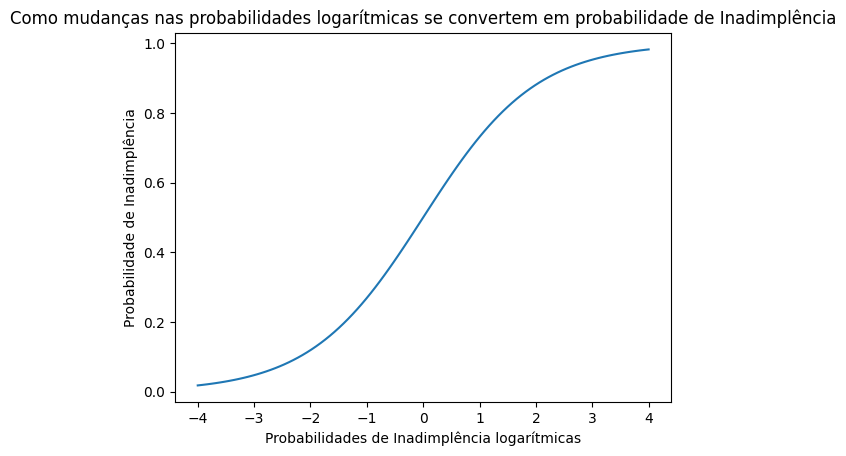

In [ ]:
xs = np.linspace(-4,4 ,100)
plot.xlabel("Probabilidades de Inadimplência logarítmicas")
plot.ylabel("Probabilidade de Inadimplência")
plot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")
plot.plot(xs,1/(1+np.exp(-xs)))
plot.show()

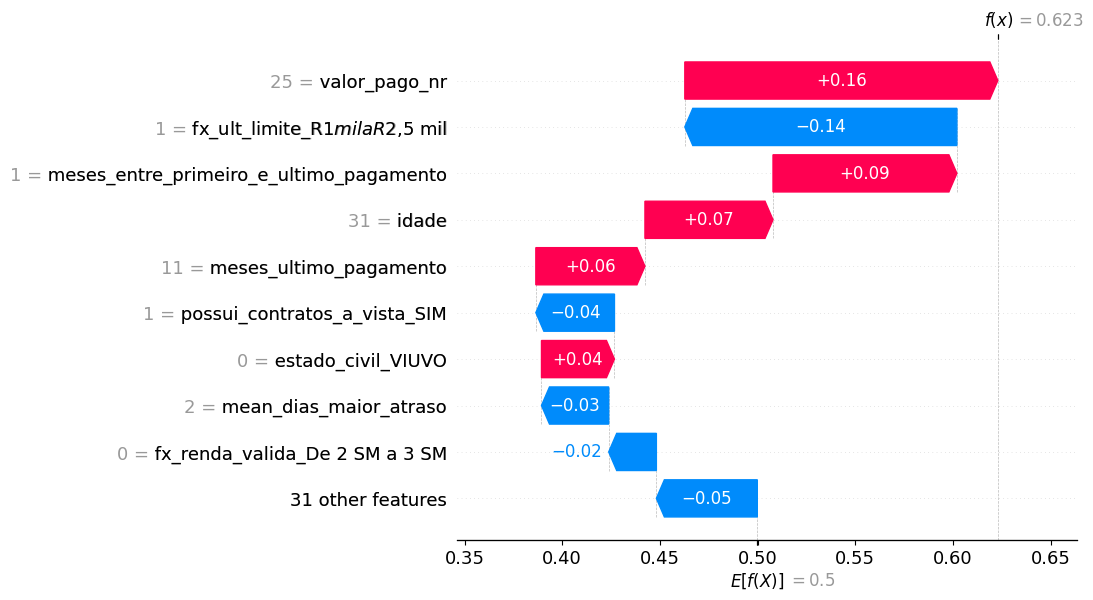

Probabilidade prevista: 62.25%


In [ ]:
shap.plots.waterfall(shap_values_FIN[i, :, 1])

fx = exp.base_values + exp.values.sum()
prob = expit(fx)

print(f"Probabilidade prevista: {prob[0]:.2%}")

In [ ]:
relatorio_prob_inad_train[relatorio_prob_inad_train["cpf_cnpj"] == cpf_especifico]

sexo  idade estado_civil nacionalidade  \
16629    M     31       CASADO    BRASILEIRO   

       tempo_relacionamento_kredilig_meses canal_origem  \
16629                                12.67      Digital   

       media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
16629                                   0.66                              1   

       principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
16629                    25.00                   1                   11.47   

       meses_entre_primeiro_e_ultimo_pagamento  \
16629                                     1.20   

       meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
16629                                     12.67          25.00   

       valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
16629                     95.00                        0.00           2088.00   

            produtos  qtd_total_fechado_a_vista  mean_dias_maior_atraso  \
16629  FINANCIAMENTO                          1                    2.92   

       qtd_contratos  limite_total_primeiro_mes  limite_total_ultimo_mes  \
16629              4                    1716.00                  1716.00   

      ocupacao grau_escolaridade_cat           regiao  \
16629   OUTROS          ENSINO_MEDIO  Sul_Catarinense   

        tipo_cal_entre_contratos possui_contratos_a_vista tipo_valor_entrada  \
16629  Contratos_dias_diferentes                      SIM     N_Paga_entrada   

      mean_atraso_possui_info       cpf_cnpj  inad_e_reneg  \
16629                     SIM 10766590984.00             1   

           fx_renda_valida        fx_ult_limite Cluster   PD  \
16629  De 1,25 SM a 1,5 SM  R$1 mil a R$2,5 mil       4 0.96   

       inad_e_reneg_prev        Modelo  rotulo_predito_base     Z    SCR  \
16629                  1  FIN_Floresta                    1 -3.11 330.81   

                   fx_SCR           fx_PD  
16629  (186.966, 408.375]  (0.777, 0.994]

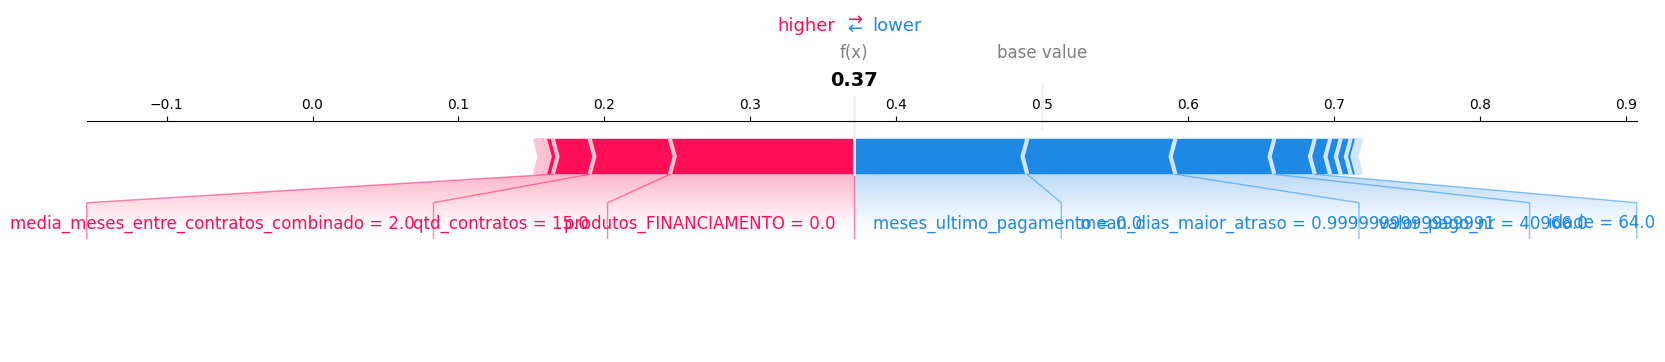

In [ ]:
shap.plots.force(shap_values[i, :, 1],matplotlib=True)

### Estudo das Variáveis

In [ ]:
#plot.style.use('default')  # fundo branco
#shap.plots.force(shap_values[:500])

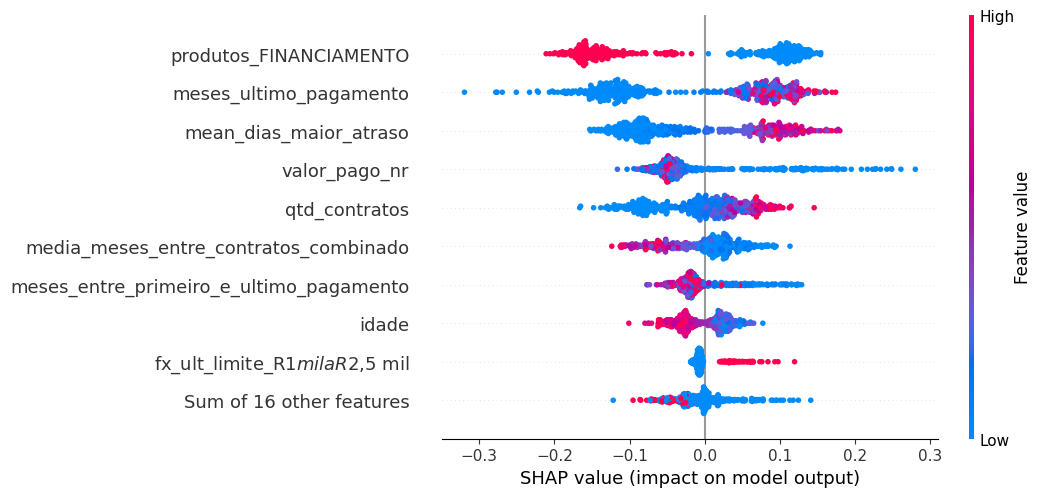

In [ ]:
# Seleciona apenas os shap values da classe 1
shap_beeswarm = shap.Explanation(
    values=shap_values.values[:, :, 1],          # só a classe positiva
    base_values=shap_values.base_values[:, 1],   # idem
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora o beeswarm funciona
shap.plots.beeswarm(shap_beeswarm)

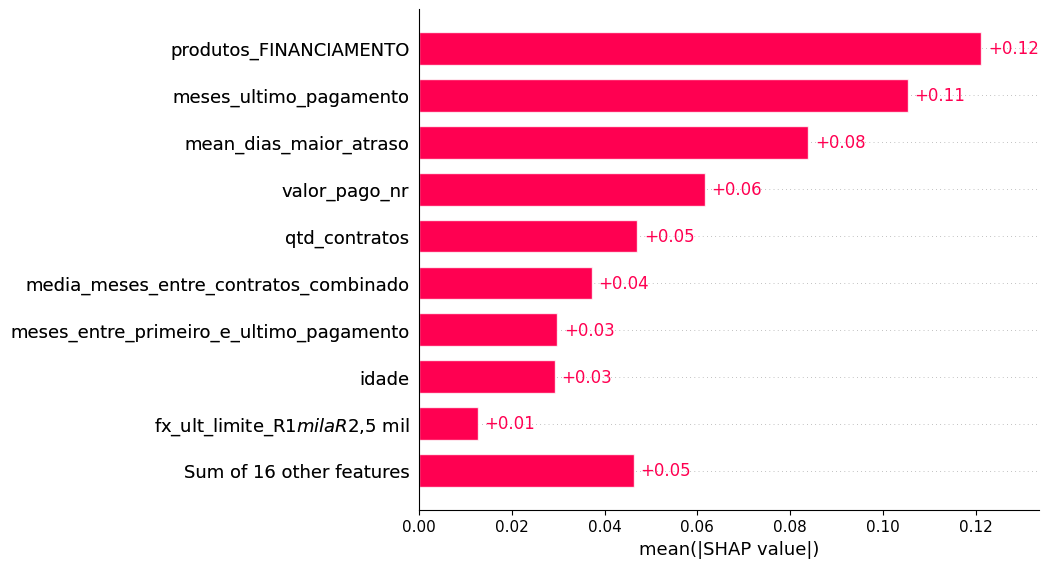

In [ ]:
# Reduz shap_values para só a classe positiva
shap_bar = shap.Explanation(
    values=shap_values.values[:, :, 1],          # shap da classe 1
    base_values=shap_values.base_values[:, 1],   # base da classe 1
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora roda o bar plot
shap.plots.bar(shap_bar)

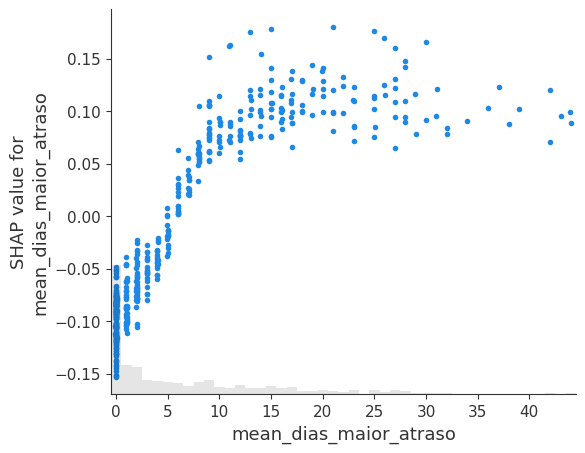

In [ ]:
['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']

shap_values_class1 = shap.Explanation(
    values=shap_values.values[:, :, 1],
    base_values=shap_values.base_values[:, 1],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

feature_name = "mean_dias_maior_atraso"
feature_index = X_final_xgb.columns.get_loc(feature_name)
shap.plots.scatter(shap_values_class1[:, feature_index])

## EMPRESTIMO/FINANCIMENTO

### CPF específico

In [ ]:
df_treino=X_final_EMP_FIN.copy()
df_treino["id"]= ids_train_EMP_FIN.values
amostra=df_treino.sample(500, random_state=2025)
cpfs = amostra["id"]
amostra.drop(columns=["id"], inplace=True)

In [ ]:
# Shap
shap.initjs()
# Objeto explainer - XGBoost:TreeExplainer, Floresta Aleatoria:Explainer, Regressão Logística: LinearExplainer
explainer = shap.TreeExplainer(floresta_EMP_FIN)
# Calcular os valores SHAP no conjunto de treino
shap_values = explainer(amostra)


In [ ]:
for i_shap, col in enumerate(shap_values.feature_names):
    if col in num_cols:
        i_scaler = num_cols.index(col)  # posição da variável no scaler
        shap_values.data[:, i_shap] = (
            shap_values.data[:, i_shap] * scaler_EMP_FIN.scale_[i_scaler] + scaler_EMP_FIN.mean_[i_scaler]
        )

In [ ]:
# cpfs
cpfs = cpfs.values

In [ ]:
amostra.columns

Index(['idade', 'media_meses_entre_contratos_combinado',
       'meses_ultimo_pagamento', 'meses_entre_primeiro_e_ultimo_pagamento',
       'valor_pago_nr', 'mean_dias_maior_atraso', 'qtd_contratos', 'sexo_M',
       'estado_civil_VIUVO', 'canal_origem_Fisico', 'produtos_FINANCIAMENTO',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana', 'regiao_Sul_Catarinense',
       'regiao_Vale_do_Itajaí', 'possui_contratos_a_vista_SIM',
       'tipo_valor_entrada_Paga_entrada', 'fx_ult_limite_Até R$1 mil',
       'fx_ult_limite_R$1 mil a R$2,5 mil', 'fx_ult_limite_R$10 mil a R$15mil',
       'fx_ult_limite_R$15 mil a R$20mil', 'fx_ult_limite_R$2,5 mil a R$5 mil',
       'fx_ult_limite_R$7,5 mil a R$10mil'],
      dtype='object')

In [ ]:
# Associa os shap values aos CPFs
shap_df = pd.DataFrame(shap_values.values[:, :, 1], index=cpfs, columns=amostra.columns)

In [ ]:
shap_df.head(5)

idade  media_meses_entre_contratos_combinado  \
39833666949.00  -0.03                                   0.03   
4978521955.00    0.02                                   0.07   
13288487950.00   0.08                                   0.01   
75779471991.00  -0.02                                   0.03   
72037393920.00  -0.06                                  -0.04   

                meses_ultimo_pagamento  \
39833666949.00                   -0.12   
4978521955.00                    -0.04   
13288487950.00                    0.08   
75779471991.00                   -0.22   
72037393920.00                    0.08   

                meses_entre_primeiro_e_ultimo_pagamento  valor_pago_nr  \
39833666949.00                                    -0.01          -0.07   
4978521955.00                                     -0.00           0.24   
13288487950.00                                     0.04           0.12   
75779471991.00                                     0.02           0.14   
72037393920.00                                    -0.01          -0.04   

                mean_dias_maior_atraso  qtd_contratos  sexo_M  \
39833666949.00                   -0.10           0.06    0.00   
4978521955.00                    -0.03          -0.07   -0.00   
13288487950.00                   -0.12          -0.08    0.00   
75779471991.00                   -0.08          -0.06   -0.00   
72037393920.00                   -0.11          -0.01    0.00   

                estado_civil_VIUVO  canal_origem_Fisico  \
39833666949.00                0.00                -0.00   
4978521955.00                 0.00                 0.00   
13288487950.00                0.00                -0.01   
75779471991.00                0.00                -0.01   
72037393920.00                0.00                -0.01   

                produtos_FINANCIAMENTO  regiao_Grande_Florianópolis  \
39833666949.00                    0.13                         0.00   
4978521955.00                     0.12                         0.00   
13288487950.00                   -0.13                         0.00   
75779471991.00                   -0.15                         0.00   
72037393920.00                   -0.16                         0.00   

                regiao_Norte_Catarinense  regiao_Oeste_Catarinense  \
39833666949.00                      0.00                     -0.00   
4978521955.00                       0.00                      0.00   
13288487950.00                      0.00                      0.00   
75779471991.00                      0.00                     -0.00   
72037393920.00                     -0.00                     -0.00   

                regiao_Serrana  regiao_Sul_Catarinense  regiao_Vale_do_Itajaí  \
39833666949.00           -0.00                   -0.00                  -0.00   
4978521955.00             0.00                    0.00                  -0.00   
13288487950.00           -0.00                    0.00                  -0.00   
75779471991.00           -0.00                    0.00                  -0.00   
72037393920.00           -0.00                    0.00                  -0.00   

                possui_contratos_a_vista_SIM  tipo_valor_entrada_Paga_entrada  \
39833666949.00                         -0.00                             0.01   
4978521955.00                           0.00                             0.00   
13288487950.00                          0.00                             0.00   
75779471991.00                          0.00                             0.00   
72037393920.00                         -0.00                            -0.01   

                fx_ult_limite_Até R$1 mil  fx_ult_limite_R$1 mil a R$2,5 mil  \
39833666949.00                      -0.00                              -0.01   
4978521955.00                       -0.00                              -0.00   
13288487950.00                      -0.01                              -0.01   
75779471991.00                      -0.01    

In [ ]:
# CPF específico
cpf_especifico = 39833666949 #ids_train.values[1]
shap_cliente = shap_df.loc[cpf_especifico]
i = shap_df.index.get_loc(cpf_especifico)
exp = shap_values[i]
i

0

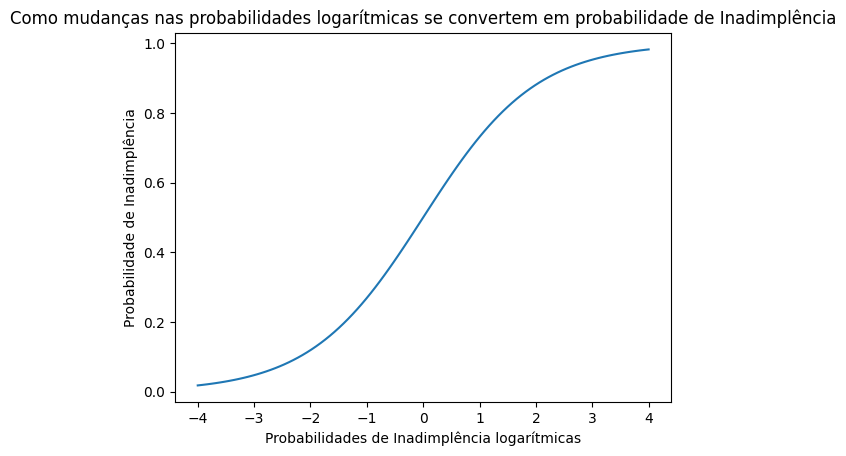

In [ ]:
xs = np.linspace(-4,4 ,100)
plot.xlabel("Probabilidades de Inadimplência logarítmicas")
plot.ylabel("Probabilidade de Inadimplência")
plot.title("Como mudanças nas probabilidades logarítmicas se convertem em probabilidade de Inadimplência")
plot.plot(xs,1/(1+np.exp(-xs)))
plot.show()

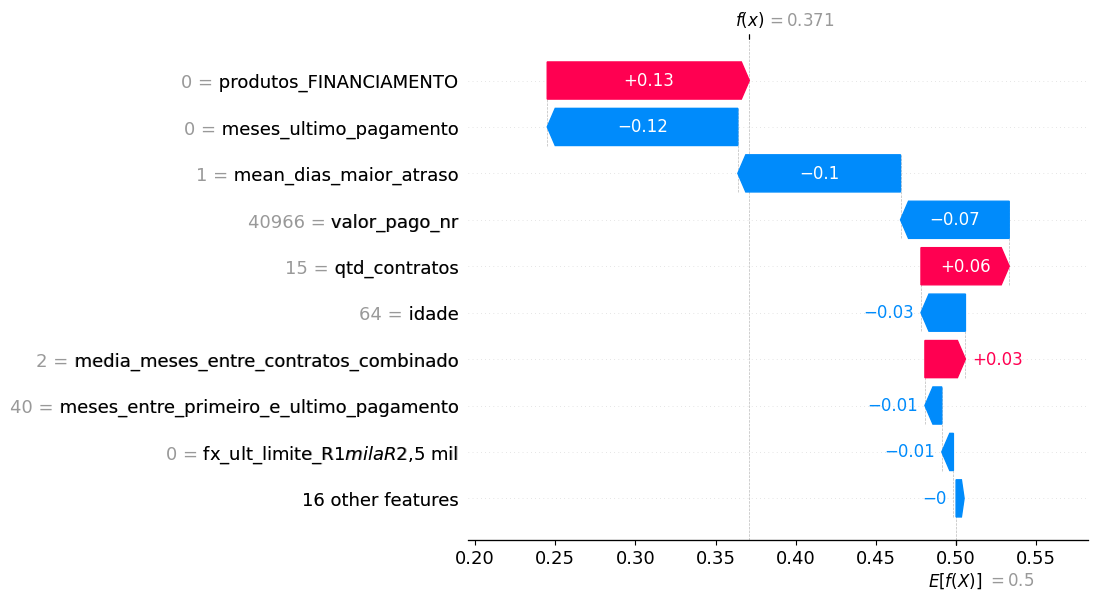

Probabilidade prevista: 62.25%


In [ ]:
shap.plots.waterfall(shap_values[i, :, 1])

fx = exp.base_values + exp.values.sum()
prob = expit(fx)

print(f"Probabilidade prevista: {prob[0]:.2%}")

In [ ]:
relatorio_prob_inad_train[relatorio_prob_inad_train["id_cliente"] == cpf_especifico]

id_cliente  idade  media_meses_entre_contratos_combinado  \
213442 39833666949.00     64                                      2   

        meses_ultimo_pagamento  meses_entre_primeiro_e_ultimo_pagamento  \
213442                       0                                       40   

        valor_pago_nr  mean_dias_maior_atraso  qtd_contratos  sexo_M  \
213442          40966                       1             15       1   

        estado_civil_VIUVO  canal_origem_Fisico  produtos_FINANCIAMENTO  \
213442                   0                    1                       0   

        regiao_Grande_Florianópolis  regiao_Norte_Catarinense  \
213442                            0                         0   

        regiao_Oeste_Catarinense  regiao_Serrana  regiao_Sul_Catarinense  \
213442                         0               0                       1   

        regiao_Vale_do_Itajaí  possui_contratos_a_vista_SIM  \
213442                      0                             0   

        tipo_valor_entrada_Paga_entrada  fx_ult_limite_Até R$1 mil  \
213442                                0                          0   

        fx_ult_limite_R$1 mil a R$2,5 mil  fx_ult_limite_R$10 mil a R$15mil  \
213442                                  0                                 0   

        fx_ult_limite_R$15 mil a R$20mil  fx_ult_limite_R$2,5 mil a R$5 mil  \
213442                                 0                                  0   

        fx_ult_limite_R$7,5 mil a R$10mil  prob_inadimplencia  \
213442                                  0                0.37   

        inad_e_reneg_prev  inad_reneg_real  rotulo_predito_base  
213442                  0                0                    0

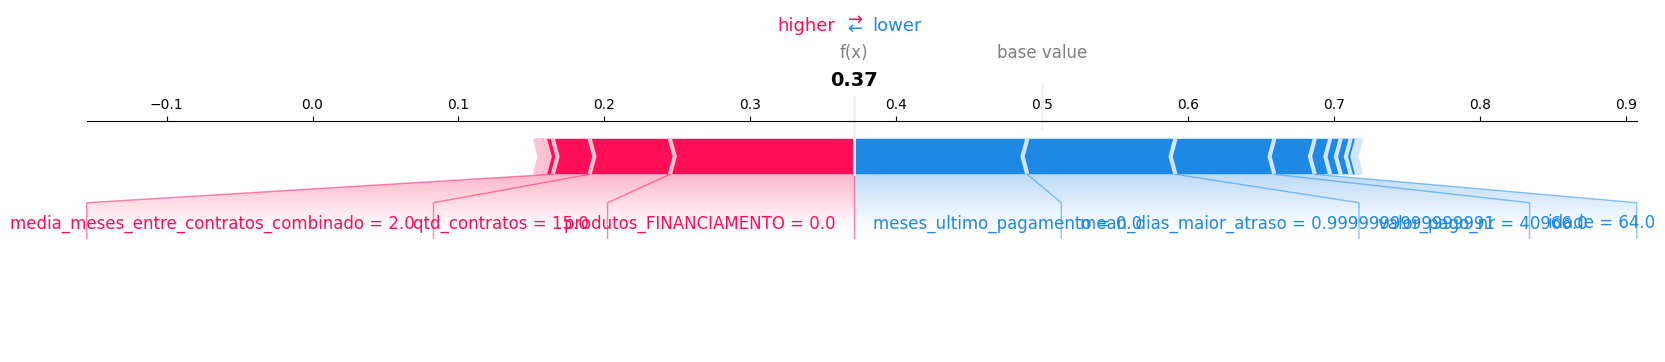

In [ ]:
shap.plots.force(shap_values[i, :, 1],matplotlib=True)

### Estudo das Variáveis

In [ ]:
#plot.style.use('default')  # fundo branco
#shap.plots.force(shap_values[:500])

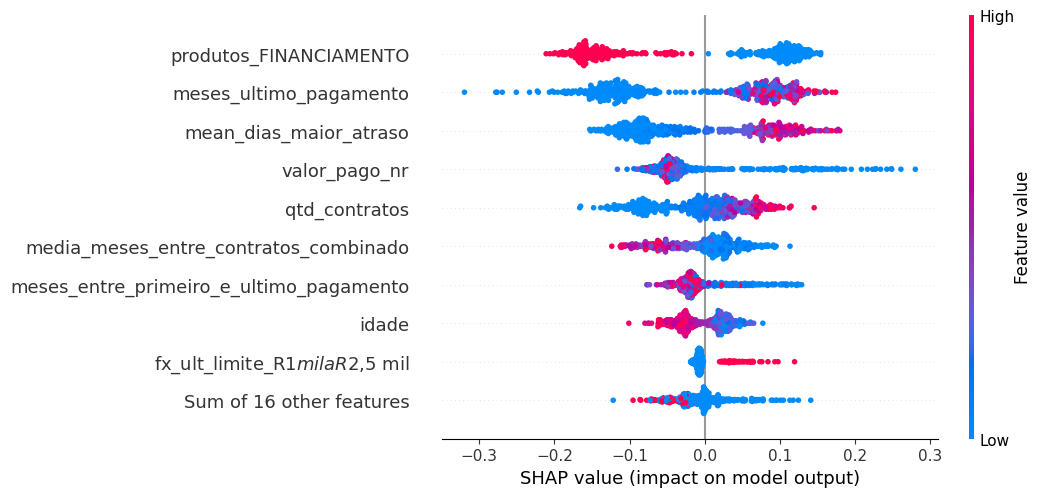

In [ ]:
# Seleciona apenas os shap values da classe 1
shap_beeswarm = shap.Explanation(
    values=shap_values.values[:, :, 1],          # só a classe positiva
    base_values=shap_values.base_values[:, 1],   # idem
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora o beeswarm funciona
shap.plots.beeswarm(shap_beeswarm)

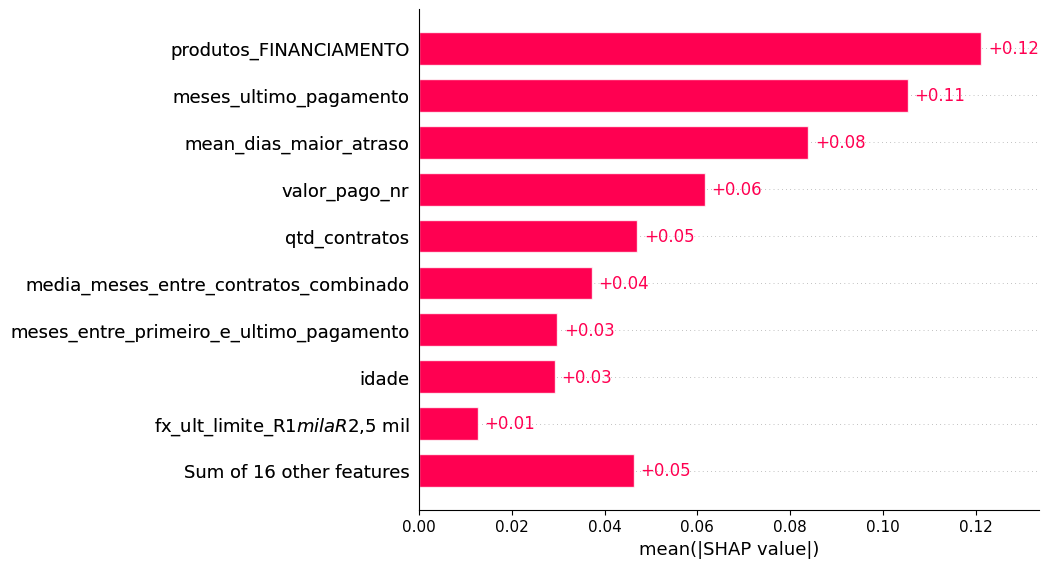

In [ ]:
# Reduz shap_values para só a classe positiva
shap_bar = shap.Explanation(
    values=shap_values.values[:, :, 1],          # shap da classe 1
    base_values=shap_values.base_values[:, 1],   # base da classe 1
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# Agora roda o bar plot
shap.plots.bar(shap_bar)

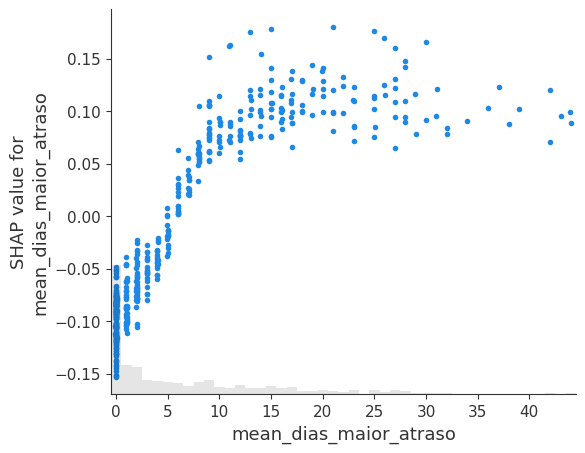

In [ ]:
['idade',
 'tempo_relacionamento_kredilig_meses',
 'media_meses_entre_contratos_combinado',
 'qtd_contratos_fechado_regular',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'valor_pago_nr',
 'renda_valida_new',
 'mean_dias_maior_atraso',
 'qtd_contratos',
 'limite_total_ultimo_mes',
 'sexo_M',
 'estado_civil_DIVORCIADO',
 'estado_civil_SOLTEIRO',
 'estado_civil_UNIAO ESTAVEL',
 'estado_civil_VIUVO',
 'nacionalidade_ESTRANGEIRO',
 'canal_origem_Fisico',
 'produtos_EMPRESTIMO/FINANCIAMENTO',
 'produtos_FINANCIAMENTO',
 'ocupacao_EMPREGADO_PRIVADO_AUTONOMO',
 'ocupacao_OUTROS',
 'ocupacao_RENDA_PASSIVA_PENSAO',
 'ocupacao_SERVIDOR_PUBLICO',
 'grau_escolaridade_cat_ENSINO_MEDIO',
 'grau_escolaridade_cat_TECNICO_SUPERIOR',
 'tipo_cal_entre_contratos_Contratos_mesmo_dia',
 'possui_contratos_a_vista_N_base_CARTAO',
 'possui_contratos_a_vista_SIM',
 'tipo_valor_entrada_Paga_entrada',
 'Cluster_1',
 'Cluster_2',
 'Cluster_3',
 'Cluster_4']

shap_values_class1 = shap.Explanation(
    values=shap_values.values[:, :, 1],
    base_values=shap_values.base_values[:, 1],
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

feature_name = "mean_dias_maior_atraso"
feature_index = X_final_xgb.columns.get_loc(feature_name)
shap.plots.scatter(shap_values_class1[:, feature_index])

# Escoragem

## Treino

In [ ]:
'''Z = xgb.predict(X_final_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_train["Z"]=Z
relatorio_prob_inad_train["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_final_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR'''"resumo_dados_saida ED.html"

prob = relatorio_prob_inad_train["PD"]
Z = np.log((1 - prob) / prob)
odds = (1 - prob) / prob

# Estatísticas das odds
odds_median = np.median(odds)

PDO = 50
Factor = PDO / np.log(2)
BaseScore = 600 - Factor * np.log(odds_median)

# Transformar em SCR (0 a 1000)
SCR = BaseScore + Factor * Z

# Adicionar ao DataFrame
relatorio_prob_inad_train["Z"] = Z
relatorio_prob_inad_train["SCR"] = SCR

In [ ]:
relatorio_prob_inad_train[["PD","Z","SCR"]].sample(5)

PD     Z    SCR
113684 0.59 -0.37 528.23
98249  0.09  2.28 719.17
191232 0.71 -0.91 489.02
9408   0.10  2.20 713.30
220732 0.27  0.98 625.62

In [ ]:
relatorio_prob_inad_train.describe()

idade  tempo_relacionamento_kredilig_meses  \
count 234006.00                            234006.00   
mean      50.50                                50.30   
std       16.15                                31.53   
min       18.00                                 6.03   
25%       38.00                                22.73   
50%       51.00                                43.70   
75%       63.00                                73.83   
max      100.00                               125.53   

       media_meses_entre_contratos_combinado  qtd_contratos_fechado_regular  \
count                              234006.00                      234006.00   
mean                                    4.02                           2.09   
std                                     5.30                           3.39   
min                                     0.00                           0.00   
25%                                     0.00                           0.00   
50%                                     2.50                           1.00   
75%                                     5.97                           3.00   
max                                    41.47                         126.00   

       principal_total_fechado  qtd_parcelas_pagas  meses_ultimo_pagamento  \
count                234006.00           234006.00               234006.00   
mean                   4228.21               38.17                    9.13   
std                    7211.87               52.44                   10.85   
min                       0.00                0.00                   -0.70   
25%                     410.00                9.00                    0.83   
50%                    2153.90               20.00                    3.83   
75%                    5234.24               47.00                   15.13   
max                  310660.49             1410.00                   41.70   

       meses_entre_primeiro_e_ultimo_pagamento  \
count                                234006.00   
mean                                     18.82   
std                                      12.97   
min                                      -0.17   
25%                                       7.63   
50%                                      17.07   
75%                                      30.87   
max                                      42.20   

       meses_entre_primeiro_e_ultimo_fechamento  valor_pago_nr  \
count                                 234006.00      234006.00   
mean                                      27.95        5622.29   
std                                       11.26        7566.24   
min                                       -0.63           0.00   
25%                                       18.83        1105.00   
50%                                       31.20        3169.31   
75%                                       38.23        7285.97   
max                                       41.60      310434.77   

       valor_principal_total_nr  FIN_valor_medio_entrada_nr  renda_valida_new  \
count                 234006.00                   234006.00         234006.00   
mean                    5407.64                       35.84           2094.09   
std                     6615.41                      191.55            796.72   
min                        0.00                        0.00            508.20   
25%                     1449.00                        0.00           1617.00   
50%                     3383.99                        0.00           1888.00   
75%                     6989.87                        0.00           2194.08   
max                   287161.52                    12460.00          23447.00   

       qtd_total_fechado_a_vista  mean_dias_maior_atraso  qtd_contratos  \
count                  234006.00               234006.00      234006.00   
mean                        0.15                    7.82           4.70   
std                         1.46                   10.01           5.64   
min           

In [ ]:
relatorio_prob_inad_train["fx_SCR"], bins =pd.qcut(relatorio_prob_inad_train.SCR,q=20, retbins=True) # categorização por quantil
# expandir os extremos
bins[0] = -np.inf
bins[-1] = np.inf
np.save("bins_SCR.npy", bins)
relatorio_prob_inad_train["fx_PD"], bins_prob =pd.qcut(relatorio_prob_inad_train.PD,q=10, retbins=True) # categorização por quantil
# expandir os extremos
bins_prob[0] = -np.inf
bins_prob[-1] = np.inf
np.save("bins_PD.npy", bins_prob)

In [ ]:
relatorio_prob_inad_train.fx_PD.value_counts().sort_index()

fx_PD
(0.00683, 0.0712]    23401
(0.0712, 0.128]      23401
(0.128, 0.189]       23400
(0.189, 0.266]       23401
(0.266, 0.349]       23400
(0.349, 0.451]       23401
(0.451, 0.542]       23400
(0.542, 0.645]       23401
(0.645, 0.777]       23400
(0.777, 0.994]       23401
Name: count, dtype: int64

In [ ]:
tab_cruz = pd.crosstab(relatorio_prob_inad_train["fx_SCR"], relatorio_prob_inad_train["inad_e_reneg"])
tab_cruz

inad_e_reneg            0      1
fx_SCR                          
(186.966, 408.375]    285  11416
(408.375, 464.84]    1244  10456
(464.84, 492.148]    2444   9256
(492.148, 511.917]   3873   7828
(511.917, 528.66]    4931   6769
(528.66, 542.889]    6005   5695
(542.889, 556.312]   7023   4677
(556.312, 569.161]   7890   3811
(569.161, 584.325]   8840   2860
(584.325, 600.0]     9446   2254
(600.0, 614.088]    10127   1573
(614.088, 628.167]  10611   1090
(628.167, 643.498]  11003    697
(643.498, 659.951]  11223    477
(659.951, 676.519]  11374    326
(676.519, 693.16]   11508    193
(693.16, 712.932]   11634     66
(712.932, 740.203]  11679     21
(740.203, 776.984]  11696      4
(776.984, 904.184]  11701      0

In [ ]:
relatorio_prob_inad_train.to_csv("relatorio_prob_inad_train.csv", index=False)

## Teste

In [ ]:
'''Z = xgb.predict(X_test_xgb, output_margin=True)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))
relatorio_prob_inad_test["Z"]=Z
relatorio_prob_inad_test["SCR"]=SCR'''

'''Z_prob = floresta.predict_proba(X_test_fa)[:, 1]  # probabilidade da classe positiva

Z = Z_prob * 2 - 1  # agora Z varia entre -1 e +1 (simulando margem)
Z_min, Z_max = Z.min(), Z.max()
maior_absoluto = int(np.ceil(max(abs(Z_min), abs(Z_max))))

# Transformar em SCR (0 a 1000)
SCR = np.round(1000 * ((-Z + maior_absoluto) / (maior_absoluto*2)))

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z
relatorio_prob_inad_test["SCR"] = SCR'''

prob_test = relatorio_prob_inad_test["PD"]
Z_test = np.log((1 - prob_test) / prob_test)

# Transformar em SCR (0 a 1000)
SCR_test = BaseScore + Factor * Z_test

# Adicionar ao DataFrame
relatorio_prob_inad_test["Z"] = Z_test
relatorio_prob_inad_test["SCR"] = SCR_test

In [ ]:
bins_carregado = np.load("bins_SCR.npy")
relatorio_prob_inad_test["fx_SCR"]=pd.cut(relatorio_prob_inad_test.SCR, bins=bins_carregado)
bins_carregado_PD = np.load("bins_PD.npy")
relatorio_prob_inad_test["fx_PD"]=pd.cut(relatorio_prob_inad_test.PD, bins=bins_carregado_PD)

In [ ]:
tab_cruz_test = pd.crosstab(relatorio_prob_inad_test["fx_SCR"], relatorio_prob_inad_test["inad_e_reneg"])
tab_cruz_test

inad_e_reneg           0     1
fx_SCR                        
(-inf, 408.375]      196  2933
(408.375, 464.84]    865  4991
(464.84, 492.148]   1612  4151
(492.148, 511.917]  2033  3188
(511.917, 528.66]   2391  2873
(528.66, 542.889]   2882  2564
(542.889, 556.312]  3019  2037
(556.312, 569.161]  3861  1745
(569.161, 584.325]  4137  1426
(584.325, 600.0]    4611  1135
(600.0, 614.088]    4816   784
(614.088, 628.167]  4766   588
(628.167, 643.498]  4882   388
(643.498, 659.951]  5490   282
(659.951, 676.519]  6141   256
(676.519, 693.16]   5838   153
(693.16, 712.932]   5389    59
(712.932, 740.203]  4322    26
(740.203, 776.984]  3264     4
(776.984, inf]       191     0

In [ ]:
#relatorio_prob_inad_test[["id_cliente","inad_reneg_real","SCR","fx_SCR"]].to_excel("amostraSCR_regiao.xlsx")

In [ ]:
relatorio_prob_inad_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100289 entries, 0 to 100288
Data columns (total 43 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   sexo                                      100289 non-null  object  
 1   idade                                     100289 non-null  int64   
 2   estado_civil                              100289 non-null  object  
 3   nacionalidade                             100289 non-null  object  
 4   tempo_relacionamento_kredilig_meses       100289 non-null  float64 
 5   canal_origem                              100289 non-null  object  
 6   media_meses_entre_contratos_combinado     100289 non-null  float64 
 7   qtd_contratos_fechado_regular             100289 non-null  int64   
 8   principal_total_fechado                   100289 non-null  float64 
 9   qtd_parcelas_pagas                        100289 non-null  int64   
 10  meses_ul

In [ ]:
relatorio_prob_inad_test.to_csv("relatorio_prob_inad_test.csv", index=False)